# Telecom Churn ML Group Case Study

Business Objective
---
Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
 
__Authors:__ _Adrish Maity, Puneet Sapra_

# Importing Libraries

In [31]:
import warnings
warnings.filterwarnings('ignore') #ignore warnings

In [32]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import Markdown,display


import seaborn as sns
import matplotlib.pyplot as plt
import math



from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import (classification_report,
                             confusion_matrix, 
                             accuracy_score, 
                             f1_score,
                             roc_auc_score,
                             precision_recall_curve,
                             roc_curve)
from sklearn import metrics

# sns aesthetics controls
sns.set_context("paper")
sns.set_style("whitegrid")

# floating point number : significant digits
pd.set_option('display.float_format', lambda x: '%.4f' % x)


# for display full data frame
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Data Loading
Loading the data from provided dataset.

In [33]:
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  7000842753     109       0.0000          0.0000          0.0000            
1  7001865778     109       0.0000          0.0000          0.0000            
2  7001625959     109       0.0000          0.0000          0.0000            
3  7001204172     109       0.0000          0.0000          0.0000            
4  7000142493     109       0.0000          0.0000          0.0000            

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0  6/30/2014            7/31/2014            8/31/2014             
1  6/30/2014            7/31/2014            8/31/2014             
2  6/30/2014            7/31/2014            8/31/2014             
3  6/30/2014            7/31/2014            8/31/2014             
4  6/30/2014            7/31/2014            8/31/2014             

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0  9/30/2014           197.3850 214.8160 213.8030 21.1000  nan            
1  9/30/2014           34.0470  355.0740 268.3210 86.2850  24.1100        
2  9/30/2014           167.6900 189.0580 210.2260 290.7140 11.5400        
3  9/30/2014           221.3380 251.1020 508.0540 389.5000 99.9100        
4  9/30/2014           261.6360 309.8760 238.1740 163.4260 50.3100        

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0 nan          0.0000       nan          nan           nan             
1 78.6800      7.6800       18.3400      15.7400       99.8400         
2 55.2400      37.2600      74.8100      143.3300      220.5900        
3 54.3900      310.9800     241.7100     123.3100      109.0100        
4 149.4400     83.8900      58.7800      76.9600       91.8800         

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0 0.0000        nan           nan            nan            0.0000           
1 304.7600      53.7600       0.0000         0.0000         0.0000           
2 208.3600      118.9100      0.0000         0.0000         0.0000           
3 71.6800       113.5400      0.0000         54.8600        44.3800          
4 124.2600      45.8100       0.0000         0.0000         0.0000           

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0 nan            nan            nan            0.0000         nan              
1 0.0000         0.0000         0.0000         0.0000         0.0000           
2 38.4900        0.0000         0.0000         0.0000         70.9400          
3 0.0000         0.0000         28.0900        39.0400        0.0000           
4 0.0000         0.0000         0.0000         0.0000         0.0000           

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0 nan               nan               0.0000            nan                 
1 23.8800           74.5600           7.6800            18.3400             
2 7.1900            28.7400           13.5800           14.3900             
3 73.6800           34.8100           10.6100           15.4900             
4 50.3100           149.4400          83.8900           58.7800             

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0 nan               nan               0.0000            nan                 
1 11.5100           75.9400           291.8600          53.7600             
2 29.3400           16.8600           38.4600           28.1600             
3 107.4300          83.2100           22.4600           65.4600             
4 67.6400           91.8800           124.2600          37.8900             

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0 nan               nan               0.0000            nan                 
1 0.0000            0.0000            0.0000            0.0000              
2 24.1100           21.7900           15.6100           22.2400             
3 1.9100            0.6500            4.9100       

In [34]:
Markdown("There are `{rows}` observations with `{columns}` attributes.".format(rows=telecom.shape[0], columns=telecom.shape[1]))

There are `99999` observations with `226` attributes.

### Basic Check

In [35]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


> Mixed datatypes present

# Data Shaping
This case study limited to *high value customers* exploration and their attrition rate modeling.


## High Value Customers
**High Value Customers**: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the **average recharge amount** in the first two months (the good phase).

$Average Recharge$ is calculated as:

$$
\begin{aligned}
\mbox{Average Recharge}_{good-phase} &=  \frac{\mbox{Call Recharge}_{6,7} + \mbox{Data Recharge}_{6,7}}{2}\\
&= 0.5 \times (\mbox{Call Recharge}_{6,7} + \mbox{Data Recharge}_{6,7}) \\
&= 0.5 \times (\mbox{Call Recharge}_{6,7} + (\mbox{2G Data Recharge}_{6,7} + \mbox{3G Data Recharge}_{6,7})\\
&= 0.5 \times (\mbox{Call Recharge}_{6,7} + (\mbox{Avg Data Recharge}_{6,7} \times  (\mbox{2G Recharge Count}_{6,7} + \mbox{3G Recharge Count}_{6,7}))
\end{aligned}
$$


In [36]:
# Calculation of Data Recharge (new KPI)
telecom['data_rech_6'] = telecom['av_rech_amt_data_6'] * (telecom['count_rech_2g_6'] + telecom['count_rech_3g_6'])
telecom['data_rech_7'] = telecom['av_rech_amt_data_7'] * (telecom['count_rech_2g_7'] + telecom['count_rech_3g_7'])

# if data recharge amount is not present then it means it is zero.
telecom['data_rech_6'] = telecom['data_rech_6'].fillna(0)
telecom['data_rech_7'] = telecom['data_rech_7'].fillna(0)


# similary calculating for month 8 too, it is not need for now but useful for unified study of these attributes
telecom['data_rech_8'] = telecom['av_rech_amt_data_8'] * (telecom['count_rech_2g_8'] + telecom['count_rech_3g_8'])
telecom['data_rech_8'] = telecom['data_rech_8'].fillna(0)

In [37]:
telecom['average_recharge_amount_good_phase'] =  0.5 * (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'] + telecom['data_rech_6'] + telecom['data_rech_7'])
thresh_high_value = np.percentile(telecom['average_recharge_amount_good_phase'], 70)
high_valued_customers=telecom[telecom['average_recharge_amount_good_phase'] >= thresh_high_value]

In [38]:
high_valued_customers.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   7000842753     109       0.0000          0.0000          0.0000            
7   7000701601     109       0.0000          0.0000          0.0000            
8   7001524846     109       0.0000          0.0000          0.0000            
21  7002124215     109       0.0000          0.0000          0.0000            
23  7000887461     109       0.0000          0.0000          0.0000            

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0   6/30/2014            7/31/2014            8/31/2014             
7   6/30/2014            7/31/2014            8/31/2014             
8   6/30/2014            7/31/2014            8/31/2014             
21  6/30/2014            7/31/2014            8/31/2014             
23  6/30/2014            7/31/2014            8/31/2014             

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0   9/30/2014           197.3850  214.8160  213.8030  21.1000  nan            
7   9/30/2014           1069.1800 1349.8500 3171.4800 500.0000 57.8400        
8   9/30/2014           378.7210  492.2230  137.3620  166.7870 413.6900       
21  9/30/2014           514.4530  597.7530  637.7600  578.5960 102.4100       
23  9/30/2014           74.3500   193.8970  366.9660  811.4800 48.9600        

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0  nan          0.0000       nan          nan           nan             
7  54.6800      52.2900      nan          453.4300      567.1600        
8  351.0300     35.0800      33.4600      94.6600       80.6300         
21 132.1100     85.1400      161.6300     757.9300      896.6800        
23 50.6600      33.5800      15.7400      85.4100       89.3600         

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0  0.0000        nan           nan            nan            0.0000           
7  325.9100      nan           16.2300        33.4900        31.6400          
8  136.4800      108.7100      0.0000         0.0000         0.0000           
21 983.3900      869.8900      0.0000         0.0000         0.0000           
23 205.8900      111.8800      0.0000         0.0000         0.0000           

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0  nan            nan            nan            0.0000         nan              
7  nan            23.7400        12.5900        38.0600        nan              
8  0.0000         0.0000         0.0000         0.0000         0.0000           
21 0.0000         0.0000         0.0000         0.0000         0.0000           
23 0.0000         0.0000         0.0000         0.0000         0.0000           

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0  nan               nan               0.0000            nan                 
7  51.3900           31.3800           40.2800           nan                 
8  297.1300          217.5900          12.4900           26.1300             
21 4.4800            6.1600            23.3400           29.9800             
23 48.9600           50.6600           33.5800           15.7400             

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0  nan               nan               0.0000            nan                 
7  308.6300          447.3800          162.2800          nan                 
8  80.9600           70.5800           50.5400           34.5800             
21 91.8100           87.9300           104.8100          107.5400            
23 82.9400           83.0100           148.5600          83.7300             

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0  nan               nan               0.0000            nan                 
7  62.1300           55.1400           53.2300           nan                 
8  0.0000            0.0000            0.0000            0.0

In [39]:
Markdown('''There are `{hvc}` customers out of total `{total}`.'''.format(hvc=high_valued_customers.shape[0], total=telecom.shape[0]))

There are `30001` customers out of total `99999`.

## Churn Calculation
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase

In [40]:
chrunCondition = lambda x: 1 if x.total_ic_mou_9 == 0 and x.total_og_mou_9 == 0 and x.vol_2g_mb_9 == 0 and x.vol_3g_mb_9 == 0 else 0
high_valued_customers['churn'] = high_valued_customers.apply(chrunCondition, axis=1).astype("category")

## Removing september month KPIs' attributes
These attributes are suffixed by `_9` or containing `sep` string.

In [41]:
september_attributes = high_valued_customers.columns.to_series().filter(regex='sep|_9$')
high_valued_customers = high_valued_customers.drop(september_attributes, axis=1)

## Removing irrelavent attributes 

### Attributes: Mobile Number, Circle ID

In [42]:
high_valued_customers = high_valued_customers.drop(['mobile_number', 'circle_id'], axis=1)

### Last of Month _x attributes
These are useful in billing however useless in *usage based study*

In [43]:
high_valued_customers = high_valued_customers.drop([
                                                "last_date_of_month_6",
                                                "last_date_of_month_7",
                                                "last_date_of_month_8"
                                                ], axis = 1)

### Avg, Count of Data Recharge
Data Recharge has been already summed up to `data_rech` attributes, Keeping new attributes, *removing Avg, count of data recharge* which were used in deriving `data_rech`

In [44]:
high_valued_customers = high_valued_customers.drop([
                                                "av_rech_amt_data_6",
                                                "av_rech_amt_data_7",
                                                "av_rech_amt_data_8",

                                                "count_rech_2g_6",
                                                "count_rech_2g_7",
                                                "count_rech_2g_8",
    
                                                "count_rech_3g_6",
                                                "count_rech_3g_7",
                                                "count_rech_3g_8"
                                                ], axis = 1)

## Renaming Attributes
`vbc_3g` kpi's attribute are prefixed by month abbr: jun, jul, aug

Renaming these attributes keep harmony amongs all kpis' attributes as:
* `jun_vbc_3g` => `vbc_3g_6`
* `jul_vbc_3g` => `vbc_3g_7`
* `aug_vbc_3g` => `vbc_3g_8`

In [45]:
high_valued_customers = high_valued_customers.rename(columns={"jun_vbc_3g": "vbc_3g_6", "jul_vbc_3g": "vbc_3g_7", 'aug_vbc_3g': 'vbc_3g_8'})

# Data Understanding
In this section, data type would be corrected

In [46]:
high_valued_customers.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0  0.0000          0.0000          0.0000          197.3850  214.8160    
7  0.0000          0.0000          0.0000          1069.1800 1349.8500   
8  0.0000          0.0000          0.0000          378.7210  492.2230    
21 0.0000          0.0000          0.0000          514.4530  597.7530    
23 0.0000          0.0000          0.0000          74.3500   193.8970    

      arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  213.8030  nan          nan          0.0000       nan             
7  3171.4800 57.8400      54.6800      52.2900      453.4300        
8  137.3620  413.6900     351.0300     35.0800      94.6600         
21 637.7600  102.4100     132.1100     85.1400      757.9300        
23 366.9660  48.9600      50.6600      33.5800      85.4100         

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0  nan           0.0000        nan            nan            0.0000           
7  567.1600      325.9100      16.2300        33.4900        31.6400          
8  80.6300       136.4800      0.0000         0.0000         0.0000           
21 896.6800      983.3900      0.0000         0.0000         0.0000           
23 89.3600       205.8900      0.0000         0.0000         0.0000           

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0  nan            nan            0.0000         nan                 
7  23.7400        12.5900        38.0600        51.3900             
8  0.0000         0.0000         0.0000         297.1300            
21 0.0000         0.0000         0.0000         4.4800              
23 0.0000         0.0000         0.0000         48.9600             

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0  nan               0.0000            nan               nan                 
7  31.3800           40.2800           308.6300          447.3800            
8  217.5900          12.4900           80.9600           70.5800             
21 6.1600            23.3400           91.8100           87.9300             
23 50.6600           33.5800           82.9400           83.0100             

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0  0.0000            nan               nan               0.0000              
7  162.2800          62.1300           55.1400           53.2300             
8  50.5400           0.0000            0.0000            0.0000              
21 104.8100          0.7500            0.0000            1.5800              
23 148.5600          0.0000            0.0000            0.0000              

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0  nan               nan               0.0000            nan             
7  0.0000            0.0000            0.0000            422.1600        
8  0.0000            0.0000            7.1500            378.0900        
21 0.0000            0.0000            0.0000            97.0400         
23 0.0000            0.0000            17.7100           131.9100        

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0  nan           0.0000        nan               nan                 
7  533.9100      255.7900      4.3000            23.2900             
8  288.1800      63.0400       116.5600          133.4300            
21 94.0900       129.7400      97.9300           125.9400            
23 133.6800      182.1400      0.0000            0.0000              

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0  0.0000            nan               nan               0.0000              
7  12.0100           49.8900           31.7600           49.1400             
8  22.5800           13.6900           10.0400           75.6900             
21 61.7900           665.3600          808.7400          876.9900            
23 0.0000            2.3600            6.3500            39.

In [47]:
Markdown("There are `{rows}` observations with `{columns}` attributes.".format(rows=high_valued_customers.shape[0], columns=high_valued_customers.shape[1]))

There are `30001` observations with `162` attributes.

## Validating the data type of attributes

In [48]:
high_valued_customers.dtypes

loc_og_t2o_mou                        float64 
std_og_t2o_mou                        float64 
loc_ic_t2o_mou                        float64 
arpu_6                                float64 
arpu_7                                float64 
arpu_8                                float64 
onnet_mou_6                           float64 
onnet_mou_7                           float64 
onnet_mou_8                           float64 
offnet_mou_6                          float64 
offnet_mou_7                          float64 
offnet_mou_8                          float64 
roam_ic_mou_6                         float64 
roam_ic_mou_7                         float64 
roam_ic_mou_8                         float64 
roam_og_mou_6                         float64 
roam_og_mou_7                         float64 
roam_og_mou_8                         float64 
loc_og_t2t_mou_6                      float64 
loc_og_t2t_mou_7                      float64 
loc_og_t2t_mou_8                      float64 
loc_og_t2m_mo

The data type of all attributes are valid except:
* date based attributes
* night_pck_user_x - binary attribute as per data dictionary
* fb_user_x - binary attribute as per dictionary


x here in range [6..8]

### Correcting type of date base attributes

In [49]:
date_typed_attributes = high_valued_customers.columns.to_series().filter(regex='date')
for attribute in date_typed_attributes: 
    high_valued_customers[attribute] = pd.to_datetime(high_valued_customers[attribute])

### Correcting type of binary attributes

In [50]:
# recipe to provide given kpi's all months attributes names
def get_kpi_attributes_names(attribute):
    return [attribute+'_6', attribute + '_7', attribute+'_8']

In [51]:
# collecting binary attributes
binary_attributes = get_kpi_attributes_names('night_pck_user') + get_kpi_attributes_names('fb_user')
for attribute in binary_attributes:
    
    # filling 0 as absent of feature
    high_valued_customers[attribute] = high_valued_customers[attribute].fillna(0).astype(np.int32).astype('category')

### Rechecking Data type 
Verifying all types have been corrected

In [52]:
high_valued_customers.dtypes

loc_og_t2o_mou                        float64       
std_og_t2o_mou                        float64       
loc_ic_t2o_mou                        float64       
arpu_6                                float64       
arpu_7                                float64       
arpu_8                                float64       
onnet_mou_6                           float64       
onnet_mou_7                           float64       
onnet_mou_8                           float64       
offnet_mou_6                          float64       
offnet_mou_7                          float64       
offnet_mou_8                          float64       
roam_ic_mou_6                         float64       
roam_ic_mou_7                         float64       
roam_ic_mou_8                         float64       
roam_og_mou_6                         float64       
roam_og_mou_7                         float64       
roam_og_mou_8                         float64       
loc_og_t2t_mou_6                      float64 

> The data type of all attributes are valid 

# Data Exploration
This section analyze univariate, missing value analysis and correction, feature engineering, analysis against churn, and correlation study

## Univariate Analysis

### Churn Rate or Percentage
Churn Study is our target. 

In [53]:
churn_rate = high_valued_customers["churn"].astype(np.int).mean() * 100
Markdown("> Churn Rate is `{rate}%`".format(rate= '%.2f' % churn_rate))

> Churn Rate is `8.14%`

### Churn Distribution

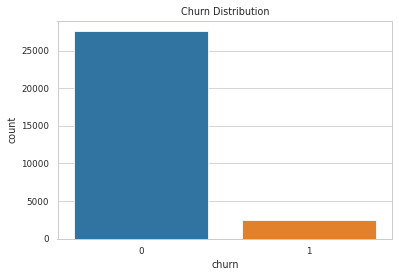

In [54]:
plt.figure()
plt.title("Churn Distribution")
sns.countplot(x="churn", data=high_valued_customers)
plt.show()

In [55]:
Markdown(">`{churn_count}` customers have been churned out of `{total}`.".format(churn_count=high_valued_customers['churn'].astype(np.int32).sum(), total=high_valued_customers.shape[0]))

>`2441` customers have been churned out of `30001`.

### Numeric Attributes Analysis

In [56]:
numeric_attributes = high_valued_customers.select_dtypes([np.number]).columns.to_series()
Markdown("There are `{length}` numeric attributes.".format(length=len(numeric_attributes)))

There are `149` numeric attributes.

In [57]:
# Distribution helper methods/recipe for numeric univariate analysis
def numeric_univariate(attributes, figsize=(12,32)):
    
    # numeric description of data 
    display(high_valued_customers[attributes].describe(percentiles=[.25, .50, .75,.95, .99, .1]))

    # visual description of data 
    
    ## rows and columns of graph grid (r x c)
    r = math.ceil(len(attributes) / 3)
    c = min(len(attributes), 3)
    
    plt.figure(figsize=figsize)
    plt.title("Distribution Analysis")
    
    i = 1
    for attribute in attributes:
        try:
            plt.subplot(r, c, i)
            sns.distplot(high_valued_customers[attribute], kde=False)
            i += 1
        except:
            pass
    plt.subplots_adjust(hspace=0.5, right=1)
    plt.tight_layout()
    plt.show()    

Since there around `~150` attributes, analysis of these at once would be overwhelming.     
So breaking the attributes in set of `~50`.   

*Note: Some attributes would be skipped in visual analysis as they would be heavely biased towards single value.*
#### First 50 numeric attributes analysis

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou     arpu_6     arpu_7  \
count 29777.0000      29777.0000      29777.0000      30001.0000 30001.0000   
mean  0.0000          0.0000          0.0000          558.4908   560.7822     
std   0.0000          0.0000          0.0000          460.6405   479.7769     
min   0.0000          0.0000          0.0000          -2258.7090 -2014.0450   
10%   0.0000          0.0000          0.0000          171.6050   177.8860     
25%   0.0000          0.0000          0.0000          309.8650   309.8260     
50%   0.0000          0.0000          0.0000          481.6940   480.9430     
75%   0.0000          0.0000          0.0000          699.9430   698.3150     
95%   0.0000          0.0000          0.0000          1240.9640  1261.2720    
99%   0.0000          0.0000          0.0000          1985.1150  1999.5000    
max   0.0000          0.0000          0.0000          27731.0880 35145.8340   

          arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
count 30001.0000 29456.0000   29464.0000   28827.0000   29456.0000      
mean  508.5980   265.6183     272.7005     243.6469     380.6081        
std   501.9620   462.4936     482.9724     465.2009     484.2575        
min   -945.8080  0.0000       0.0000       0.0000       0.0000          
10%   84.0000    1.6450       1.4000       0.6500       16.6200         
25%   231.4730   19.2400      18.1550      14.2550      78.5750         
50%   427.5850   88.0600      86.8850      72.9300      229.6350        
75%   661.4910   297.4150     298.0875     255.0250     494.7800        
95%   1255.0190  1145.1600    1198.3795    1097.4250    1266.1950       
99%   1986.6220  2162.9600    2216.5319    2187.4864    2341.0125       
max   33543.6240 7376.7100    8157.7800    10752.5600   8362.3600       

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count 29464.0000    28827.0000    29456.0000     29464.0000       
mean  384.9943      348.7233      16.4084        12.8729          
std   500.8079      486.9185      76.9731        76.4540          
min   0.0000        0.0000        0.0000         0.0000           
10%   15.5600       9.0300        0.0000         0.0000           
25%   76.0400       58.6700       0.0000         0.0000           
50%   227.1200      197.5900      0.0000         0.0000           
75%   500.3650      455.3850      0.0000         0.0000           
95%   1284.2750     1186.9680     86.8575        56.8400          
99%   2433.5316     2225.7872     347.5600       286.0766         
max   9667.1300     14007.3400    2613.3100      3813.2900        

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count 28827.0000     29456.0000     29464.0000     28827.0000       
mean  13.0096        27.0632        20.5194        20.6747          
std   75.5759        117.2189       96.9334        106.7519         
min   0.0000         0.0000         0.0000         0.0000           
10%   0.0000         0.0000         0.0000         0.0000           
25%   0.0000         0.0000         0.0000         0.0000           
50%   0.0000         0.0000         0.0000         0.0000           
75%   0.0000         0.0000         0.0000         0.0000           
95%   59.4720        148.3500       107.0555       106.2800         
99%   288.1560       535.2190       443.8725       438.2262         
max   4169.8100      3775.1100      2812.0400      5337.0400        

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count 29456.0000        29464.0000        28827.0000        29456.0000          
mean  86.0479           87.2358           81.2569           166.2637            
std   230.6095          242.4273          231.3999          251.4233            
min   0.0000            0.0000            0.0000            0.0000              
10%   0.0000            0.0000            0.0000            2.3600              
25%   5.0300            5.2800            3.8300            2

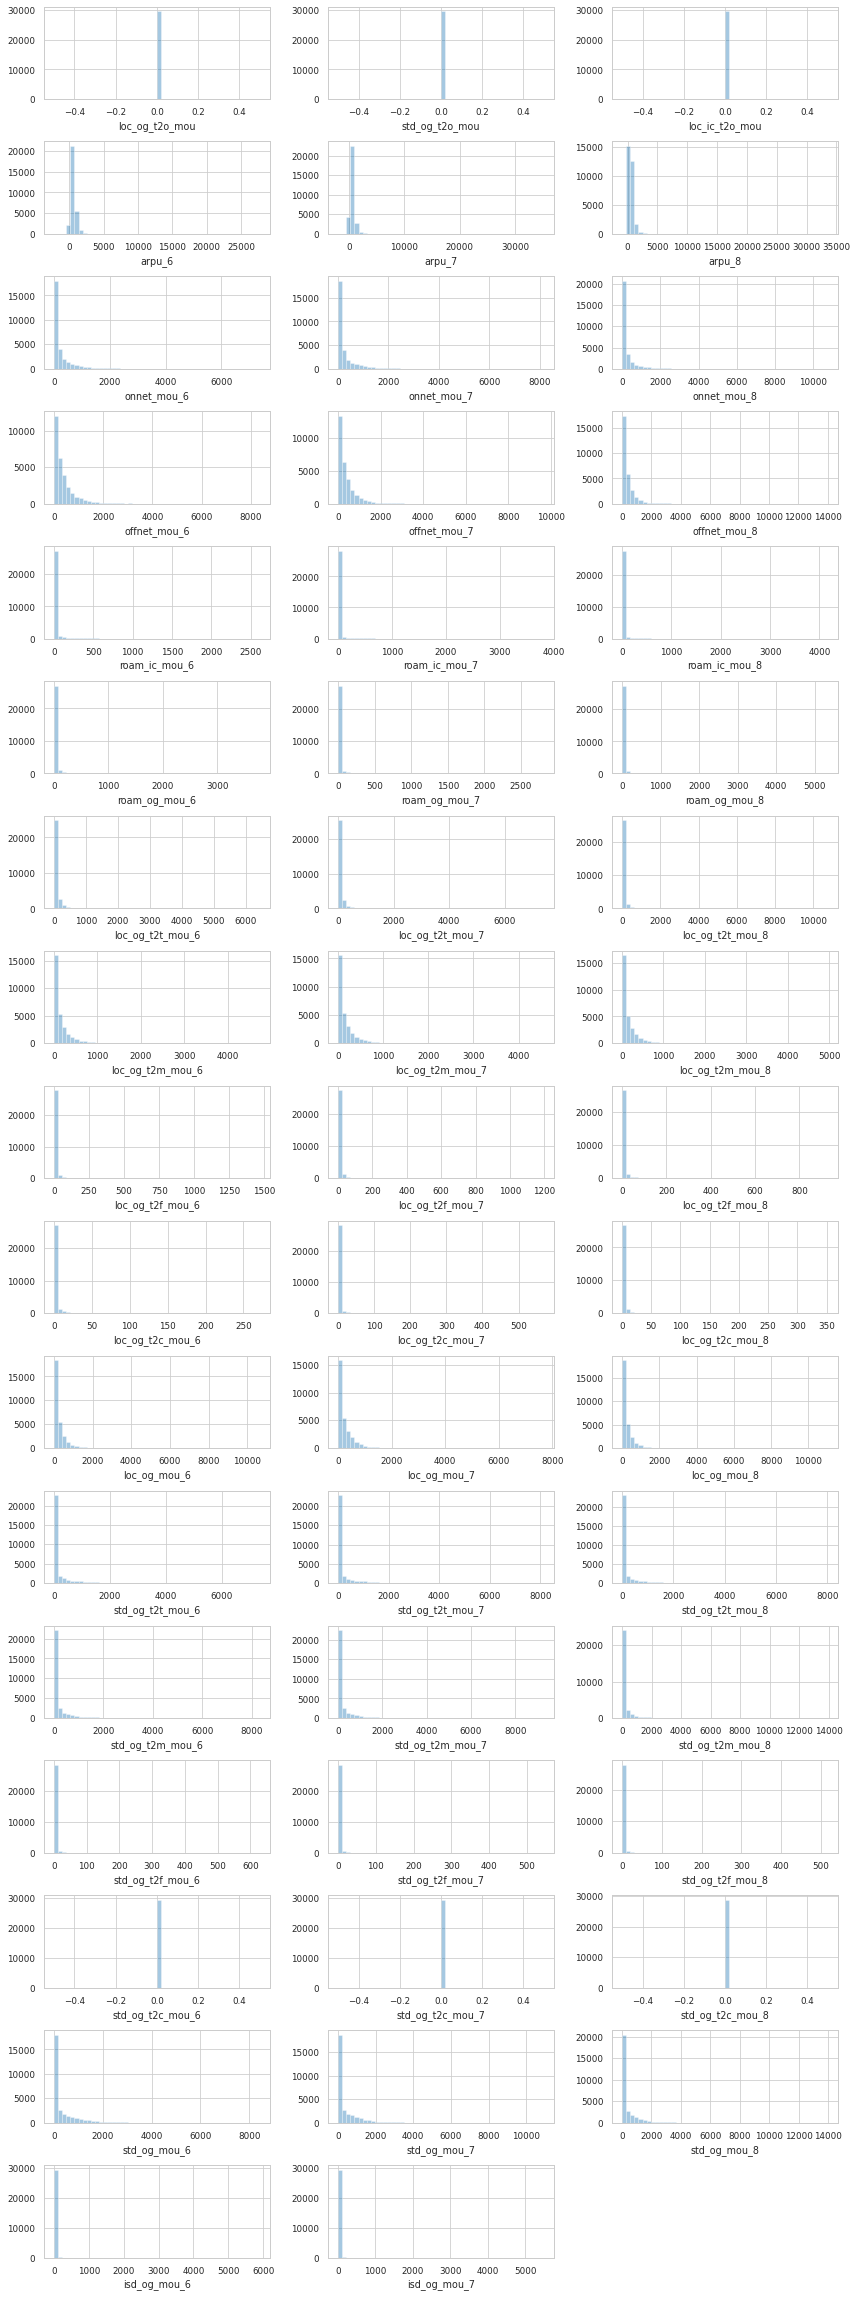

In [58]:
numeric_univariate(numeric_attributes[:50])

_Observation:_   

* `loc_og_t2o_mou`, `std_og_t2o_mou`, `loc_ic_t2o_mou`, `std_og_t2c_mou_6`,`std_og_t2c_mou_7`, and `std_og_t2c_mou_8` do not capture any variation. __These attributes would be deleted.__
* Rest attributes are skewed.

#### 51-100th numeric attributes analysis

isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
count 28827.0000    29456.0000    29464.0000    28827.0000    29456.0000     
mean  2.0283        5.9259        7.2382        6.8243        0.6733         
std   45.6117       17.7110       21.9646       20.6773       4.1448         
min   0.0000        0.0000        0.0000        0.0000        0.0000         
10%   0.0000        0.0000        0.0000        0.0000        0.0000         
25%   0.0000        0.0000        0.0000        0.0000        0.0000         
50%   0.0000        0.3100        0.8100        0.6600        0.0000         
75%   0.0000        5.3800        7.1150        6.5400        0.0000         
95%   0.4300        26.9900       31.3100       30.0600       3.9400         
99%   30.4470       69.1580       76.5651       72.3048       8.9400         
max   5681.5400     1023.2100     1265.7900     954.5100      609.8100       

       og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  \
count 29464.0000   28827.0000   30001.0000      30001.0000        
mean  0.0437       0.0600       609.8663        628.3660          
std   2.7011       3.3819       690.8734        717.2192          
min   0.0000       0.0000       0.0000          0.0000            
10%   0.0000       0.0000       10.7600         10.0800           
25%   0.0000       0.0000       116.5800        116.4900          
50%   0.0000       0.0000       410.6300        425.5900          
75%   0.0000       0.0000       858.7600        891.4400          
95%   0.0000       0.0000       1913.4800       1951.7600         
99%   0.0000       0.0000       3195.2900       3280.9600         
max   370.1300     394.9300     10674.0300      11365.3100        

       total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  \
count 30001.0000      29456.0000        29464.0000        28827.0000          
mean  551.6788        66.6643           67.8514           65.1697             
std   700.4782        165.0023          168.6784          161.6026            
min   0.0000          0.0000            0.0000            0.0000              
10%   0.2100          0.6800            0.9100            0.4000              
25%   72.3600         6.8300            7.5600            6.3800              
50%   333.5400        26.0300           26.6600           24.7600             
75%   774.7800        68.7825           69.9650           67.6900             
95%   1857.0800       237.8200          235.8195          229.3850            
99%   3219.8100       637.4425          668.0219          648.6162            
max   14043.0600      6351.4400         5709.5900         4003.2100           

       loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  \
count 29456.0000        29464.0000        28827.0000        29456.0000          
mean  153.1953          154.3887          152.1882          15.5612             
std   220.2518          219.2523          217.1376          46.1256             
min   0.0000            0.0000            0.0000            0.0000              
10%   7.3900            9.1330            5.8960            0.0000              
25%   30.5900           33.3400           29.5400           0.0000              
50%   86.7600           88.3700           85.7900           2.0100              
75%   191.9000          193.7650          191.7800          12.3300             
95%   512.1500          514.6750          520.6040          72.4875             
99%   1020.2900         1004.3818         994.8350          196.9350            
max   4693.8600         4171.5100         4643.4900         1678.4100           

       loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  \
count 29464.0000        28827.0000        29456.0000    29464.0000      
mean  16.3278           14.9898           235.4306      238.5778        
std   49.5639           44.0786           316.1318      317.2601        
min   0.0000            0.0000            0.0000   

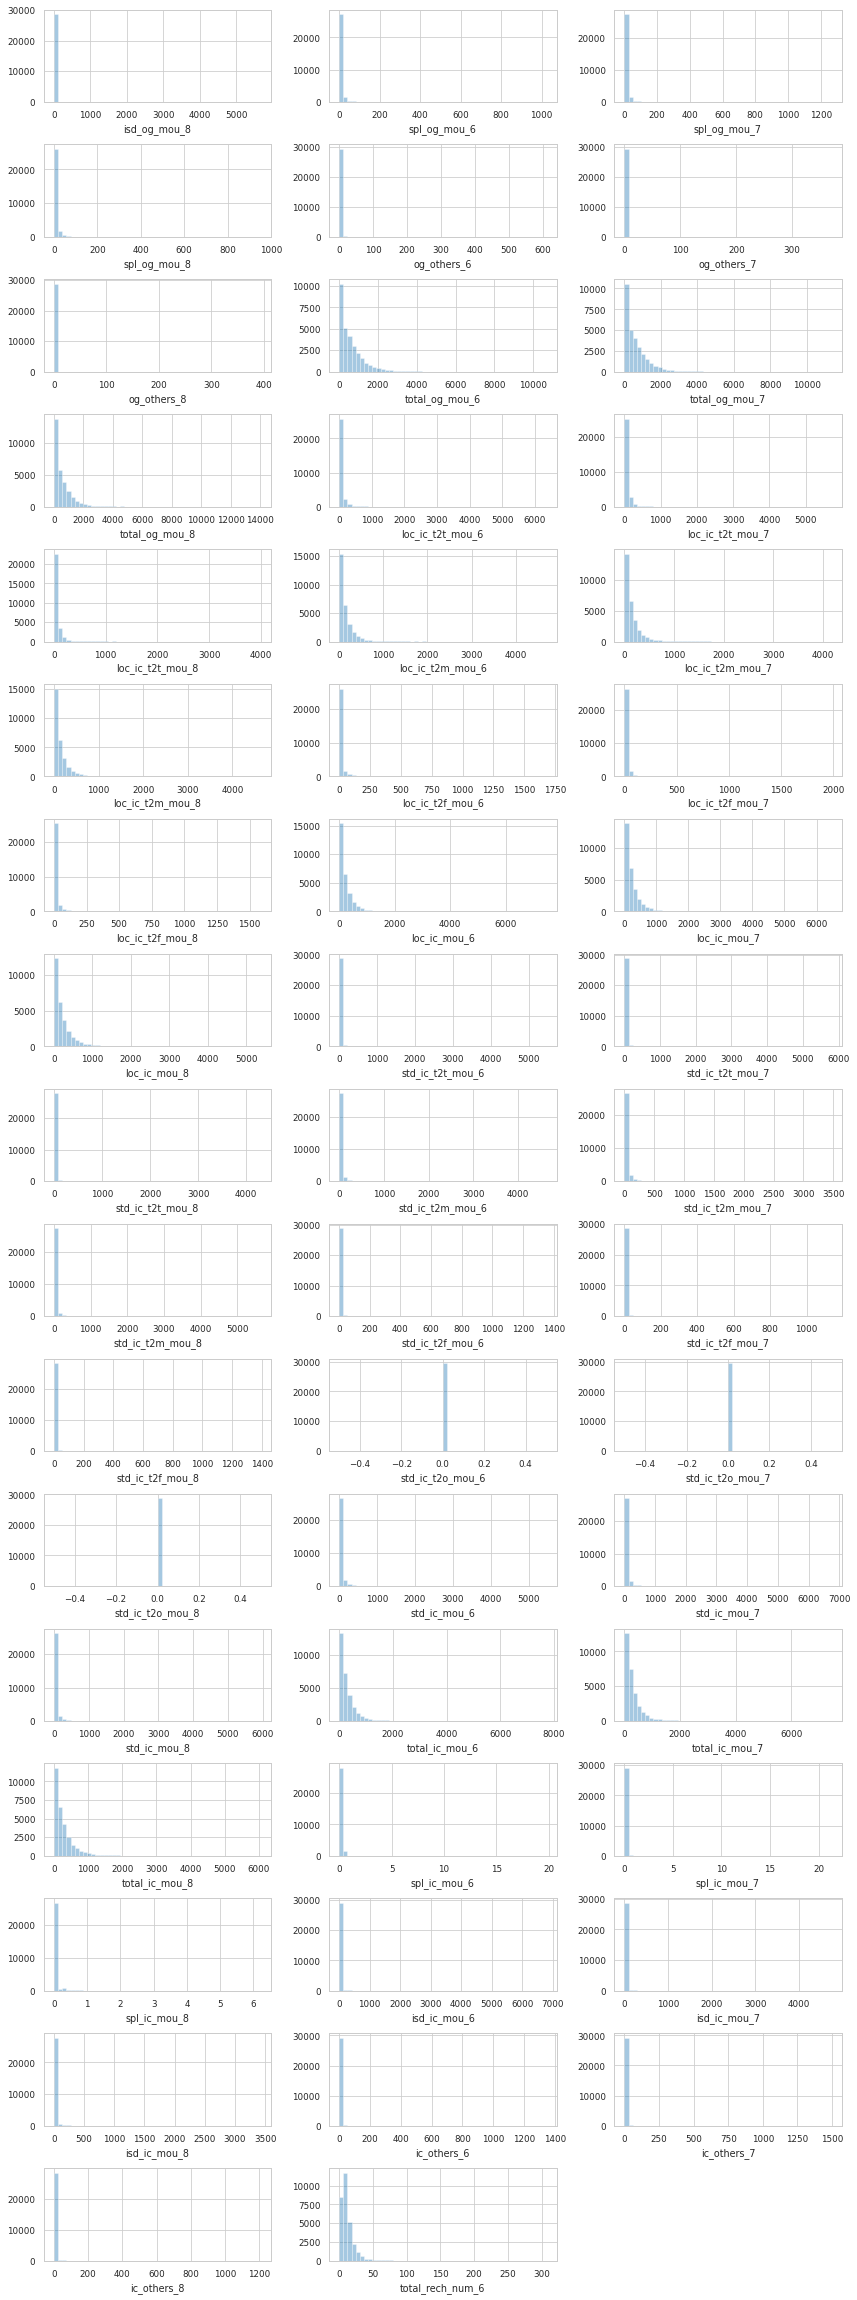

In [59]:
numeric_univariate(numeric_attributes[50:100])

_Observation:_   
* `std_ic_t2o_mou_6`,`std_ic_t2o_mou_7`,`std_ic_t2o_mou_8` do not capture any variation. __These attributes would be deleted__
* `og_others_6`, `og_others_7`, `og_others_8` do hardly capture any (`>95%` for `og_others_6`, `>99%` for  `og_others_7`, and `og_others_8`)  variation. __These attributes would be deleted__
* Rest attributes are skewed.

#### 101st- * (rest) numeric attributes analysis

total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  \
count 30001.0000        30001.0000        30001.0000        30001.0000          
mean  11.7188           9.9729            660.7323          660.4980            
std   9.4324            9.2744            561.0329          582.4309            
min   0.0000            0.0000            0.0000            0.0000              
10%   4.0000            2.0000            195.0000          192.0000            
25%   6.0000            4.0000            360.0000          352.0000            
50%   9.0000            8.0000            566.0000          562.0000            
75%   15.0000           13.0000           834.0000          831.0000            
95%   29.0000           28.0000           1480.0000         1510.0000           
99%   48.0000           45.0000           2376.0000         2427.0000           
max   138.0000          196.0000          35190.0000        40335.0000          

       total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  \
count 30001.0000        30001.0000      30001.0000      30001.0000        
mean  584.3655          169.2848        172.2017        160.1445          
std   611.2459          175.3160        181.3907        173.2078          
min   0.0000            0.0000          0.0000          0.0000            
10%   56.0000           37.0000         36.0000         25.0000           
25%   250.0000          110.0000        110.0000        50.0000           
50%   490.0000          120.0000        128.0000        130.0000          
75%   776.0000          200.0000        200.0000        198.0000          
95%   1490.0000         459.0000        459.0000        440.0000          
99%   2341.0000         1000.0000       1000.0000       951.0000          
max   45320.0000        4010.0000       4010.0000       4449.0000         

       last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  \
count 30001.0000          30001.0000          30001.0000            
mean  100.8936            100.3560            92.3937               
std   143.7376            140.9257            145.1823              
min   0.0000              0.0000              0.0000                
10%   0.0000              0.0000              0.0000                
25%   25.0000             20.0000             0.0000                
50%   67.0000             50.0000             50.0000               
75%   120.0000            130.0000            130.0000              
95%   252.0000            252.0000            252.0000              
99%   655.0000            655.0000            565.0000              
max   4010.0000           4010.0000           4449.0000             

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count 16756.0000         17057.0000         15953.0000           
mean  2.9860             3.2606             3.0501               
std   3.2274             3.4967             3.5390               
min   1.0000             1.0000             1.0000               
10%   1.0000             1.0000             1.0000               
25%   1.0000             1.0000             1.0000               
50%   2.0000             2.0000             2.0000               
75%   4.0000             4.0000             4.0000               
95%   9.0000             10.0000            10.0000              
99%   15.0000            16.0000            16.0000              
max   61.0000            54.0000            60.0000              

       max_rech_data_6  max_rech_data_7  max_rech_data_8  vol_2g_mb_6  \
count 16756.0000       17057.0000       15953.0000       30001.0000     
mean  139.7986         140.4311         136.3292         126.5222       
std   118.8518         120.2472         119.5319         330.5308       
min   1.0000           1.0000           1.0000           0.0000         
10%   25.0000          23.0000          23.0000          0.0000         
25%   25.0000          25.0000          25.0000          0.0000         


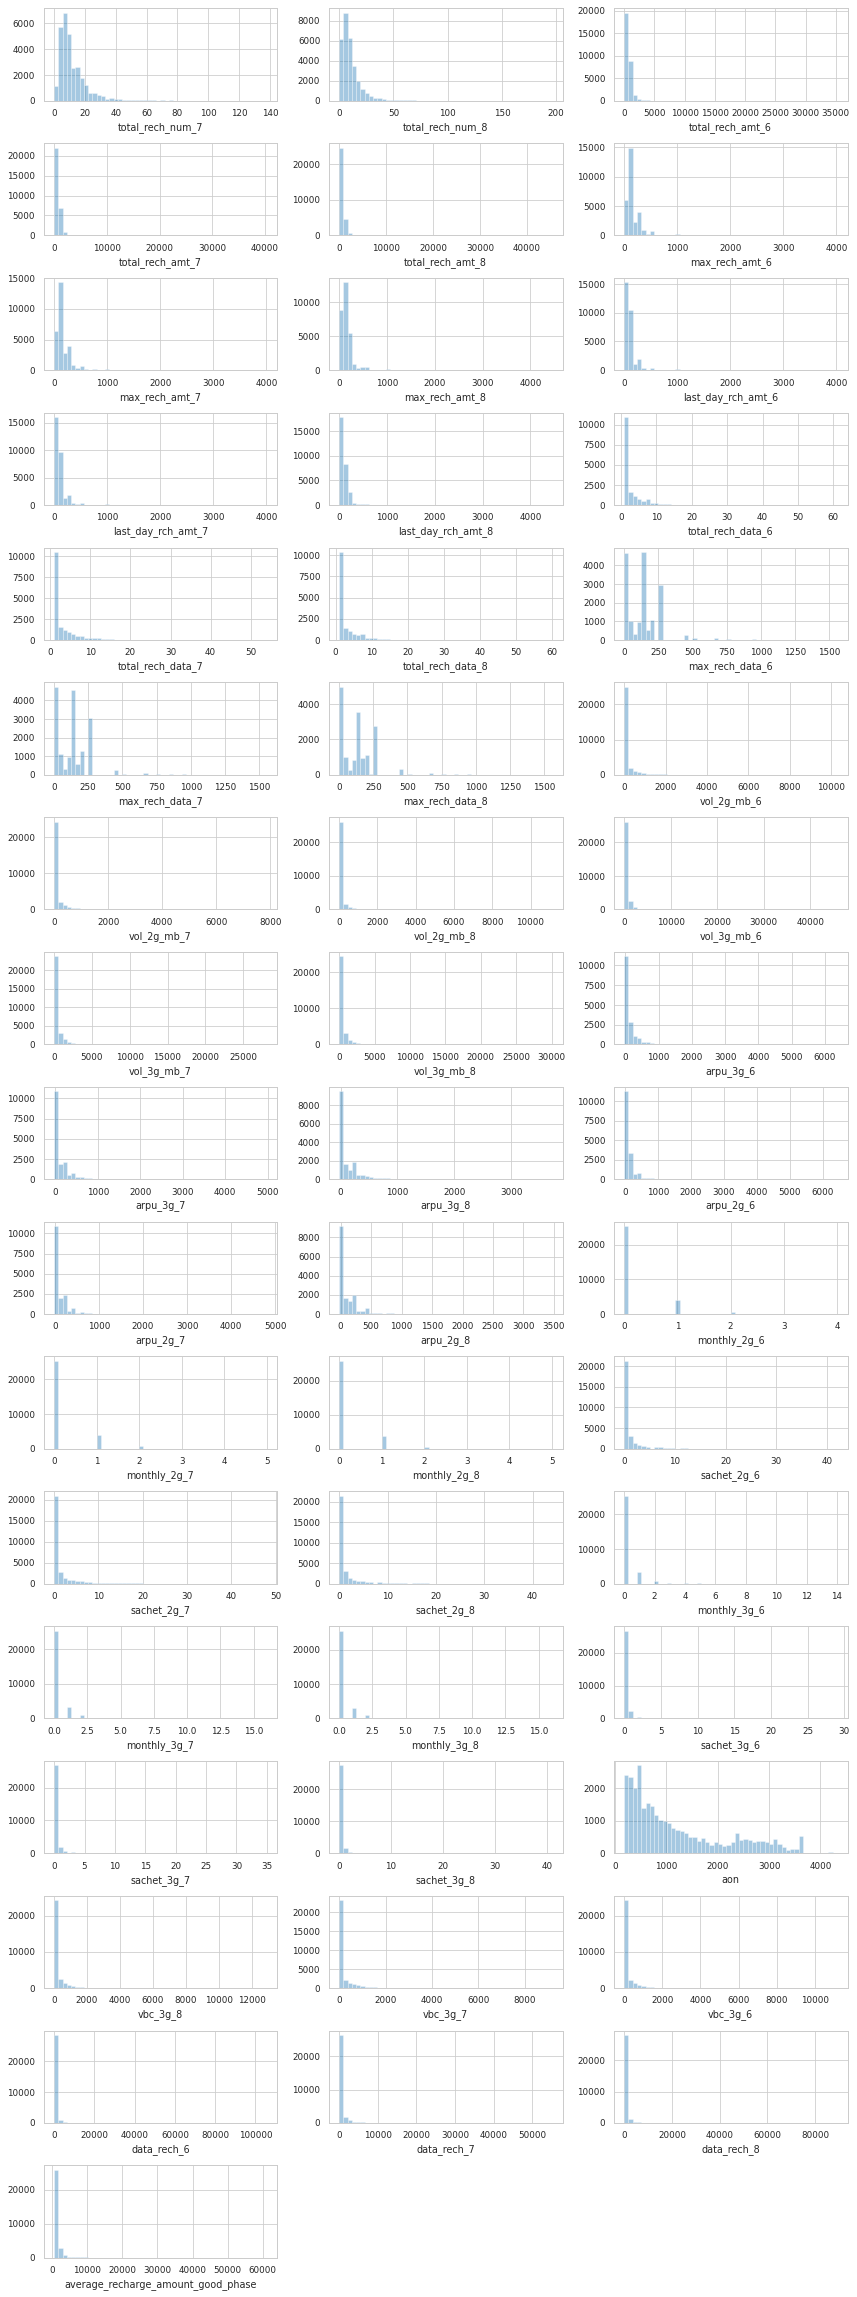

In [60]:
numeric_univariate(numeric_attributes[100:])

_Observation:_   
* Reacharge counts are multi mode 
* All others attributes are skewed

### Categorical Attributes Analysis except `chrun`

In [61]:
# recipe to analyze categorical attributes distirbution
def univariate_cat(atributes, figsize=(15, 10)):
    r = math.ceil(len(atributes) / 3)
    c = min(len(atributes), 3)
    plt.figure(figsize=figsize)
    plt.title("frequency distribution")

    for i, attribute in enumerate(atributes,1):
        plt.subplot(r, c, i)
        counts = high_valued_customers[attribute].value_counts()
        ax = sns.barplot(counts.index, counts.values)
        ax.set_xlabel(attribute)
    plt.subplots_adjust(hspace=0.5, right=1)
    plt.tight_layout()
    plt.show()

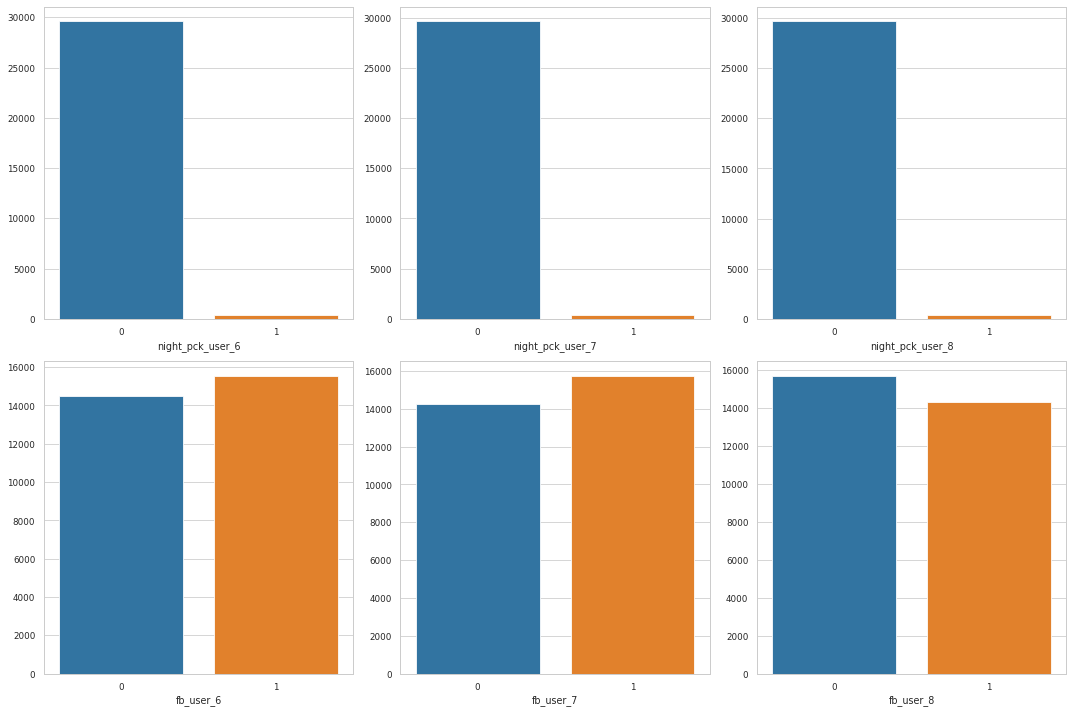

In [62]:
# categorical attributes 
cat_attributes = high_valued_customers.select_dtypes(include=['category','object']).columns.to_series()
# categorical study excpet chun
univariate_cat(cat_attributes.drop('churn'))

##### _Observation:_   
* Night Pack Users are very less.
* The distribution of social media scheme in ratio ~`48:52`.

## Missing Value Analysis

In [63]:
# recipe to calculate percentage missing
def missing_percentage():
    all_na_data = high_valued_customers.isna().mean() * 100
    all_na_data = all_na_data.drop(all_na_data[all_na_data == 0].index).sort_values(ascending=False)
    return pd.DataFrame({'Missing value %' :all_na_data})

In [64]:
missing_percentage()

Missing value %
arpu_2g_8                46.8251         
max_rech_data_8          46.8251         
total_rech_data_8        46.8251         
date_of_last_rech_data_8 46.8251         
arpu_3g_8                46.8251         
date_of_last_rech_data_6 44.1485         
max_rech_data_6          44.1485         
arpu_2g_6                44.1485         
arpu_3g_6                44.1485         
total_rech_data_6        44.1485         
date_of_last_rech_data_7 43.1452         
arpu_2g_7                43.1452         
arpu_3g_7                43.1452         
total_rech_data_7        43.1452         
max_rech_data_7          43.1452         
std_og_t2m_mou_8         3.9132          
loc_ic_t2f_mou_8         3.9132          
loc_ic_t2m_mou_8         3.9132          
loc_ic_t2t_mou_8         3.9132          
spl_og_mou_8             3.9132          
isd_og_mou_8             3.9132          
std_og_mou_8             3.9132          
std_og_t2c_mou_8         3.9132          
std_og_t2f_mou_8         3.9132          
roam_og_mou_8            3.9132          
std_og_t2t_mou_8         3.9132          
loc_og_mou_8             3.9132          
loc_og_t2c_mou_8         3.9132          
loc_og_t2f_mou_8         3.9132          
loc_og_t2m_mou_8         3.9132          
loc_og_t2t_mou_8         3.9132          
std_ic_t2t_mou_8         3.9132          
roam_ic_mou_8            3.9132          
offnet_mou_8             3.9132          
onnet_mou_8              3.9132          
loc_ic_mou_8             3.9132          
og_others_8              3.9132          
isd_ic_mou_8             3.9132          
spl_ic_mou_8             3.9132          
std_ic_t2o_mou_8         3.9132          
std_ic_mou_8             3.9132          
std_ic_t2f_mou_8         3.9132          
ic_others_8              3.9132          
std_ic_t2m_mou_8         3.9132          
date_of_last_rech_8      1.9433          
spl_ic_mou_6             1.8166          
isd_og_mou_6             1.8166          
loc_og_t2t_mou_6         1.8166          
std_og_mou_6             1.8166          
loc_og_mou_6             1.8166          
std_og_t2c_mou_6         1.8166          
isd_ic_mou_6             1.8166          
std_og_t2t_mou_6         1.8166          
std_og_t2f_mou_6         1.8166          
std_ic_t2m_mou_6         1.8166          
loc_og_t2c_mou_6         1.8166          
std_og_t2m_mou_6         1.8166          
loc_og_t2f_mou_6         1.8166          
ic_others_6              1.8166          
loc_og_t2m_mou_6         1.8166          
std_ic_mou_6             1.8166          
spl_og_mou_6             1.8166          
loc_ic_mou_6             1.8166          
og_others_6              1.8166          
roam_og_mou_6            1.8166          
onnet_mou_6              1.8166          
std_ic_t2t_mou_6         1.8166          
loc_ic_t2t_mou_6         1.8166          
roam_ic_mou_6            1.8166          
std_ic_t2o_mou_6         1.8166          
loc_ic_t2m_mou_6         1.8166          
std_ic_t2f_mou_6         1.8166          
loc_ic_t2f_mou_6         1.8166          
offnet_mou_6             1.8166          
loc_og_t2f_mou_7         1.7899          
onnet_mou_7              1.7899          
offnet_mou_7             1.7899          
loc_og_t2m_mou_7         1.7899          
roam_og_mou_7            1.7899          
ic_others_7              1.7899          
roam_ic_mou_7            1.7899          
loc_og_t2t_mou_7         1.7899          
std_ic_t2m_mou_7         1.7899          
spl_ic_mou_7             1.7899          
loc_og_t2c_mou_7         1.7899          
og_others_7              1.7899          
loc_ic_mou_7             1.7899          
std_ic_t2f_mou_7         1.7899          
loc_ic_t2f_mou_7         1.7899          
loc_ic_t2m_mou_7         1.7899          
loc_ic_t2t_mou_7         1.7899          
std_ic_t2o_mou_7         1.7899          
isd_ic_mou_7             1.7899          
spl_og_mou_7             1.7899          
isd_og_mou_7             1.7899     

### Imputing missing values

#### With Zero
for `total_rech_data`, `ic_others`, and `max_rech_data` KPIs' attributes can be filled with `0` (zero).

In [65]:
zero_fill_able = get_kpi_attributes_names('total_rech_data') + get_kpi_attributes_names('ic_others')  + get_kpi_attributes_names('max_rech_data')

for feature in zero_fill_able:
    high_valued_customers[feature] = high_valued_customers[feature].fillna(0)

#### With Arbitary Value

for `date_of_last_rech_data` KPI, assuming recharge was done before june month, Let say `31 May`.

*Note. It is okay to have date of May month even in KPI value of July, August*

In [66]:
date_of_last_rech_kpi = get_kpi_attributes_names('date_of_last_rech_data')
reference_date = pd.to_datetime('2014-05-31')
high_valued_customers[date_of_last_rech_kpi] = high_valued_customers[date_of_last_rech_kpi].fillna(reference_date)

similarly, for `date_of_last_rech` KPI, filling missing values with `31 May`.

In [67]:
date_of_last_rech_kpi = get_kpi_attributes_names('date_of_last_rech')
high_valued_customers[date_of_last_rech_kpi] = high_valued_customers[date_of_last_rech_kpi].fillna(reference_date)

#### With Median

For `arpu_3g` and `arpu_2g`, Impute missing values with median

In [68]:
features = [
            'arpu_3g_6',
            'arpu_3g_7',
            'arpu_3g_8',
            'arpu_2g_6',
            'arpu_2g_7',
            'arpu_2g_8'
            ]

high_valued_customers[features] = high_valued_customers[features].fillna(high_valued_customers[features].median())

for rest, also imputing missing values with median

In [69]:
features = missing_percentage().index.tolist()
high_valued_customers[features] = high_valued_customers[features].fillna(high_valued_customers[features].median())

In [70]:
missing_percentage()

Empty DataFrame
Columns: [Missing value %]
Index: []

> All missing values are taken cared

## Features Engineering
*Introducing* new features by composing or removing existing features.    
Note: If features are made from existing attributes,these attributes and releted attributes would be deleted.

### zero_variation_features [Remove] 
These features hardly vary in terms of values: `95%+` values are same.

In [71]:
zero_variation_features = [
                            'loc_og_t2o_mou', 
                            'std_og_t2o_mou', 
                            'loc_ic_t2o_mou', 
                            'std_og_t2c_mou_6',
                            'std_og_t2c_mou_7',
                            'std_og_t2c_mou_8',
                            'std_ic_t2o_mou_6',
                            'std_ic_t2o_mou_7',
                            'std_ic_t2o_mou_8',
                            'og_others_6', 
                            'og_others_7', 
                            'og_others_8'
                        ]

high_valued_customers = high_valued_customers.drop(zero_variation_features, axis=1)

### Last Recharge  [New]
`last_rech`: when did last recharge was done in days with reference to `2014/09/01`

it is calculated as

$$
\begin{aligned}
\mbox{Reference_Date} &= Date(2014-09-01)\\
\mbox{last_rechage} &= min(\mbox{Reference_Date} - \mbox{Recharge Date}_6, \mbox{Reference_Date} - \mbox{Recharge Date}_7, \mbox{Reference_Date} - \mbox{Recharge Date}_8)
\end{aligned}
$$

In [72]:
reference_date = pd.to_datetime('2014-09-01') 

# extract day from date 
day_extractor = lambda x: x.days

diff_rech_6 = (reference_date - high_valued_customers['date_of_last_rech_6'])
diff_rech_7 =  (reference_date - high_valued_customers['date_of_last_rech_7'])
diff_rech_8 = (reference_date - high_valued_customers['date_of_last_rech_8'])

# taking the minimum days
high_valued_customers['last_rech'] = diff_rech_6.combine(diff_rech_7, min).combine(diff_rech_8, min).apply(day_extractor)

### Last Recharge Data [New]
`last_rech_data`: when did last data recharge was done in days.

It is also calcuated as *same way* as `Last Recharge`

In [73]:
diff_rech_data_6 = (reference_date - high_valued_customers['date_of_last_rech_data_6'])
diff_rech_data_7 =  (reference_date - high_valued_customers['date_of_last_rech_data_7'])
diff_rech_data_8 = (reference_date - high_valued_customers['date_of_last_rech_data_8'])

# taking the minimum days
high_valued_customers['last_rech_data'] = diff_rech_data_6.combine(diff_rech_data_7, min).combine(diff_rech_data_8, min).apply(day_extractor)

In [74]:
# These features became irrelavent for study; Removing these
high_valued_customers = high_valued_customers.drop(get_kpi_attributes_names('date_of_last_rech') + get_kpi_attributes_names('date_of_last_rech_data'), axis=1)

### Voice Call Usage Type [New] [KPI]
Binning the user based upon call usage.

=> `Inactive`  : if customer has *not* used both incoming and outgoing.   
=> `Active_IC` : if customer has used incoming only.    
=> `Active_OG` : if customer has used outgoing only.   
=> `Active_all`: if customer has use both incoming and outgoing.   

In [75]:
# Features to store type of user using voice calls for each month
high_valued_customers["voice_call_usage_type_6"] = high_valued_customers.apply(lambda x:
                                                                                    "Inactive" if x.total_og_mou_6 == x.total_ic_mou_6 == 0 else
                                                                                    "Active_IC" if (x.total_og_mou_6 > 0 and x.total_ic_mou_6 == 0) else
                                                                                    "Active_OG" if (x.total_ic_mou_6 > 0 and x.total_og_mou_6 == 0) else
                                                                                    "Active_all"
                                                                                    , axis=1
                                                                            ).astype("category")

high_valued_customers["voice_call_usage_type_7"] = high_valued_customers.apply(lambda x:

                                                                                    "Inactive" if x.total_og_mou_7 == x.total_ic_mou_7 == 0 else
                                                                                    "Active_IC" if (x.total_og_mou_7 > 0 and x.total_ic_mou_7 == 0) else
                                                                                    "Active_OG" if (x.total_ic_mou_7 > 0 and x.total_og_mou_7 == 0) else
                                                                                    "Active_all"
                                                                                    , axis=1
                                                                            ).astype("category")

high_valued_customers["voice_call_usage_type_8"] = high_valued_customers.apply(lambda x:

                                                                                    "Inactive" if x.total_og_mou_8 == x.total_ic_mou_8 == 0 else
                                                                                    "Active_IC" if (x.total_og_mou_8 > 0 and x.total_ic_mou_8 == 0) else
                                                                                    "Active_OG" if (x.total_ic_mou_8 > 0 and x.total_og_mou_8 == 0) else
                                                                                    "Active_all"
                                                                                    , axis=1
                                                                            ).astype("category")

### KPI Difference : Average Good Phase - Action Phase [New]
_(For numeric kpis only)_


KPI difference *per customer* is defined as *square of difference of mean KPI's value over first two months (Good Phase): June, July  with KPI value with Last month (Action Phase): August .*

e.g. for KPI `total_og_mou` , _difference_ of KPI for $customer_i$ is defined as:

$$ 
\begin{aligned}
\mbox{diff_total_og_mou}_{customer_i} &= (\frac{\mbox{total_og_mou_6}_{customer_i} + \mbox{total_og_mou_7}_{customer_i}}{2} - \mbox{total_og_mou_8}_{customer_i})^2\\
&=(0.5 \times (\mbox{total_og_mou_6}_{customer_i} + \mbox{total_og_mou_7}_{customer_i}) - \mbox{total_og_mou_8}_{customer_i})^2
\end{aligned}
$$



In [76]:
# list of numeric kpi 
numeric_kpis = [ 'arpu', 'arpu_2g', 'arpu_3g','data_rech', 'ic_others', 'isd_ic_mou', 'isd_og_mou', 
              'last_day_rch_amt', 'loc_ic_mou','loc_ic_t2f_mou', 'loc_ic_t2m_mou', 'loc_ic_t2t_mou', 
              'loc_og_mou', 'loc_og_t2c_mou', 'loc_og_t2f_mou', 'loc_og_t2m_mou', 'loc_og_t2t_mou', 
              'max_rech_amt', 'offnet_mou', 'onnet_mou', 'roam_ic_mou', 'roam_og_mou', 'spl_ic_mou', 
              'spl_og_mou', 'std_ic_mou','std_ic_t2f_mou', 'std_ic_t2m_mou', 'std_ic_t2t_mou', 
              'std_og_mou', 'std_og_t2f_mou','std_og_t2m_mou', 'std_og_t2t_mou', 'total_ic_mou', 
              'total_og_mou', 'total_rech_amt', 'total_rech_num', 'vbc_3g', 'vol_2g_mb','vol_3g_mb',
              'max_rech_data', 'monthly_2g', 'monthly_3g', 'sachet_2g', 'sachet_3g', 'total_rech_data'
             ]


# list of categorical kpi
cat_kpis = ['fb_user', 'night_pck_user','voice_call_usage_type']


In [77]:
for kpi in numeric_kpis:
    feature_name='diff_'+ kpi
    high_valued_customers[feature_name] = (0.5 * (high_valued_customers[kpi+'_6'] + high_valued_customers[kpi+'_7']) - high_valued_customers[kpi+'_8']) **2 

### Data KPI Difference [New]
Combining 2G+3G data KPI difference as other difference.

In [78]:
# for vol attributes
difference = lambda x: ((x.vol_2g_mb_8 + x.vol_3g_mb_8) - (0.5 * (x.vol_2g_mb_6 + x.vol_3g_mb_6 + x.vol_2g_mb_7 + x.vol_3g_mb_7)))**2
high_valued_customers["diff_total_data"] = high_valued_customers.apply(difference, axis=1)

# for arpu attributes
difference = lambda x: ((x.arpu_2g_8 + x.arpu_3g_8) - (0.5*(x.arpu_2g_6 + x.arpu_3g_6 + x.arpu_2g_7 + x.arpu_3g_7)))**2
high_valued_customers["diff_arpu_data"] = high_valued_customers.apply(difference, axis=1)

In [79]:
# removing standalone differences
high_valued_customers = high_valued_customers.drop(['diff_vol_3g_mb', 'diff_vol_2g_mb', 'diff_arpu_2g', 'diff_arpu_3g'], axis=1)

# update diff list
delete_kpis_for_diff = ['vol_2g_mb', 'vol_3g_mb', 'arpu_2g', 'arpu_3g']
diff_kpis = list(filter(lambda i: i not in delete_kpis_for_diff , numeric_kpis))
diff_kpis += ['total_data', 'arpu_data']

### Onnet Offnet difference for Good Phase [New]
Difference of On network and off network usage for good phase

In [80]:
# Feature to store difference between onnet and offnet MOU for action and good phase (good phase --> avg. of june and july)
difference_1 = lambda x: ((x.onnet_mou_6 + x.onnet_mou_7) - (x.offnet_mou_6 + x.offnet_mou_7)) ** 2
high_valued_customers["good_phase_onnet_offnet_difference"] = high_valued_customers.apply(difference_1, axis=1)

### Onnet Offnet difference for Action Phase [New]
Difference of On network and off network usage for Action phase

In [81]:
difference_2 = lambda x: (x.onnet_mou_8 - x.offnet_mou_8) ** 2
high_valued_customers["action_phase_onnet_offnet_difference"] = high_valued_customers.apply(difference_2, axis=1)

### Recharge Type for Good phase [New]
Bining Recharge (call + data) of action phase into classes

In [82]:
# Feature to store recharge type in good phase

high_valued_customers["good_phase_avg_rech_type"] = pd.cut(
                                                            0.5*(
                                                                    high_valued_customers["total_rech_amt_6"] + high_valued_customers["total_rech_amt_7"] +
                                                                    high_valued_customers['data_rech_6'] + high_valued_customers['data_rech_7']
                                                                ),
                                                            bins=[-0.001, 100, 250, 500, 1000, 50000],
                                                            labels=['low', 'low_medium', 'medium', 'high', 'higher']
                                                        )


### Recharge Type for Action phase [New]
Bining Recharge (call + data) of Action Phase into classes 

In [83]:
# Feature to store recharge type in action phase

high_valued_customers["action_phase_rech_type"] = pd.cut(
                                                            high_valued_customers["total_rech_amt_8"] + high_valued_customers['data_rech_8'],
                                                            bins=[-0.001, 100, 250, 500, 1000, 50000],
                                                            labels=['low', 'low_medium', 'medium', 'high', 'higher']
                                                        )

In [84]:
Markdown('''There are `{feature_count}` features.'''.format(feature_count=high_valued_customers.shape[1]))

There are `196` features.

> All missing values have been taken care of

## Outliers Removal
1. Select data points less than $\mu$ + $4\sigma$ (Keeping 99.9% data points)
2. Select features if number of data points which are not selected is less than `25`
3. Remove the outlier data points from the feature.

In [85]:
# Churn Rate before outlier removal
churn_rate = (high_valued_customers['churn'] == 1).mean() * 100
Markdown("**Before Removing Outliers**: The count of observations is `{}` and Churn Rate is `{}`.".format(high_valued_customers.shape[0], '%.2f' % churn_rate))

**Before Removing Outliers**: The count of observations is `30001` and Churn Rate is `8.14`.

In [86]:
# get the numeric attributes
numeric_attributes = high_valued_customers.select_dtypes([np.number]).columns.tolist()
high_valued_customers[numeric_attributes].describe([.01, .25, .5, .75, .99])

arpu_6     arpu_7     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
count 30001.0000 30001.0000 30001.0000 30001.0000   30001.0000   30001.0000     
mean  558.4908   560.7822   508.5980   262.3927     269.3745     236.9664       
std   460.6405   479.7769   501.9620   458.8865     479.2639     457.2076       
min   -2258.7090 -2014.0450 -945.8080  0.0000       0.0000       0.0000         
1%    1.0000     0.7000     0.0000     0.0000       0.0000       0.0000         
25%   309.8650   309.8260   231.4730   20.0100      18.9300      15.6300        
50%   481.6940   480.9430   427.5850   88.0600      86.8850      72.9300        
75%   699.9430   698.3150   661.4910   290.4400     290.2400     239.9600       
99%   1985.1150  1999.5000  1986.6220  2151.7400    2201.9600    2159.1100      
max   27731.0880 35145.8340 33543.6240 7376.7100    8157.7800    10752.5600     

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count 30001.0000    30001.0000    30001.0000    30001.0000     30001.0000       
mean  377.8655      382.1685      342.8091      16.1104        12.6425          
std   480.2621      496.7466      478.1950      76.3022        75.7859          
min   0.0000        0.0000        0.0000        0.0000         0.0000           
1%    0.0000        0.0000        0.0000        0.0000         0.0000           
25%   80.7100       78.5400       63.1900       0.0000         0.0000           
50%   229.6350      227.1200      197.5900      0.0000         0.0000           
75%   487.9400      494.0100      438.8900      0.0000         0.0000           
99%   2326.3600     2410.8900     2193.1300     342.4400       280.4600         
max   8362.3600     9667.1300     14007.3400    2613.3100      3813.2900        

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count 30001.0000     30001.0000     30001.0000     30001.0000       
mean  12.5006        26.5715        20.1521        19.8656          
std   74.1253        116.2055       96.1004        104.7190         
min   0.0000         0.0000         0.0000         0.0000           
1%    0.0000         0.0000         0.0000         0.0000           
25%   0.0000         0.0000         0.0000         0.0000           
50%   0.0000         0.0000         0.0000         0.0000           
75%   0.0000         0.0000         0.0000         0.0000           
99%   282.1900       530.7100       438.5900       427.0300         
max   4169.8100      3775.1100      2812.0400      5337.0400        

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count 30001.0000        30001.0000        30001.0000        30001.0000          
mean  84.9494           86.1357           78.9865           164.7009            
std   228.6479          240.3859          227.1058          249.3938            
min   0.0000            0.0000            0.0000            0.0000              
1%    0.0000            0.0000            0.0000            0.0000              
25%   5.2400            5.5300            4.3600            21.8400             
50%   25.5800           25.7800           23.2400           80.2400             
75%   77.9800           78.3400           72.0400           208.9300            
99%   1006.3600         1018.5300         913.3300          1136.9600           
max   6431.3300         7400.6600         10752.5600        4729.7400           

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count 30001.0000        30001.0000        30001.0000        30001.0000          
mean  164.4721          154.6737          6.3461            6.4274              
std   240.8317          232.2089          22.1230           21.9431             
min   0.0000            0.0000            0.0000            0.0000              
1%    0.0000            0.0000            0.0000            0.0000              
25%   23.6800           19.0900           0.0000            0.0000              
50%   8

In [87]:
for attribute in numeric_attributes:
    std = high_valued_customers[attribute].std()
    upper_lim = high_valued_customers[attribute].mean() + 4 * std

    outlier_filter = high_valued_customers[attribute].apply(lambda x: x <= upper_lim )
    
    diff = high_valued_customers.shape[0] - sum(outlier_filter)
    
    
    # Features with less than 25 outliers detected by the range were removed.
    if diff < 25:
        high_valued_customers = high_valued_customers[outlier_filter]

In [88]:
churn_rate = (high_valued_customers['churn'] == 1).mean() * 100
Markdown("**After Removing Outliers**: the count of observations is `{}` and Churn Rate is `{}`.".format(high_valued_customers.shape[0], '%.2f' % churn_rate))

**After Removing Outliers**: the count of observations is `29946` and Churn Rate is `8.14`.

In [89]:
high_valued_customers.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.3850  214.8160  213.8030  88.0600      86.8850      0.0000         
7  1069.1800 1349.8500 3171.4800 57.8400      54.6800      52.2900        
8  378.7210  492.2230  137.3620  413.6900     351.0300     35.0800        
21 514.4530  597.7530  637.7600  102.4100     132.1100     85.1400        
23 74.3500   193.8970  366.9660  48.9600      50.6600      33.5800        

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0  229.6350      227.1200      0.0000        0.0000         0.0000           
7  453.4300      567.1600      325.9100      16.2300        33.4900          
8  94.6600       80.6300       136.4800      0.0000         0.0000           
21 757.9300      896.6800      983.3900      0.0000         0.0000           
23 85.4100       89.3600       205.8900      0.0000         0.0000           

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0  0.0000         0.0000         0.0000         0.0000           
7  31.6400        23.7400        12.5900        38.0600          
8  0.0000         0.0000         0.0000         0.0000           
21 0.0000         0.0000         0.0000         0.0000           
23 0.0000         0.0000         0.0000         0.0000           

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0  25.5800           25.7800           0.0000            80.2400             
7  51.3900           31.3800           40.2800           308.6300            
8  297.1300          217.5900          12.4900           80.9600             
21 4.4800            6.1600            23.3400           91.8100             
23 48.9600           50.6600           33.5800           82.9400             

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0  81.6850           0.0000            0.1100            0.2100              
7  447.3800          162.2800          62.1300           55.1400             
8  70.5800           50.5400           0.0000            0.0000              
21 87.9300           104.8100          0.7500            0.0000              
23 83.0100           148.5600          0.0000            0.0000              

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0  0.0000            0.0000            0.0000            0.0000              
7  53.2300           0.0000            0.0000            0.0000              
8  0.0000            0.0000            0.0000            7.1500              
21 1.5800            0.0000            0.0000            0.0000              
23 0.0000            0.0000            0.0000            17.7100             

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0  129.3500      132.7300      0.0000        3.3600              
7  422.1600      533.9100      255.7900      4.3000              
8  378.0900      288.1800      63.0400       116.5600            
21 97.0400       94.0900       129.7400      97.9300             
23 131.9100      133.6800      182.1400      0.0000              

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0  3.3000            0.0000            18.1850           17.7500             
7  23.2900           12.0100           49.8900           31.7600             
8  133.4300          22.5800           13.6900           10.0400             
21 125.9400          61.7900           665.3600          808.7400            
23 0.0000            0.0000            2.3600            6.3500              

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0  0.0000            0.0000            0.0000            0.0000              
7  49.1400           6.6600            20.0800           16.6800             
8  75.6900           0.0000            0.0000            0.0000              
21 876.9900          0.0000            0.0000            0.0000              
23 39.6100           0.000

## Analysis Against Churn
### KPI based Analysis
#### KPI over Time vs Churn
KPI vs Churn over period of time

In [90]:
# recipe to draw monthwise variation of given numeric sigle kpi
def monthwise_kpi_churn(kpi, estimator):
    
    attributes = ['churn'] + get_kpi_attributes_names(kpi)
    
    # shaping data 
    df=high_valued_customers[attributes].groupby('churn').agg(estimator)
    df = pd.melt(df.reset_index(), id_vars=['churn'], var_name=['months'], value_name=kpi)
    df['months']=df['months'].apply(lambda name: name[-1])

    ax=sns.lineplot(x="months", y=kpi,
                  hue="churn",
                    data=df,legend= False)
    
    # to highlight action phase
    plt.axvspan(1,2, facecolor='#ef5350', alpha=0.3)
    return ax

In [91]:
# recipe to draw monthwise variation of given numeric multiple kpis
def kpis_churn(kpis, estimator='median'):
    r = math.ceil(len(kpis) / 3)
    c = min(len(kpis), 3)
    
    fig=plt.figure(figsize=(c*3.5, 3*r))
    
    axes=[]
    for i, kpi in enumerate(kpis,1):
        
        plt.subplot(r, c, i)
        axes.append(monthwise_kpi_churn(kpi, estimator))
    
    # for common legend
    fig.legend(axes,     
           labels=['no', 'yes'],   
           loc="left top",   
           borderaxespad=0.2,    
           title="churn?" )
    
    plt.subplots_adjust(hspace=0.5, right=1)
    plt.tight_layout()
    plt.show()

In [92]:
Markdown("There are `{kpis_count}` KPIs with `{kpis_attributes}` attributes".format(kpis_count=len(numeric_kpis), kpis_attributes=3 * len(numeric_kpis)))

There are `45` KPIs with `135` attributes

#### First 20 numeric KPIs analysis

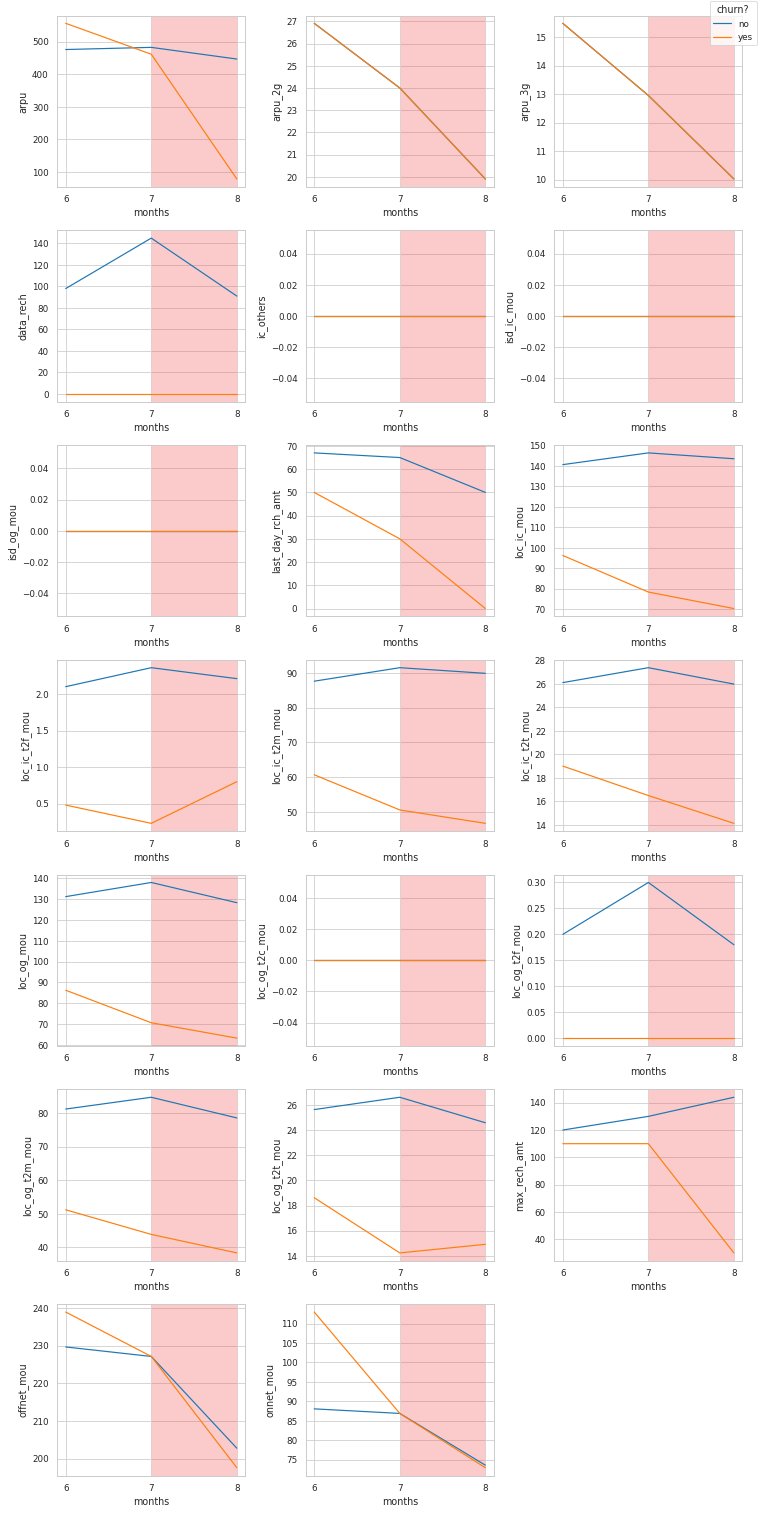

In [93]:
kpis_churn(numeric_kpis[:20], 'median')

> `isd_ic_mou`, `ic_others`, `isd_og_mou`, and `loc_og_t2c_mou` do not impact churning of customers.   
These KPI's attributes can be deleted.


#### 21th-* (Rest) numeric KPIs analysis

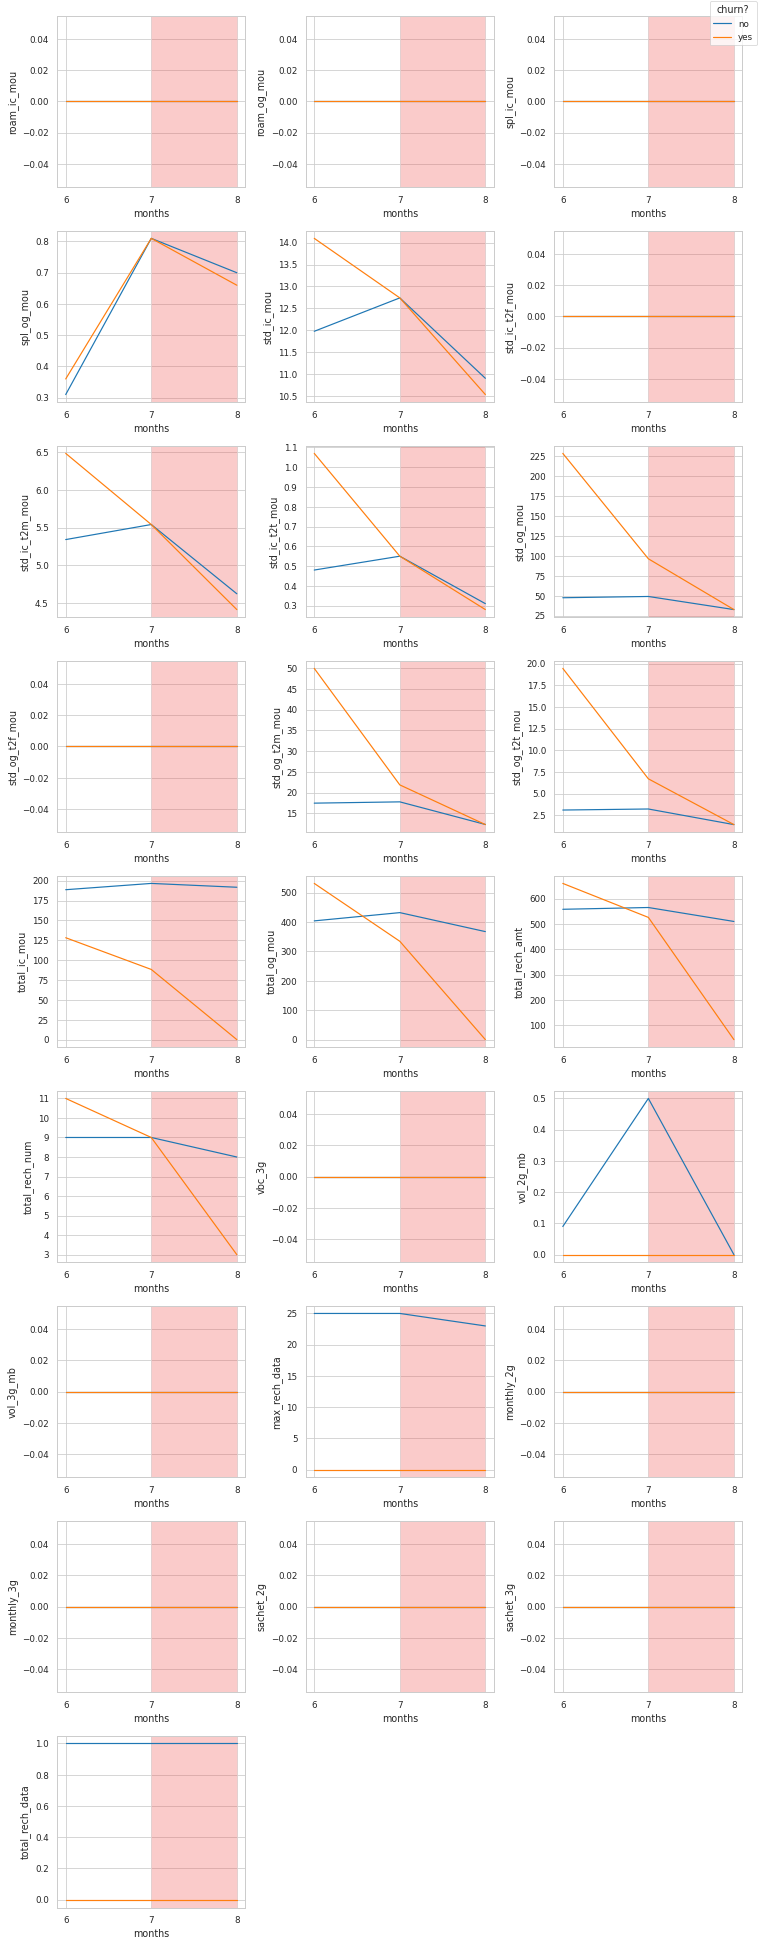

In [94]:
kpis_churn(numeric_kpis[20:], 'median')

> `roam_ic_mou`, `roam_og_mou`, `spl_ic_mou`, `std_ic_t2f_mou`, `std_og_t2f_mou`, `vbc_3g`, `vol_3g_mb`, `monthly_2g`, `monthly_3g`, `sachet_2g` and`sachet_3g` do not impact churning of customers.

**These KPI's attributes would be deleted.**

#### Deleting non impacting KPIs attributes

In [95]:
non_impacting_kpis = ['roam_ic_mou', 'roam_og_mou', 'loc_og_t2c_mou', 'std_og_t2f_mou', 'isd_og_mou',
                      'std_ic_t2f_mou', 'isd_og_mou', 'std_ic_t2f_mou', 'spl_ic_mou', 'isd_ic_mou', 
                      'ic_others', 'vol_3g_mb', 'vbc_3g', 'monthly_2g', 'monthly_3g', 'sachet_2g' and 'sachet_3g' ]

# collecting kpis attributes
kpis_attributes = []
for kpi in non_impacting_kpis:
    kpis_attributes += get_kpi_attributes_names(kpi)

high_valued_customers = high_valued_customers.drop(kpis_attributes, axis=1)

# updating numeric kpis
numeric_kpis = list(filter(lambda i: i not in non_impacting_kpis , numeric_kpis))

#### KPIs Diff vs churn

In [96]:
# recipe to plot graph of KPI against Churn
def diff_kpis_churn(kpis):
    r = math.ceil(len(kpis) / 3)
    c = min(len(kpis), 3)
    
    fig=plt.figure(figsize=(c*3.5, 3*r))
    
    for i, kpi in enumerate(kpis,1):
        plt.subplot(r, c, i)
        sns.scatterplot(y='churn', x= 'diff_'+kpi, data=high_valued_customers)
        
    plt.subplots_adjust(hspace=0.5, right=1)
    plt.tight_layout()
    plt.show()

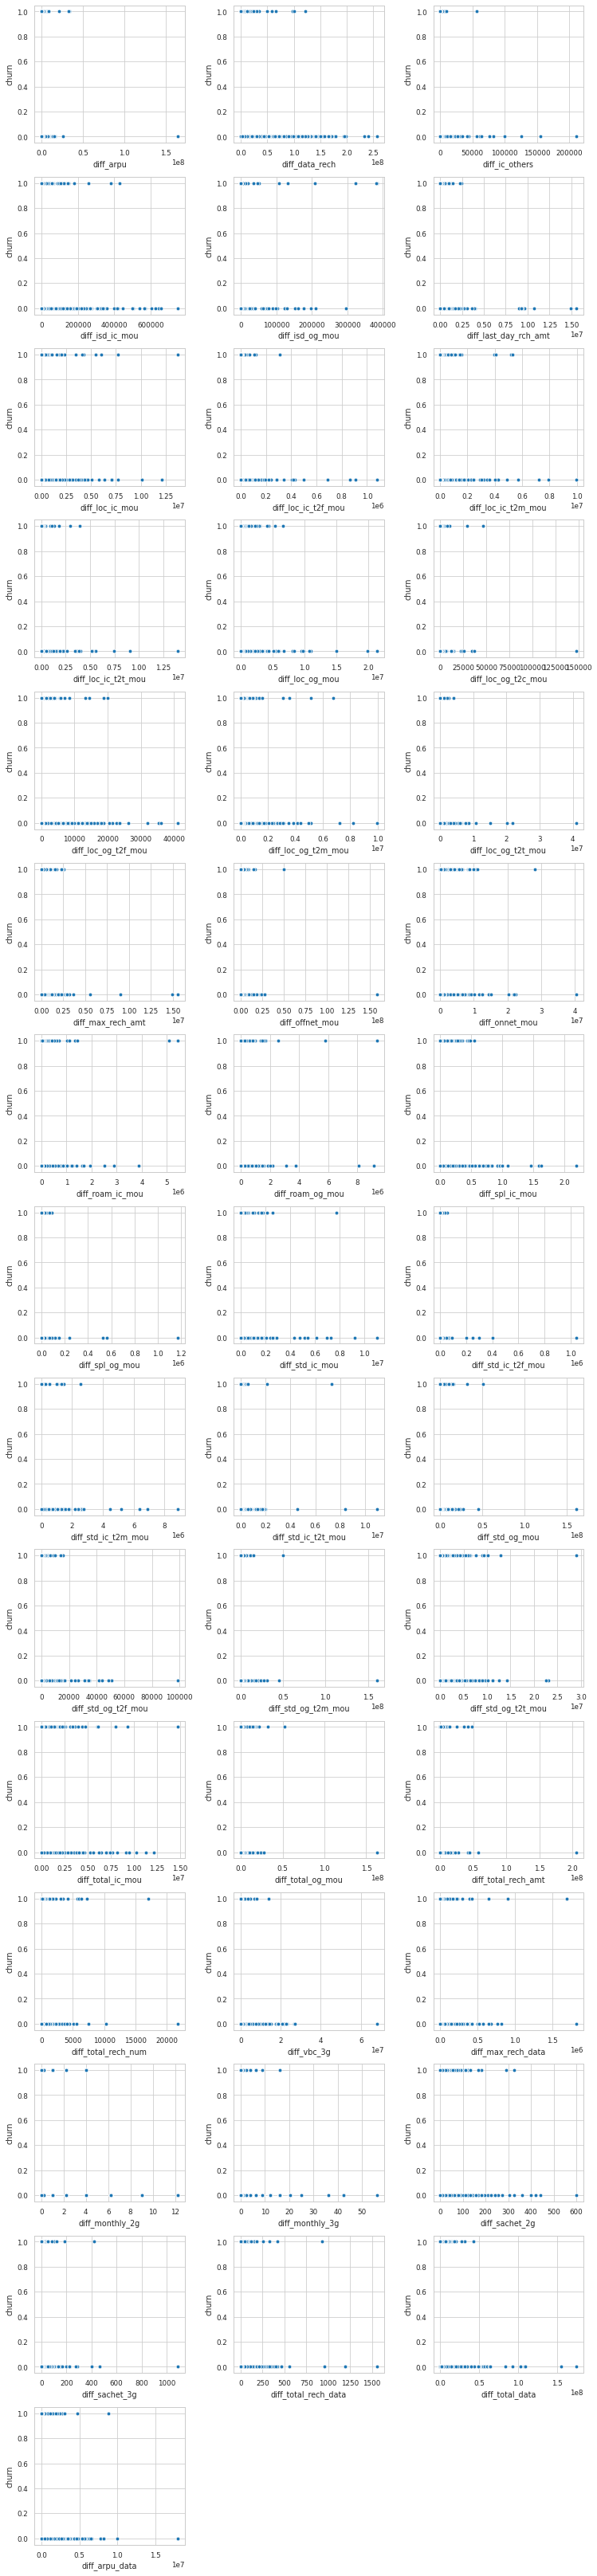

In [97]:
diff_kpis_churn(diff_kpis)

> In Most cases of small value of difference, customers are more likely to churn. 

### Categorical KPI vs Churn

In [98]:
# recipe to plot against categorical kpi against churn
def cat_kpi_churn(kpi):
    attributes = get_kpi_attributes_names(kpi)
#     print(attributes)
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    for variable, subplot in zip(attributes, ax.flatten()):
        sns.countplot(x=variable, hue="churn", data=high_valued_customers, ax=subplot)
        subplot.set_yscale("log")
        subplot.set_ylabel("Count")
        subplot.set_xlabel(variable)
    plt.tight_layout()
    plt.show()

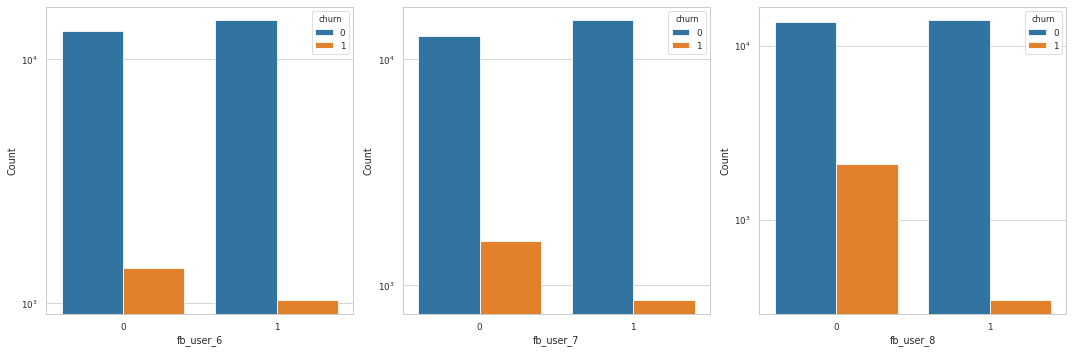

In [99]:
cat_kpi_churn('fb_user')

> As the month progresses the churn rate increases for non-fb users

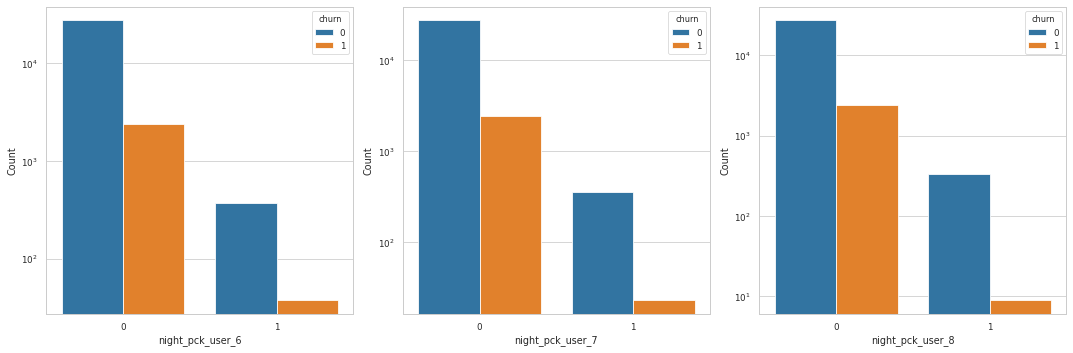

In [100]:
cat_kpi_churn('night_pck_user')

> All months counts look similar

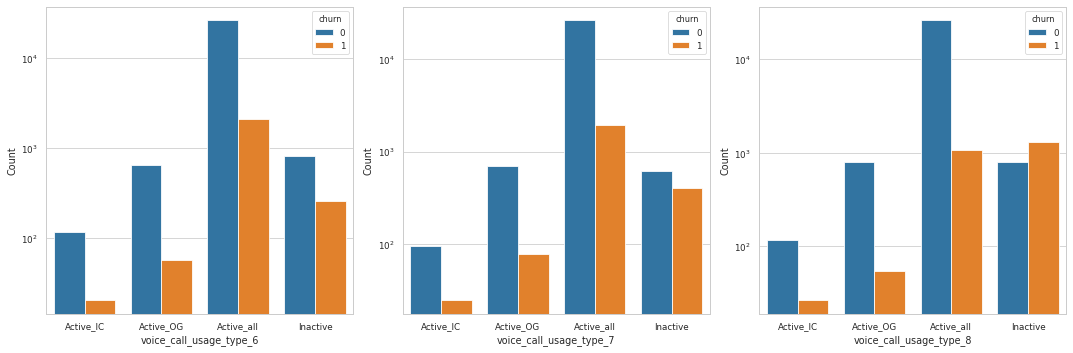

In [101]:
cat_kpi_churn('voice_call_usage_type')

> Counterintuitively, customer with active call usage are also churning. 

### Non KPI features vs Churn analysis

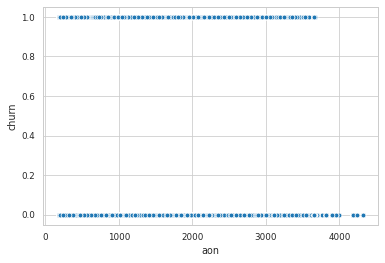

In [102]:
sns.scatterplot(x="aon", y="churn", data=high_valued_customers)
plt.show()

> All Churn case having aon value less than `~3800`.

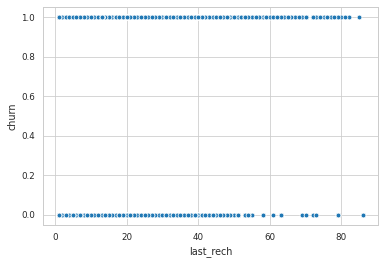

In [103]:
sns.scatterplot(x="last_rech", y="churn", data=high_valued_customers)
plt.show()

> Customers who have not recharge more than `~50` days are more likely to churn

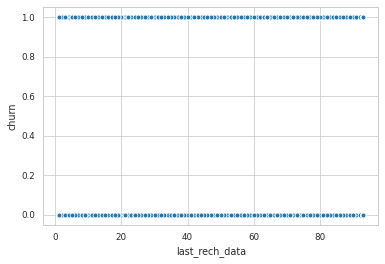

In [104]:
sns.scatterplot(x="last_rech_data", y="churn", data=high_valued_customers)
plt.show()

> No clear pattern is observed

## Correlation Analysis
Since there are too many features, the analysis would be segmented into broad category of features 

In [105]:
# recipe to plot heatmap using corr
def heatmap(features):
    # Let's see the correlation matrix 
    plt.figure(figsize = (30,25)) 
    g = sns.heatmap(high_valued_customers[features].corr(),annot = True, vmin=0.80)
    plt.show()
    

# filter absolute correlation value based upon given factor
def get_strong_correlated(features, corr_factor=0.8):
    corr = high_valued_customers[features].corr().abs().unstack()
    return corr[(corr!=1) & (corr>=corr_factor)].sort_values(ascending = False).reset_index() 

### Incoming Call Features Correlation
All features related to **incomming calls**

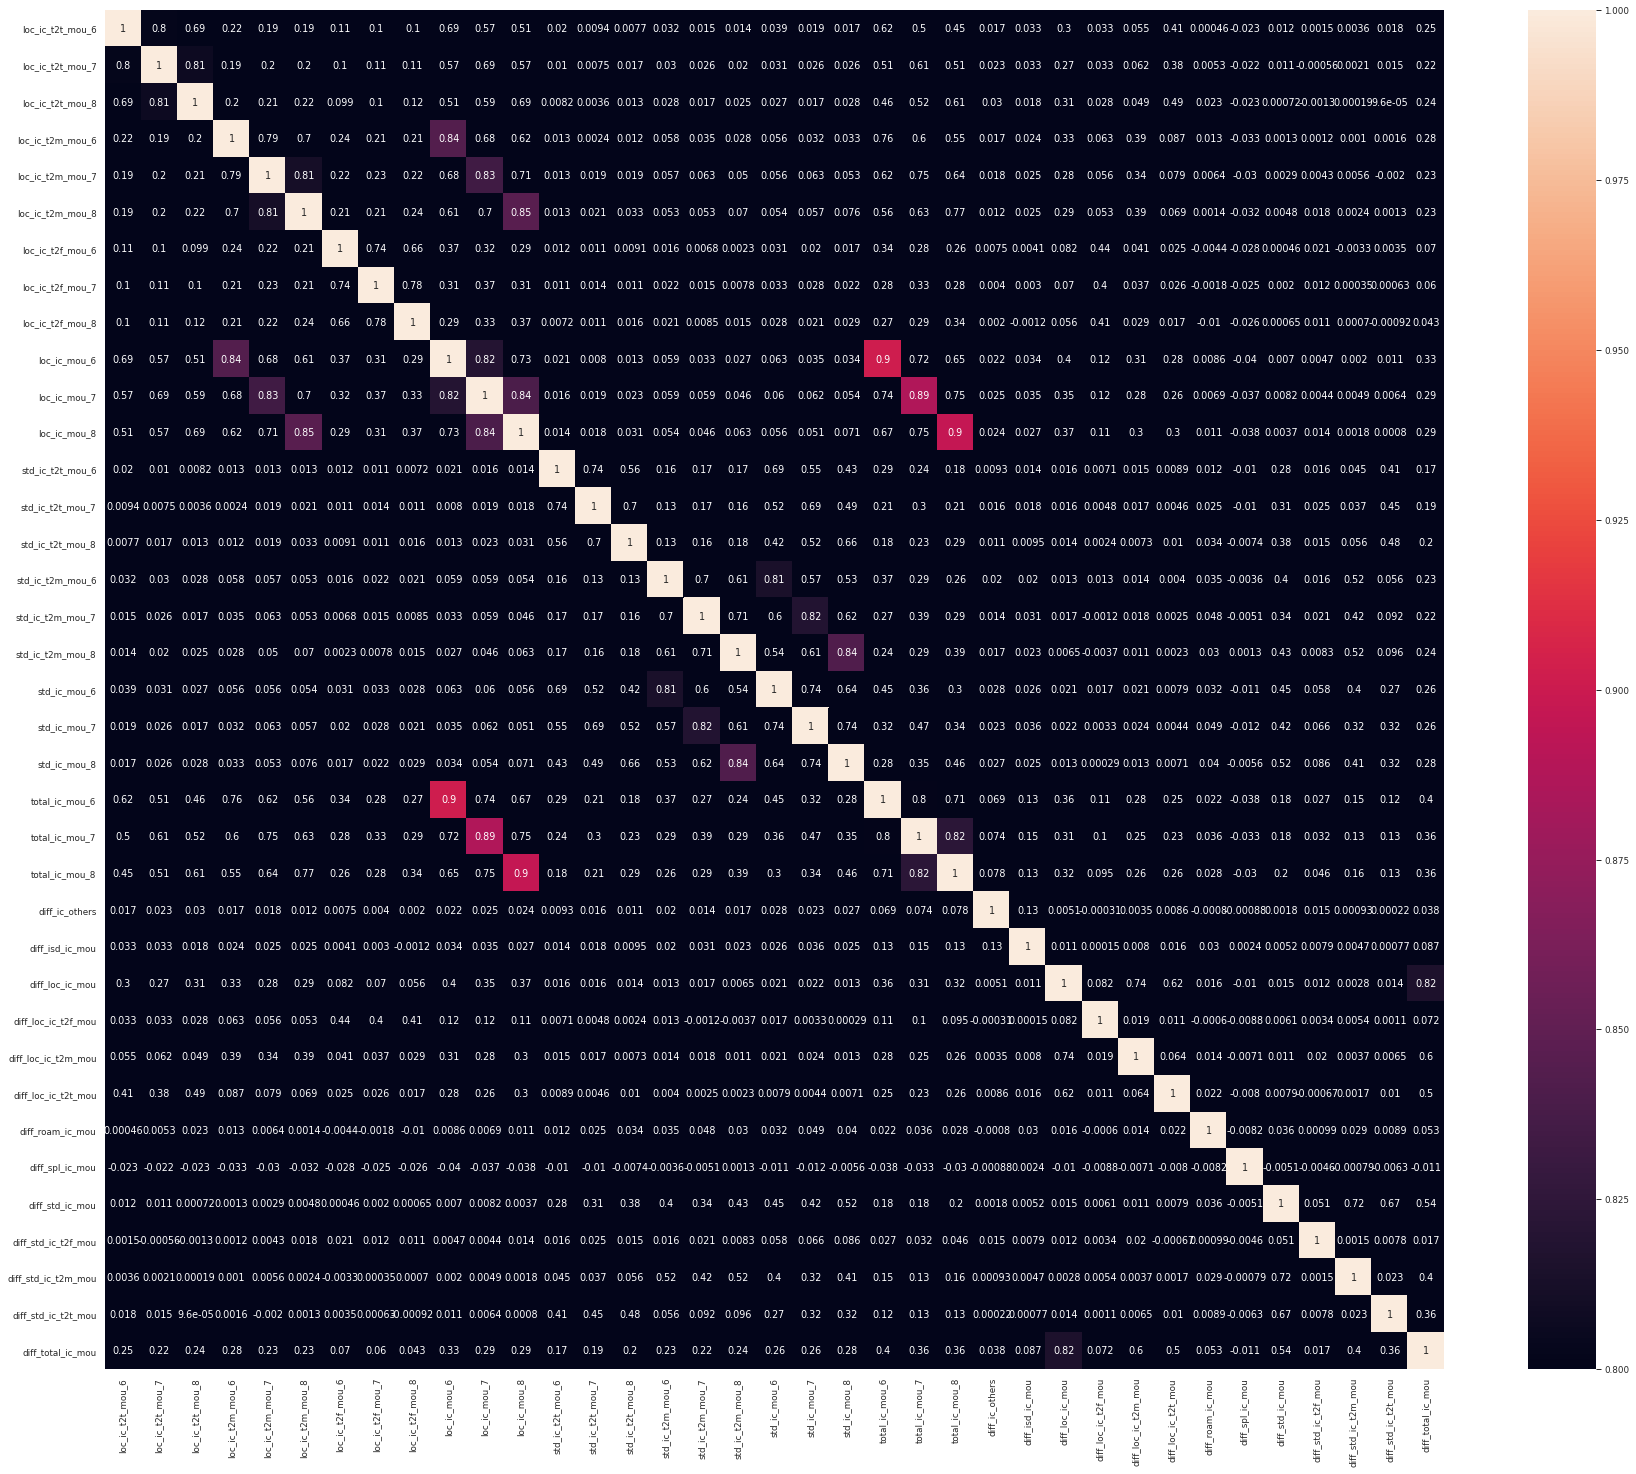

In [106]:
ic_features = high_valued_customers.columns.to_series().filter(regex='ic_')
heatmap(ic_features)

#### Getting Highly Correlated features

In [107]:
get_strong_correlated(ic_features, 0.85)

level_0         level_1      0
0  total_ic_mou_6  loc_ic_mou_6   0.9022
1  loc_ic_mou_6    total_ic_mou_6 0.9022
2  total_ic_mou_8  loc_ic_mou_8   0.8964
3  loc_ic_mou_8    total_ic_mou_8 0.8964
4  total_ic_mou_7  loc_ic_mou_7   0.8873
5  loc_ic_mou_7    total_ic_mou_7 0.8873

> Since total_ic_mou = loc_ic_mou + ...; the deleting total_ic_mou KPI would not be information loss

#### Deleting Correlated features

In [108]:
# Dropping Features
features = [
              "total_ic_mou_6",
              "total_ic_mou_8",
              "total_ic_mou_7",
          ]

high_valued_customers = high_valued_customers.drop(features, axis=1)

### Outgoing calls Features Correlation

All features related to **outgoing calls**

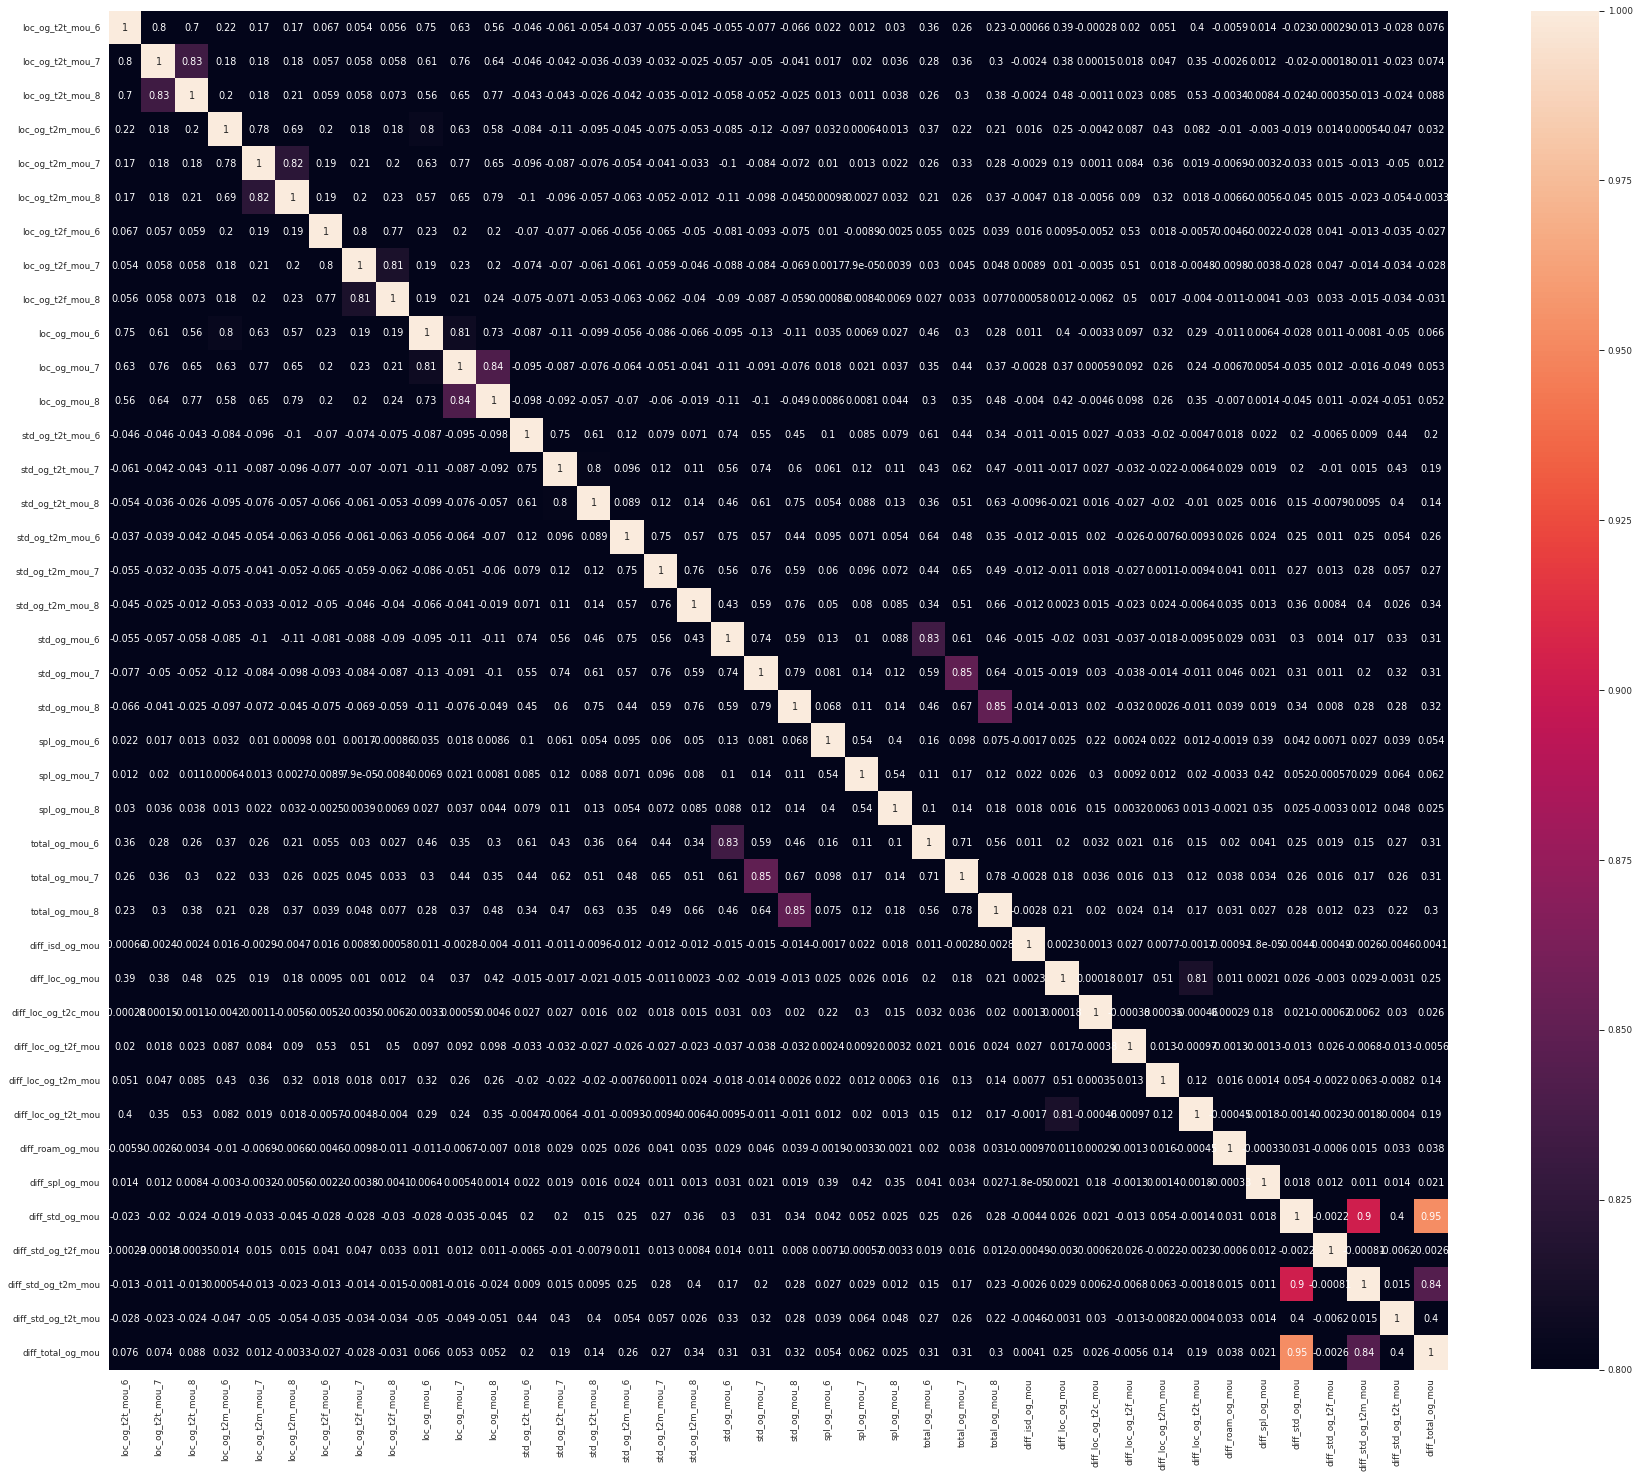

In [109]:
og_features = high_valued_customers.columns.to_series().filter(regex='og_')
heatmap(og_features)

#### Getting Highly Correlated features

In [110]:
get_strong_correlated(og_features, 0.85)

level_0              level_1      0
0  diff_total_og_mou    diff_std_og_mou     0.9526
1  diff_std_og_mou      diff_total_og_mou   0.9526
2  diff_std_og_t2m_mou  diff_std_og_mou     0.9025
3  diff_std_og_mou      diff_std_og_t2m_mou 0.9025
4  total_og_mou_8       std_og_mou_8        0.8503
5  std_og_mou_8         total_og_mou_8      0.8503

> total_og_mou_8 is containing information of std_og_mou, for diff kpi, let's keep broader KPI

#### Removing Correlated Features

In [111]:
features = [
            "total_og_mou_8",
            "diff_std_og_mou",
            "diff_std_og_t2m_mou"
         ]

high_valued_customers = high_valued_customers.drop(features, axis=1)

In [112]:
og_features = high_valued_customers.columns.to_series().filter(regex='og_')
get_strong_correlated(og_features, 0.85)

Empty DataFrame
Columns: [level_0, level_1, 0]
Index: []

### Recharge Attributes Correlation

All features related to **recharge**

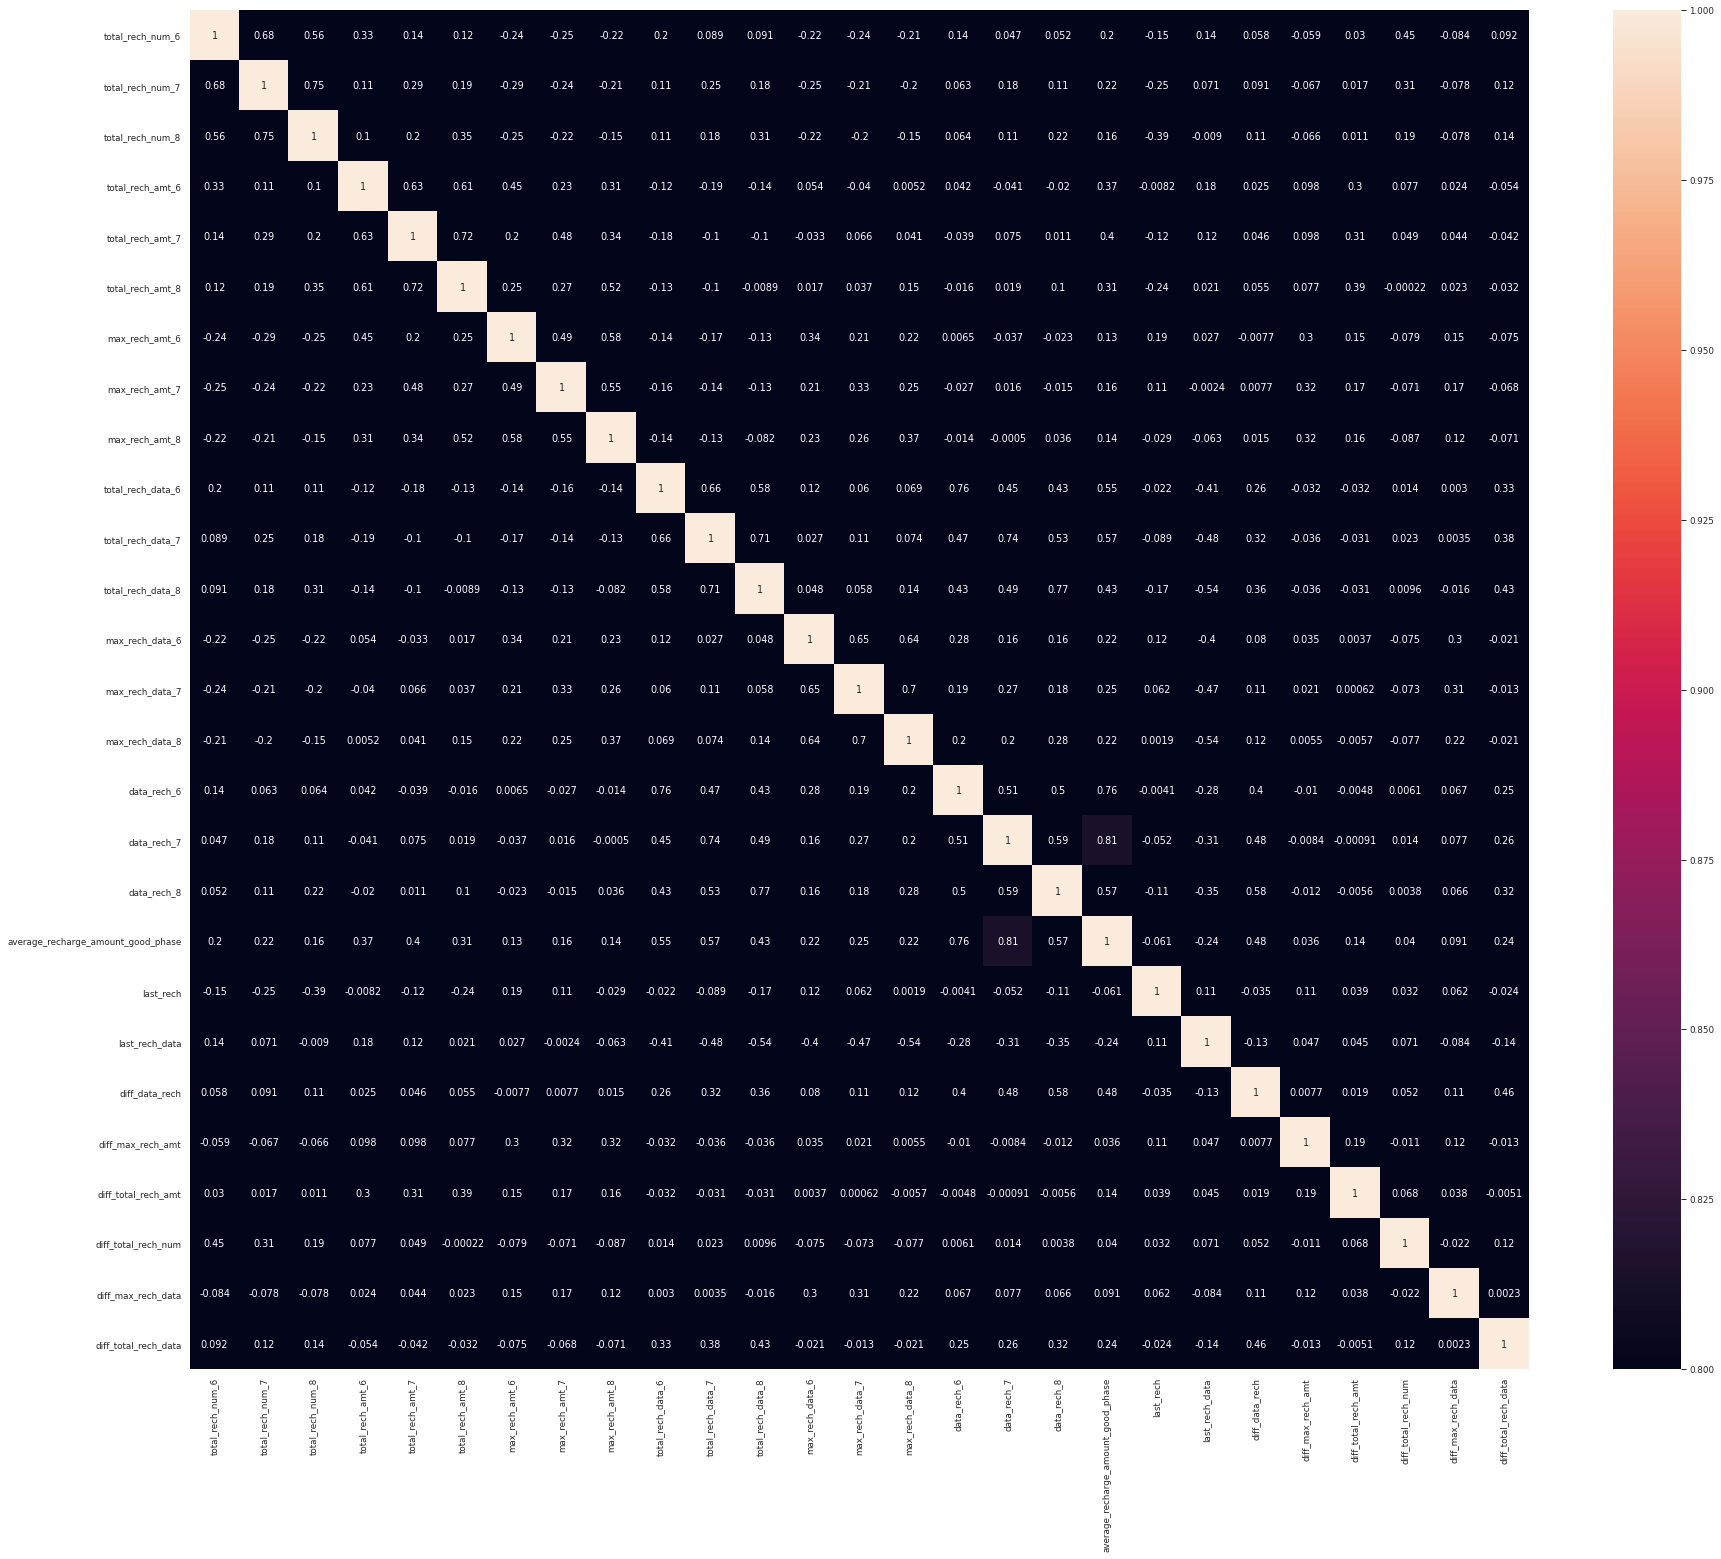

In [113]:
rech_features = high_valued_customers.columns.to_series().filter(regex='rech')
heatmap(rech_features)

#### Getting Highly Correlated features

In [114]:
get_strong_correlated(rech_features, 0.85)

Empty DataFrame
Columns: [level_0, level_1, 0]
Index: []

> All Good ! 

### 2G Data Attributes Correlation

All features related to **2g data usage**

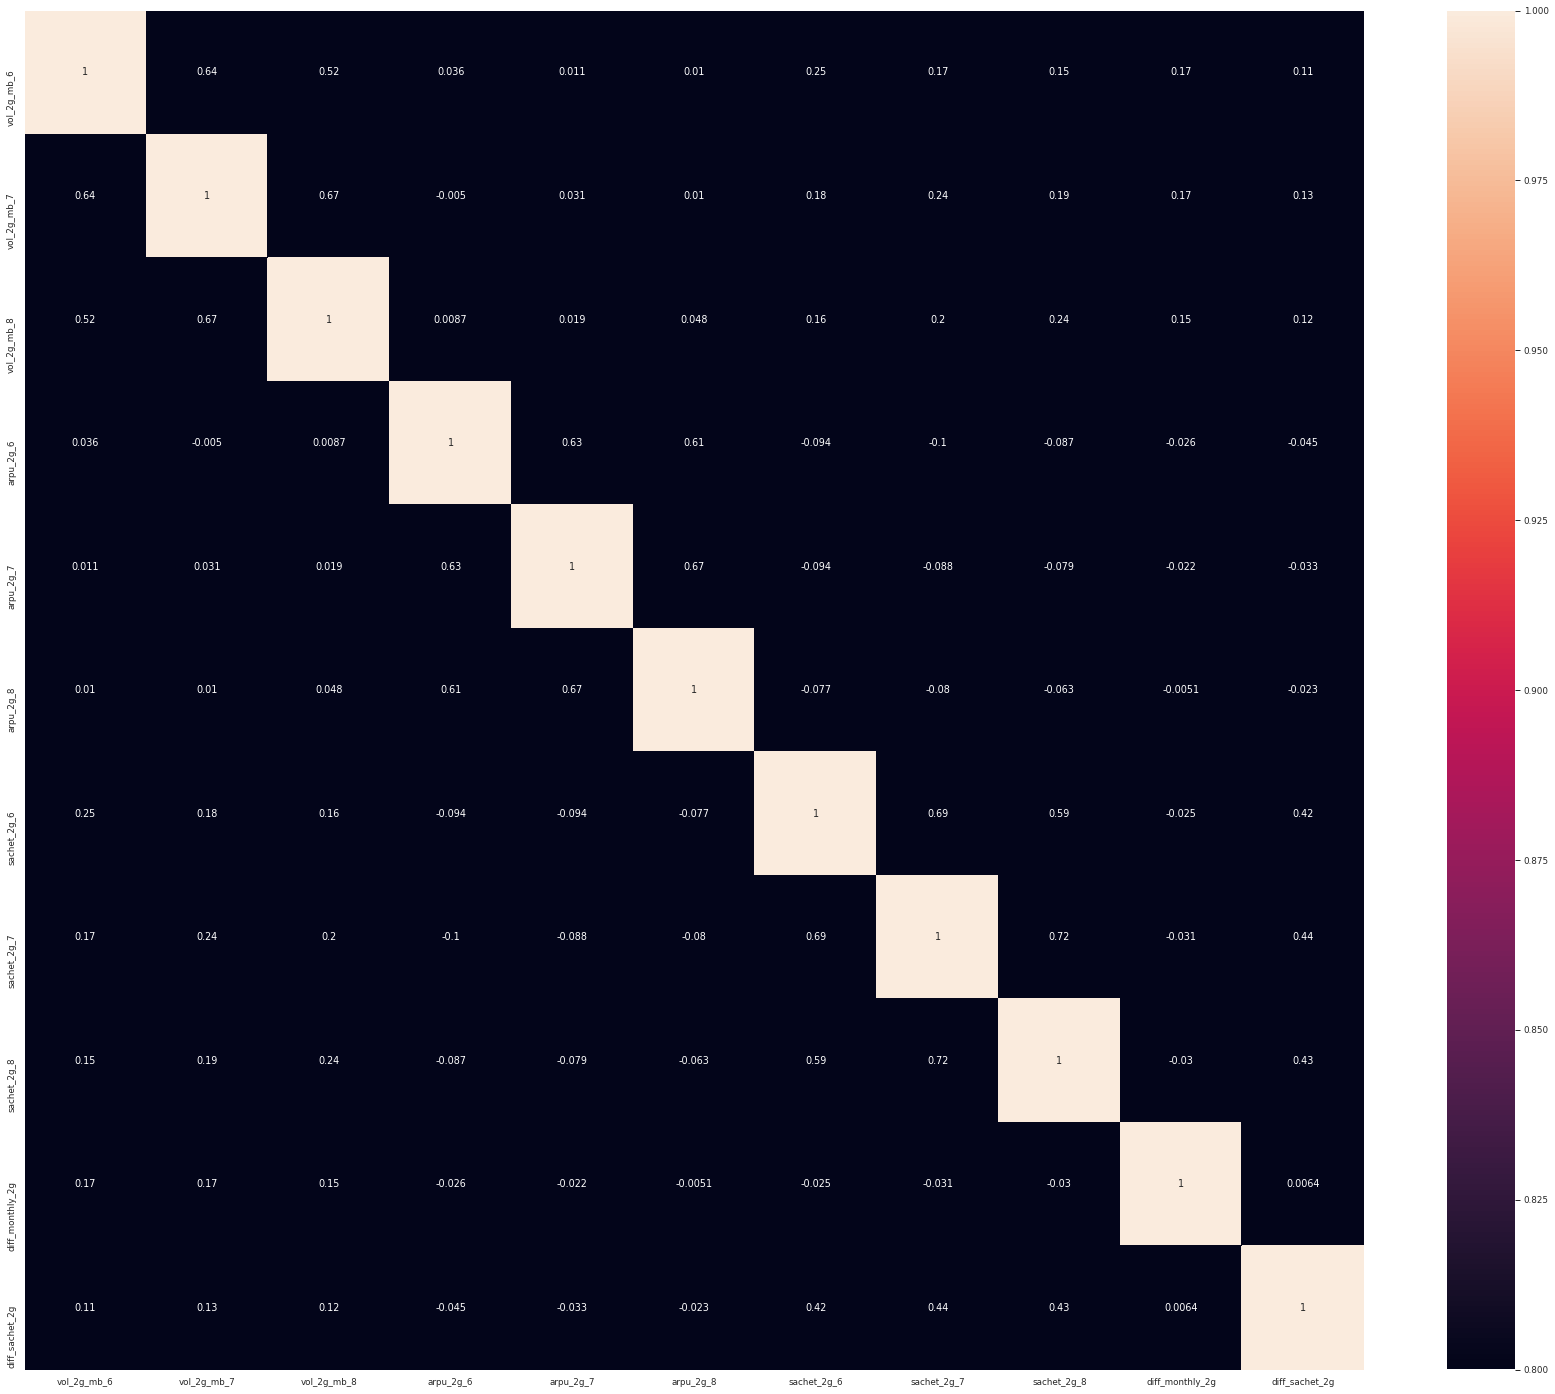

In [115]:
data_2g_features = high_valued_customers.columns.to_series().filter(regex='2g')
heatmap(data_2g_features)

#### Getting Highly Correlated features

In [116]:
get_strong_correlated(data_2g_features, 0.85)

Empty DataFrame
Columns: [level_0, level_1, 0]
Index: []

> All Good ! 

### 3G data Attributes Correlation

All features related to **3g data usage**

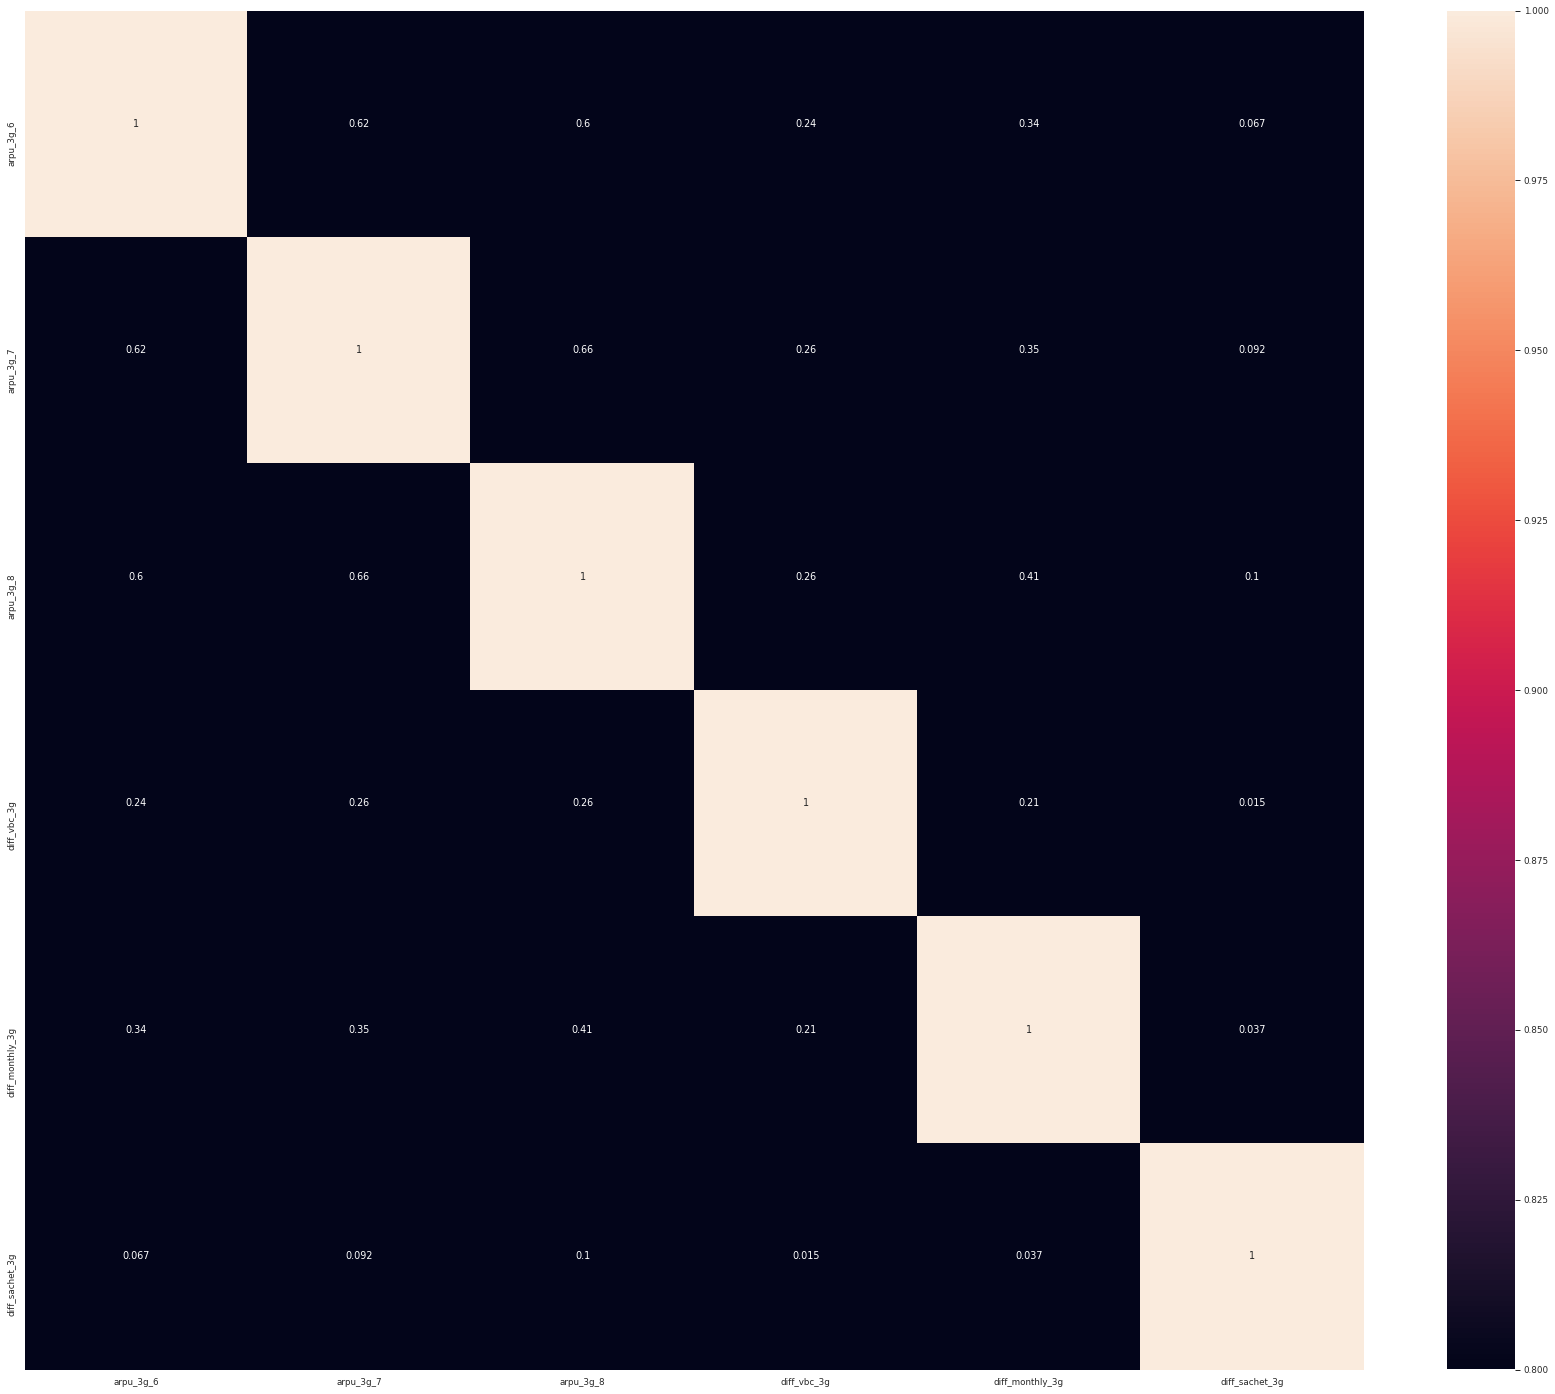

In [117]:
data_3g_features = high_valued_customers.columns.to_series().filter(regex='3g')
heatmap(data_3g_features)

#### Getting Highly Correlated features

In [118]:
get_strong_correlated(data_3g_features, 0.85)

Empty DataFrame
Columns: [level_0, level_1, 0]
Index: []

> All Good ! No Correlated features

### ARPU Attributes Correlation

- All features related to **ARPU**

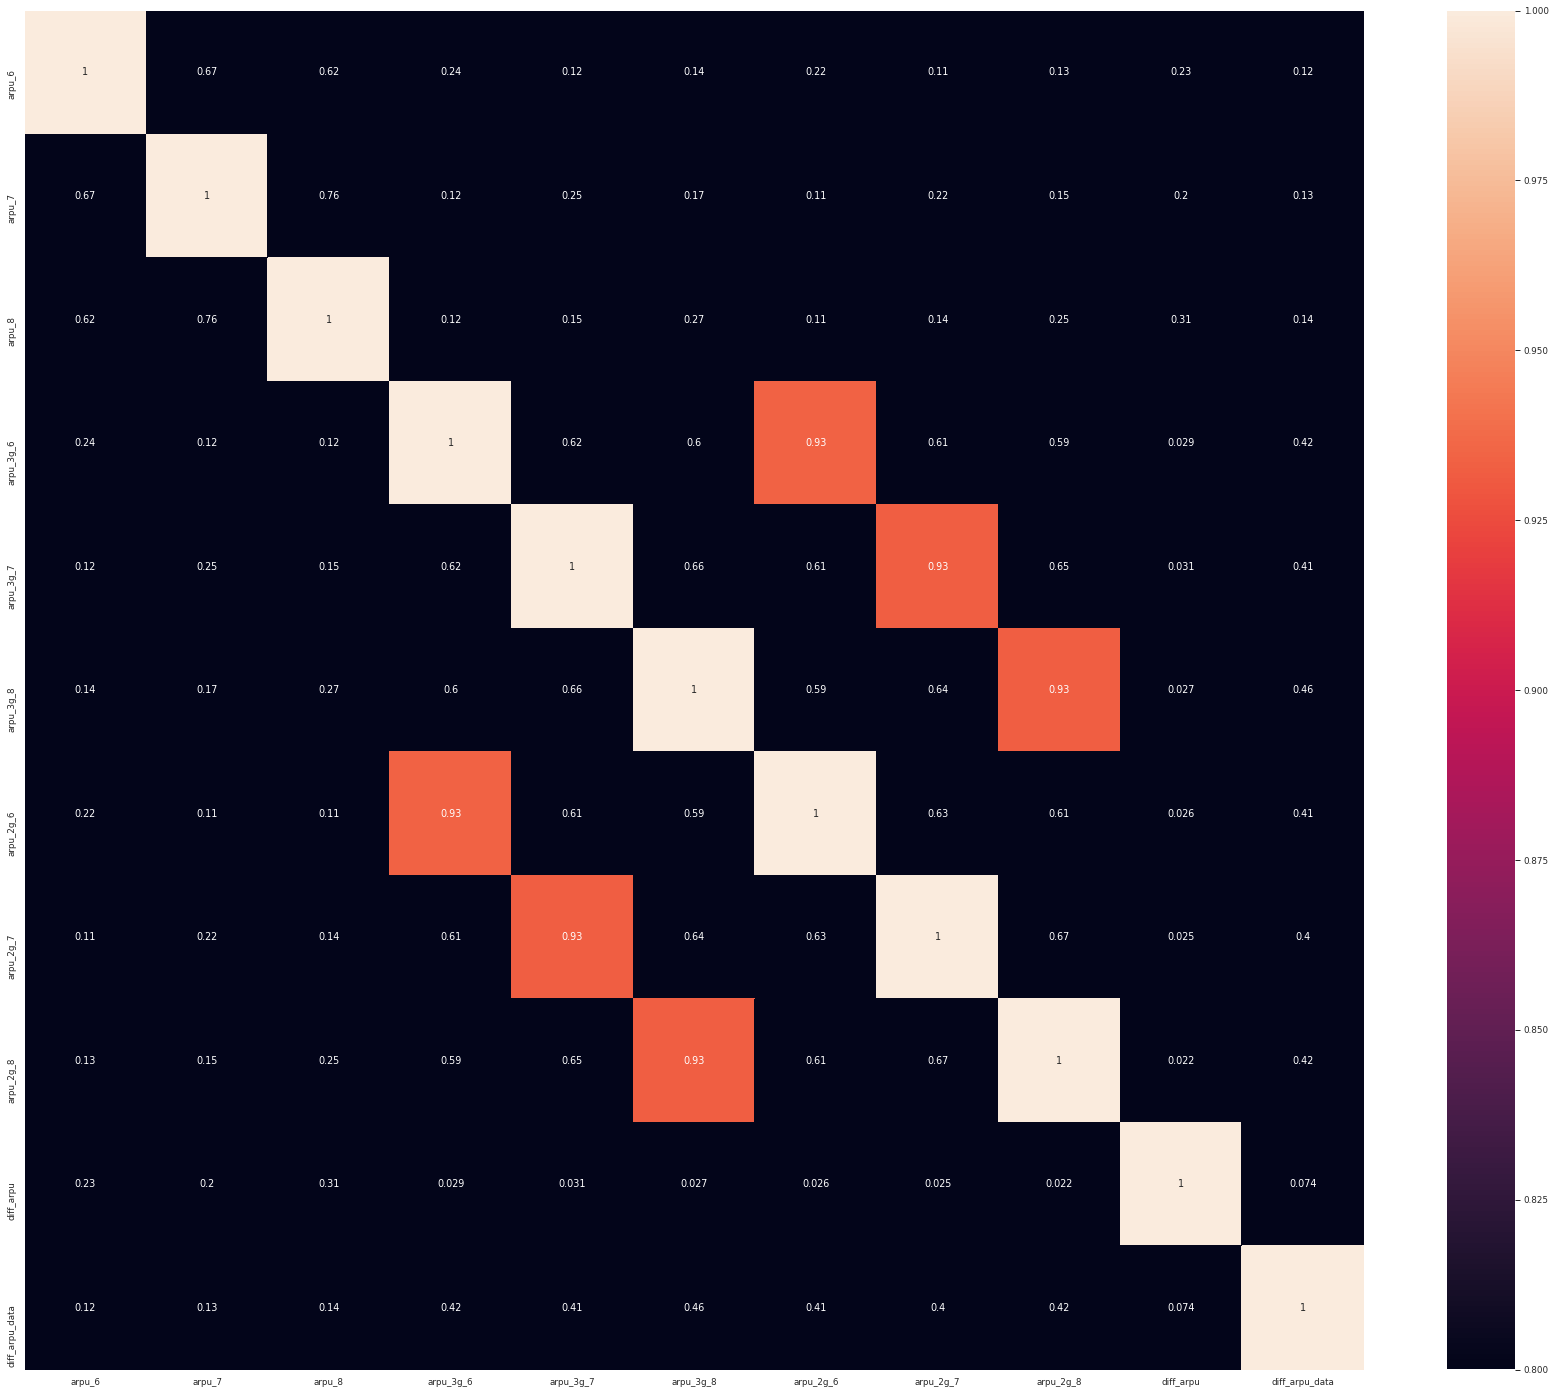

In [119]:
arpu_features = high_valued_customers.columns.to_series().filter(regex='arpu')
heatmap(arpu_features)

#### Getting Highly Correlated features

In [120]:
get_strong_correlated(arpu_features, 0.85)

level_0    level_1      0
0  arpu_2g_6  arpu_3g_6 0.9339
1  arpu_3g_6  arpu_2g_6 0.9339
2  arpu_2g_7  arpu_3g_7 0.9323
3  arpu_3g_7  arpu_2g_7 0.9323
4  arpu_2g_8  arpu_3g_8 0.9323
5  arpu_3g_8  arpu_2g_8 0.9323

> Arbitrary, keeping one of KPI: `arpu_2g` or `arpu_3g`

#### Removing Correlated Features

In [121]:
high_valued_customers = high_valued_customers.drop([ "arpu_2g_6","arpu_2g_7","arpu_2g_8"], axis=1)

## Data Preparation for Modeling

### Encoding Categorical Features

In [122]:
cat_features = high_valued_customers.select_dtypes(include=['category', 'object']).columns.drop("churn")
Markdown("__There are `{features_count}` features to be encoded__: <br> {features}".format(features_count=len(cat_features), features='<br>'.join(cat_features)))

__There are `11` features to be encoded__: <br> night_pck_user_6<br>night_pck_user_7<br>night_pck_user_8<br>fb_user_6<br>fb_user_7<br>fb_user_8<br>voice_call_usage_type_6<br>voice_call_usage_type_7<br>voice_call_usage_type_8<br>good_phase_avg_rech_type<br>action_phase_rech_type

#### Number Convertible 
Some of features already containing numbers as values; just their type need to be converted

In [123]:
number_converitable_features= (get_kpi_attributes_names('night_pck_user') + get_kpi_attributes_names('fb_user') + ['churn'])

# int type 
high_valued_customers[number_converitable_features] = high_valued_customers[number_converitable_features].astype(np.int)

#### Dummy Encoding

In [124]:
# recipe to encode categorial (not ordianal) attributes
def dummy_encode(columns):
    effective_df = high_valued_customers
    
    # list of new columns
    dummies_columns = [];
    for column in columns: 
        dummies = pd.get_dummies(high_valued_customers[column], prefix=column).iloc[:, :-1]
        dummies_columns = dummies_columns + dummies.columns.tolist()
    
        # effective_df = effective_df + new columns
        effective_df = pd.concat([effective_df.drop(column, axis=1), dummies], axis=1)
    return effective_df, dummies_columns

In [125]:
dummy_encodeable_features = get_kpi_attributes_names('voice_call_usage_type') + ['good_phase_avg_rech_type', 'action_phase_rech_type']
high_valued_customers, dummies_features = dummy_encode(dummy_encodeable_features)

In [126]:
high_valued_customers.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.3850  214.8160  213.8030  88.0600      86.8850      0.0000         
7  1069.1800 1349.8500 3171.4800 57.8400      54.6800      52.2900        
8  378.7210  492.2230  137.3620  413.6900     351.0300     35.0800        
21 514.4530  597.7530  637.7600  102.4100     132.1100     85.1400        
23 74.3500   193.8970  366.9660  48.9600      50.6600      33.5800        

    offnet_mou_6  offnet_mou_7  offnet_mou_8  loc_og_t2t_mou_6  \
0  229.6350      227.1200      0.0000        25.5800             
7  453.4300      567.1600      325.9100      51.3900             
8  94.6600       80.6300       136.4800      297.1300            
21 757.9300      896.6800      983.3900      4.4800              
23 85.4100       89.3600       205.8900      48.9600             

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0  25.7800           0.0000            80.2400           81.6850             
7  31.3800           40.2800           308.6300          447.3800            
8  217.5900          12.4900           80.9600           70.5800             
21 6.1600            23.3400           91.8100           87.9300             
23 50.6600           33.5800           82.9400           83.0100             

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0  0.0000            0.1100            0.2100            0.0000              
7  162.2800          62.1300           55.1400           53.2300             
8  50.5400           0.0000            0.0000            0.0000              
21 104.8100          0.7500            0.0000            1.5800              
23 148.5600          0.0000            0.0000            0.0000              

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0  129.3500      132.7300      0.0000        3.3600              
7  422.1600      533.9100      255.7900      4.3000              
8  378.0900      288.1800      63.0400       116.5600            
21 97.0400       94.0900       129.7400      97.9300             
23 131.9100      133.6800      182.1400      0.0000              

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0  3.3000            0.0000            18.1850           17.7500             
7  23.2900           12.0100           49.8900           31.7600             
8  133.4300          22.5800           13.6900           10.0400             
21 125.9400          61.7900           665.3600          808.7400            
23 0.0000            0.0000            2.3600            6.3500              

    std_og_t2m_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  spl_og_mou_6  \
0  0.0000            50.7950       50.0350       0.0000        0.3100          
7  49.1400           60.8600       75.1400       77.8400       4.5000          
8  75.6900           130.2600      143.4800      98.2800       0.0000          
21 876.9900          763.2900      934.6900      938.7900      0.0000          
23 39.6100           2.3600        6.3500        39.6100       0.1000          

    spl_og_mou_7  spl_og_mou_8  total_og_mou_6  total_og_mou_7  \
0  0.8100        0.0000        0.0000          0.0000            
7  0.0000        6.5000        487.5300        609.2400          
8  0.0000        10.2300       508.3600        431.6600          
21 0.0000        0.0000        860.3400        1028.7900         
23 0.0000        17.7100       134.3800        140.0400          

    loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
0  26.0300           26.6600           0.1600            86.7600             
7  58.1400           32.2600           27.3100           217.5600            
8  23.8400           9.8400            0.3100            57.5800             
21 2.4800            10.1900           19.5400           118.2300            
23 20.7100           61.0400           76.6400           95.9100             

    loc

### Spliting the data
Spliting the data in 70%: Training Data and 30%: Test data in **stratified manner** (balance of ratio of churn).

> Needed for most of algorithms

In [127]:
from sklearn.model_selection import train_test_split
high_valued_customers_train, high_valued_customers_test, = train_test_split(high_valued_customers, stratify=high_valued_customers['churn'], 
                                                                            train_size=0.7, random_state=110)

In [128]:
Markdown('''
* The dataset size was `{dataset_size}`.
* The churn ration of dataset was `{dataset_churn_ration}`.
* The size of training set is `{train_size}`..
* The churn ration is `{train_churn_ratio}`.
* The size of test data is `{test_size}`.
* The churn ration is `{test_churn_ration}`.
'''.format(
            dataset_size = high_valued_customers.shape[0],
            dataset_churn_ration = '%.2f' % (high_valued_customers['churn'].mean()*100),
            train_size = high_valued_customers_train.shape[0],
            train_churn_ratio = '%.2f' % (high_valued_customers_train['churn'].mean()*100),
            test_size = high_valued_customers_test.shape[0],
            test_churn_ration = '%.2f' % (high_valued_customers_test['churn'].mean()*100)
))


* The dataset size was `29946`.
* The churn ration of dataset was `8.14`.
* The size of training set is `20962`..
* The churn ration is `8.14`.
* The size of test data is `8984`.
* The churn ration is `8.14`.


> With **Stratification**, churn ration has been *balanced* in training set and test set. 

In [129]:
y_train = high_valued_customers_train['churn']
X_train = high_valued_customers_train.drop('churn', axis=1)

y_test = high_valued_customers_test['churn']
X_test = high_valued_customers_test.drop('churn', axis=1)

### Scaling the data
using Standard Scaler

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[:])
X_train[:] = scaler.transform(X_train[:])
X_test[:] = scaler.transform(X_test[:])

## Data Modeling

1. Without PCA:
    a. Logistic Regression
    b. Decision Tree Classifier
    c. Random Forest Classifier
    d. XGB Classifier
    e. Compare of Performance of Models Produced
2. With PCA:
    a. Logistic Regression
    b. Decision Tree Classifier
    c. Random Forest Classifier
    d. XGB Classifier
    e. Compare of Performance of Models Produced
    
> Goal: We want to reduce business loss by reducing `False Negative` keeping `False Positive` in mind.
    
| Classes                                    |               |
|--------------------------------------------|---------------|
| Actual Churn, Predicted Churn (TP)         | -             |
| Actual Churn, Predicted Non Churn (FN)     | Business Loss |
| Actual Non Churn, Predicted Churn (FP)     | -             |
| Actual Non Churn, Predicted Non Churn (TN) | -             |

### Deciding the Class Weight
Class weight would be used in learning algorithms to balance the churn classes

In [131]:
## Helper recipes

# recipe to plot confusion_matrix with normalized matrix & report
def plot_confusion_matrix(y, y_pred, title=None):
    
    fig = plt.figure(figsize=(15, 5))
    if title:
        fig.suptitle(title, fontsize=15)
    
    # confusion matrix
    cfn_matrix = confusion_matrix(y, y_pred)
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True, fmt="d", ax=plt.subplot(1,2,1))
    plt.title('Confusion Matrix', fontsize=12)
    plt.ylabel('Actual Churn')
    plt.xlabel('Predicted Churn')
    
    
    # normalize confusion matrix
    y_non_churn = (y_test == 0).sum()
    y_churn = (y_test == 1).sum()

    cfn_norm_matrix = np.array([[1.0 / y_non_churn, 1.0/y_non_churn], [1.0/y_churn, 1.0/ y_churn]])
    norm_cfn_matrix = cfn_matrix * cfn_norm_matrix

    sns.heatmap(norm_cfn_matrix,cmap='coolwarm_r',linewidths=0.5, annot=True, ax=plt.subplot(1,2,2))
    plt.title("Normalize Matrix", fontsize=12)
    plt.ylabel('Actual Churn')
    plt.xlabel('Predicted Churn')
    plt.show()
    
    # print classification report
    display(pd.DataFrame(classification_report(y,y_pred, output_dict=True)))

In [132]:
# recipe to plot roc curve
def plot_roc_curve(y, y_pred_prob, ax=None, color=None, label=None):
    fpr, tpr, _ = roc_curve(y, y_pred_prob)
    plt.xlabel('False Postive Rate', fontsize=12)
    plt.ylabel('True Postive Rate', fontsize=12)
    plt.title('ROC Curve', fontsize=15)
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    if ax:
        return ax.plot(fpr, tpr, label=label, color=color, linewidth=2)
    return plt.plot(fpr, tpr, label=label, color=color, linewidth=2)
    
# recipe to plot pr curve
def plot_pr_curve(y, y_pred_prob, ax=None, color=None, label=None):
    p,r,_ = precision_recall_curve(y_test, y_pred_prob)
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title('PR Curve', fontsize=15)
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    if ax:
        return ax.plot(r, p, label=label, color=color, linewidth=2)
    return plt.plot(r, p, label=label, color=color, linewidth=2)
    

# recipe to plot ROC & PR Curve
def plot_curves(y, y_pred_prob):
    fig = plt.figure(figsize=(15,6))
    fig.add_subplot(1,2,1)
    plot_pr_curve(y, y_pred_prob)
    fig.add_subplot(1,2,2)
    plot_roc_curve(y, y_pred_prob)
    plt.show()

#### Taking multiple weight into consideration 
Checking for Models performance taking multiple weight: `1`, `5`, `11`, `13`, `25`, `50` of class churn into consideration

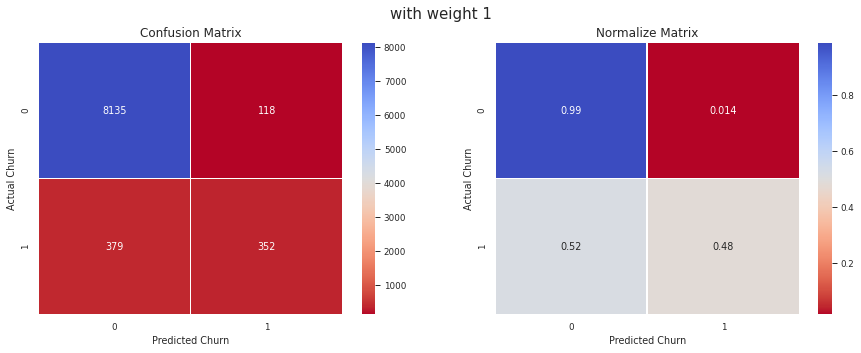

0        1  accuracy  macro avg  weighted avg
precision 0.9555    0.7489   0.9447    0.8522     0.9387       
recall    0.9857    0.4815   0.9447    0.7336     0.9447       
f1-score  0.9704    0.5862   0.9447    0.7783     0.9391       
support   8253.0000 731.0000 0.9447    8984.0000  8984.0000

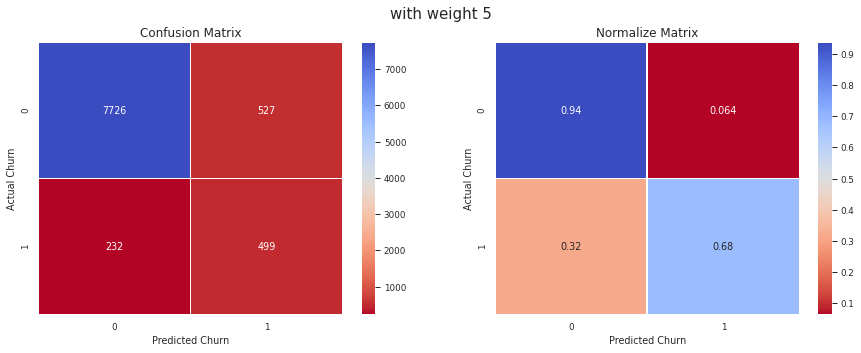

0        1  accuracy  macro avg  weighted avg
precision 0.9708    0.4864   0.9155    0.7286     0.9314       
recall    0.9361    0.6826   0.9155    0.8094     0.9155       
f1-score  0.9532    0.5680   0.9155    0.7606     0.9218       
support   8253.0000 731.0000 0.9155    8984.0000  8984.0000

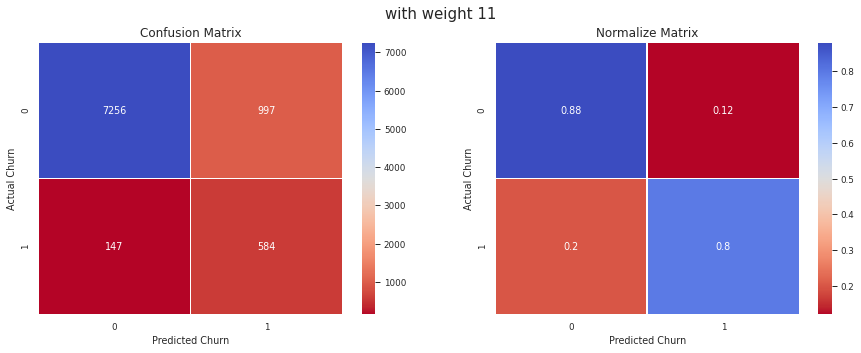

0        1  accuracy  macro avg  weighted avg
precision 0.9801    0.3694   0.8727    0.6748     0.9304       
recall    0.8792    0.7989   0.8727    0.8391     0.8727       
f1-score  0.9269    0.5052   0.8727    0.7161     0.8926       
support   8253.0000 731.0000 0.8727    8984.0000  8984.0000

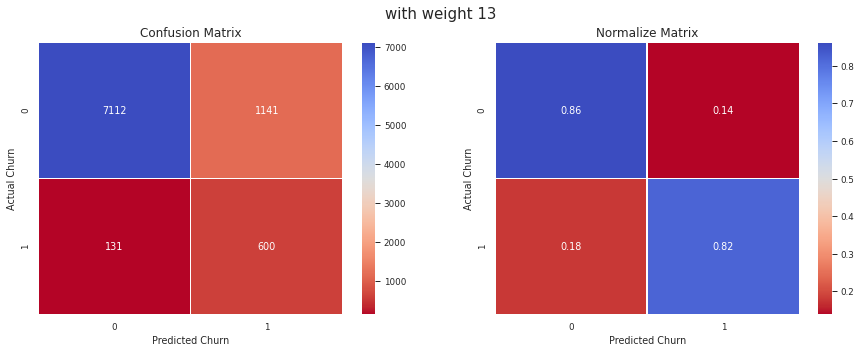

0        1  accuracy  macro avg  weighted avg
precision 0.9819    0.3446   0.8584    0.6633     0.9301       
recall    0.8617    0.8208   0.8584    0.8413     0.8584       
f1-score  0.9179    0.4854   0.8584    0.7017     0.8827       
support   8253.0000 731.0000 0.8584    8984.0000  8984.0000

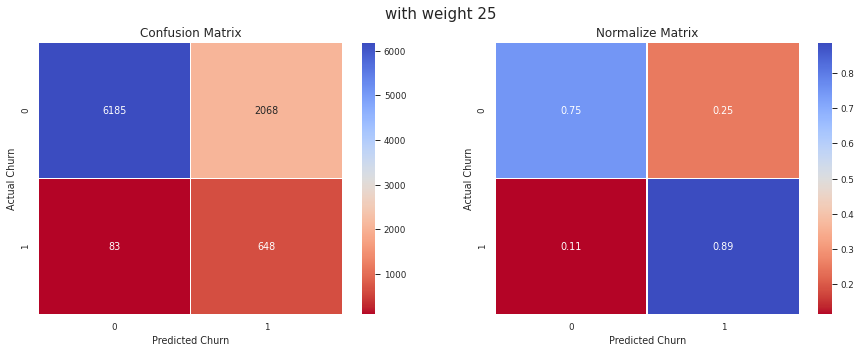

0        1  accuracy  macro avg  weighted avg
precision 0.9868    0.2386   0.7606    0.6127     0.9259       
recall    0.7494    0.8865   0.7606    0.8179     0.7606       
f1-score  0.8519    0.3760   0.7606    0.6139     0.8131       
support   8253.0000 731.0000 0.7606    8984.0000  8984.0000

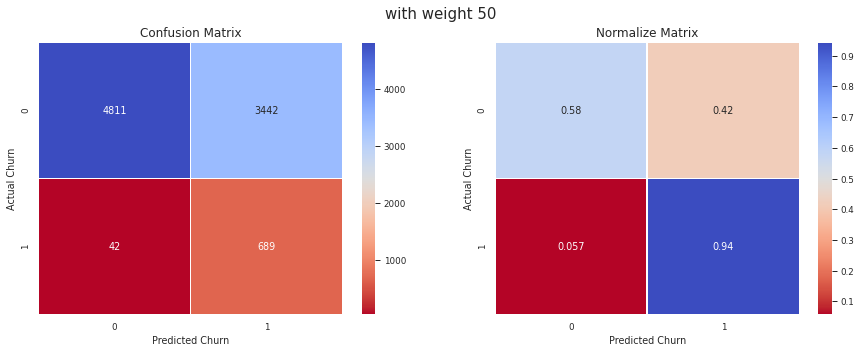

0        1  accuracy  macro avg  weighted avg
precision 0.9913    0.1668   0.6122    0.5791     0.9243       
recall    0.5829    0.9425   0.6122    0.7627     0.6122       
f1-score  0.7342    0.2834   0.6122    0.5088     0.6975       
support   8253.0000 731.0000 0.6122    8984.0000  8984.0000

In [133]:
from sklearn.linear_model import LogisticRegression

weights = [1,5,11,13,25, 50]

for weight in weights:
    lr = LogisticRegression(class_weight={0:1,1:weight}, C=0.02, penalty='l1',random_state=100, solver='saga')
    lr.fit(X_train,y_train)
    y_test_pred = lr.predict(X_test)
    title = "with weight {} ".format(weight)
    plot_confusion_matrix(y_test, y_test_pred, title)

#### PR Curve and ROC comparison

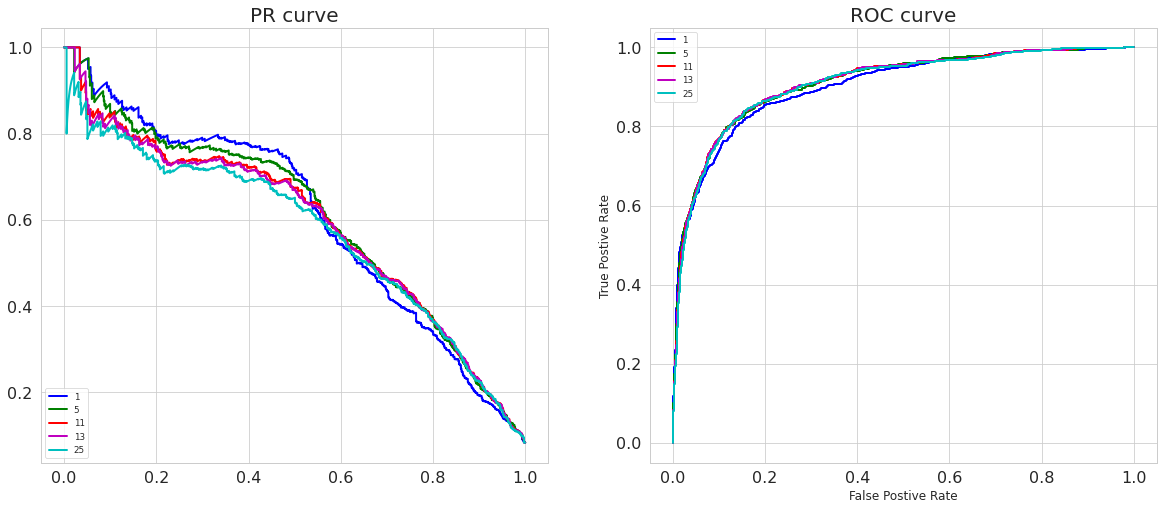

In [134]:
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

for weight,color in zip(weights,'bgrmc'):
    lr = LogisticRegression(class_weight={0:1,1:weight}, C=0.02, penalty='l1',random_state=100, solver='saga')
    lr.fit(X_train,y_train)
    y_test_prob = lr.predict_proba(X_test)[:,1]
    
    plot_pr_curve(y_test, y_test_prob, ax=ax1, color=color, label=weight)
    plot_roc_curve(y_test, y_test_prob, ax=ax2, color=color, label=weight)


# title 
ax1.title.set_text('PR curve')
ax2.title.set_text('ROC curve')

ax2.title.set_size(20)
ax1.title.set_size(20)

# position
ax1.legend(loc='lower left')
ax2.legend(loc='top left')

# ticks
ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)

plt.show()

>Class_weight of `11` and `13` are performing well

In [105]:
from sklearn.utils.class_weight import compute_class_weight
class_weight = compute_class_weight('balanced', [0,1], y_train)

Markdown('The weight `{}` is calculated by sklearn'.format('%.2i' % (class_weight[1]/class_weight[0])))

The weight `11` is calculated by sklearn

### 1. Modeling without PCA
#### 1.a Using Logistic Regression
With  `l1` Lasso  penalty and using weight `13`

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

##### Hypertuning

In [107]:
# using grid search for tuning lambda of Lasso

param_grid= {'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.025, 0.08, 0.09]}
stratified_kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=500)

# base regressor: since we want to select top features L1=Lasso is chosen with solver saga
logistic_regressor = LogisticRegression(class_weight={0:1, 1:13}, penalty='l1',random_state=100, solver='saga')

lr_cv = GridSearchCV(logistic_regressor, param_grid, cv=stratified_kfold, scoring= 'f1', return_train_score=True, n_jobs=-1, verbose=1)
lr_cv.fit(X_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:  1.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=500, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight={0: 1, 1: 13},
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=100, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.025, 0.08,
                               0.09]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=1)

##### Plotting Learning Curve

In [108]:
def plot_learning_curve(cv_result):
    cv_result['param_alpha'] = cv_result['param_C'].astype(np.number)
    plt.figure(figsize=(7,7))
    plt.suptitle('Learning Curve')
    plt.plot(cv_result['param_C'], cv_result['mean_train_score'])
    plt.plot(cv_result['param_C'], cv_result['mean_test_score'])
    
    plt.xlabel('L1 Penality (\u03bb)')
    plt.ylabel('F1 Score')
    plt.title("L1 Penality (\u03bb) vs. F1 Score")
    plt.legend(['train score', 'test score'], loc='upper right')
    plt.show()

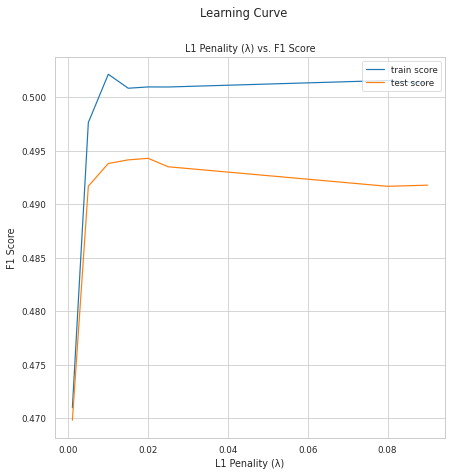

The _best value_ of alpha/C is `0.0200`

In [109]:
plot_learning_curve(lr_cv.cv_results_)
Markdown('''The _best value_ of alpha/C is `{C}`'''.format(C='%.4f' % lr_cv.best_params_['C']))

In [110]:
logistic_regressor = lr_cv.best_estimator_

##### Features Filtering and Selection
Selecting top 20 features ordered by magnitude of coef

In [111]:
features_coef = pd.DataFrame({'features': X_train.columns, 'coef':logistic_regressor.coef_[0]})

# selecting top features
features_coef = features_coef[features_coef['coef'].abs() > 0.0001]

# reordering by order of magnitude of features
features_coef = features_coef.reindex(features_coef['coef'].abs().sort_values(ascending = False).index)

# get top 20 features
features_coef[:20]

features    coef
147  voice_call_usage_type_8_Active_all -0.7194
94   last_rech                          0.5047 
146  voice_call_usage_type_8_Active_OG  -0.4579
67   last_day_rch_amt_8                 -0.4223
46   loc_ic_mou_8                       -0.4156
64   max_rech_amt_8                     0.3720 
40   loc_ic_t2m_mou_8                   -0.3324
37   loc_ic_t2t_mou_8                   -0.2654
20   loc_og_mou_8                       -0.2253
39   loc_ic_t2m_mou_7                   0.2233 
73   max_rech_data_8                    -0.2229
26   std_og_t2m_mou_8                   -0.2188
88   fb_user_8                          -0.2188
92   data_rech_8                        -0.2042
89   aon                                -0.1926
152  action_phase_rech_type_low         0.1903 
43   loc_ic_t2f_mou_8                   -0.1798
49   std_ic_t2t_mou_8                   -0.1776
45   loc_ic_mou_7                       0.1730 
14   loc_og_t2m_mou_8                   -0.1610

##### Model Evaluation

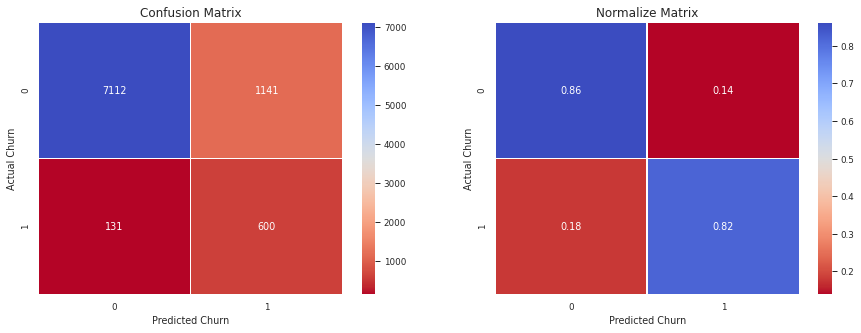

0        1  accuracy  macro avg  weighted avg
precision 0.9819    0.3446   0.8584    0.6633     0.9301       
recall    0.8617    0.8208   0.8584    0.8413     0.8584       
f1-score  0.9179    0.4854   0.8584    0.7017     0.8827       
support   8253.0000 731.0000 0.8584    8984.0000  8984.0000

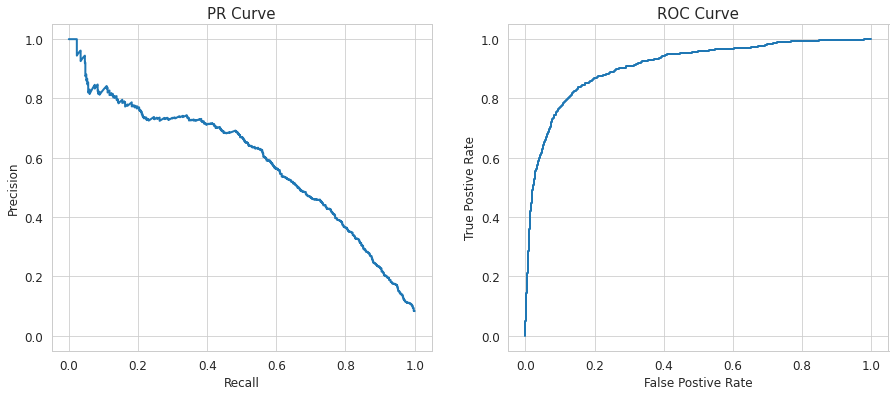

ROC/AUC score is `0.8413`

In [112]:
# confusion matrix
y_test_pred = logistic_regressor.predict(X_test)
plot_confusion_matrix(y_test, y_test_pred)

# roc & pr curve
y_test_prob = logistic_regressor.predict_proba(X_test)[:,1]
plot_curves(y_test, y_test_prob)

Markdown("ROC/AUC score is `{}`".format('%.4f' % roc_auc_score(y_test, y_test_pred)))

#### 1.b Using Decision Tree

In [113]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

##### Hypertuning

In [114]:
param_grid = {'max_depth': [6,8,10,15], 
              'min_samples_split':[25, 50, 75, 100],  
              'min_samples_leaf': [25, 50, 100],
              'criterion': ['gini', 'entropy'],
              'class_weight':['balanced', {0:1, 1:13}]
             }

stratified_kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=500)

# base model
decision_tree = DecisionTreeClassifier(max_features='auto', random_state=200)
dt_cv = GridSearchCV(decision_tree, param_grid, cv=stratified_kfold, scoring= 'f1', return_train_score=True, n_jobs = -1, verbose = 1)
dt_cv.fit(X_train, y_train)

Fitting 4 folds for each of 192 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed:   48.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=500, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=200,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
        

In [115]:
dt_cv.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 25,
 'min_samples_split': 25}

In [116]:
decision_tree = dt_cv.best_estimator_

##### Model Evaluation

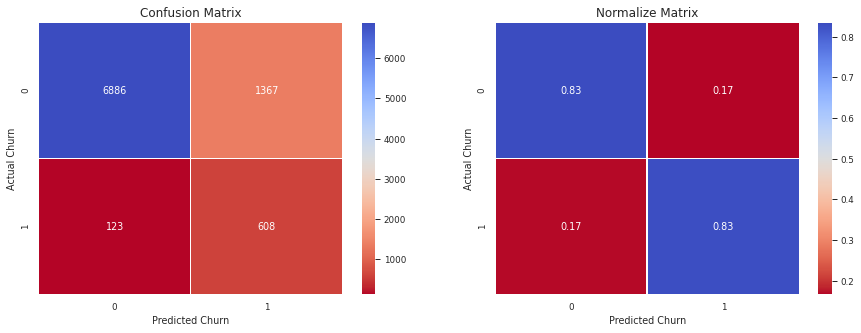

0        1  accuracy  macro avg  weighted avg
precision 0.9825    0.3078   0.8341    0.6451     0.9276       
recall    0.8344    0.8317   0.8341    0.8331     0.8341       
f1-score  0.9024    0.4494   0.8341    0.6759     0.8655       
support   8253.0000 731.0000 0.8341    8984.0000  8984.0000

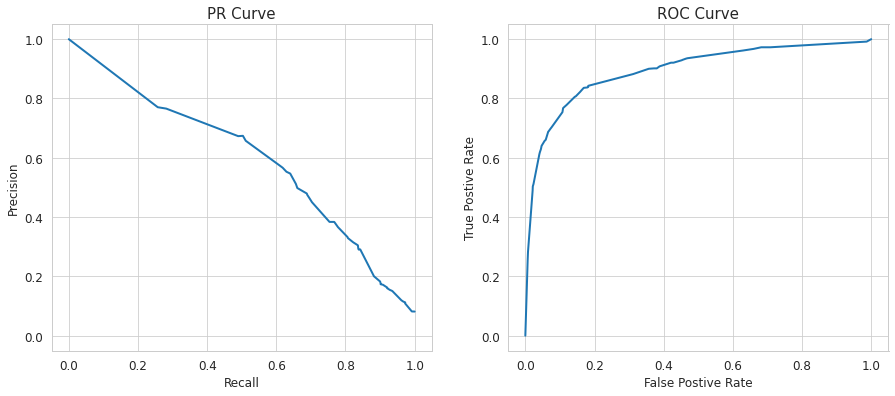

ROC/AUC score is `0.8331`

In [117]:
# confusion matrix
y_test_pred = decision_tree.predict(X_test)
plot_confusion_matrix(y_test, y_test_pred)

# roc & pr curve
y_test_prob = decision_tree.predict_proba(X_test)[:,1]
plot_curves(y_test, y_test_prob)

Markdown("ROC/AUC score is `{}`".format('%.4f' % roc_auc_score(y_test, y_test_pred)))

##### Tree Visualization

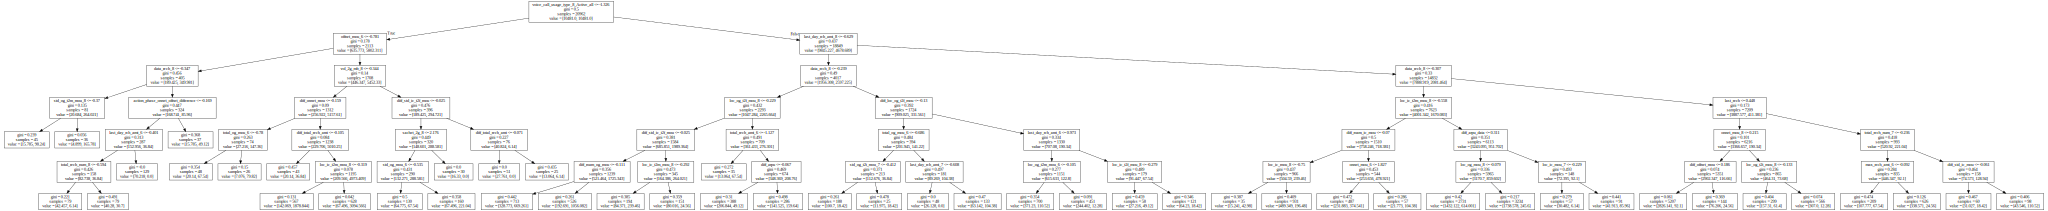

In [118]:
import graphviz 
dot_data = export_graphviz(decision_tree, 
                           feature_names=X_train.columns,  
                           out_file=None) 
graph = graphviz.Source(dot_data) 
graph

#### 1.c Using Random Forest Tree

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [136]:
rf_cv= None

##### Hypertuning

In [140]:
param_grid = {'max_depth': [6, 8,12, 15], 
              'min_samples_split':[100, 150, 200],  
              'min_samples_leaf': [80, 120, 150, 200],
              'n_estimators': [100, 200, 300],
              'class_weight':['balanced', {0:1,1:13}]
             }

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=500)
random_forest = RandomForestClassifier(random_state=300,  max_features='auto')

# using random search instead of grid (exhaustive search) for better performance
rf_cv = RandomizedSearchCV(random_forest, 
                           param_grid, 
                           n_iter = 25, 
                           cv=stratified_kfold, 
                           scoring= 'f1', 
                           return_train_score=True, 
                           n_jobs=-1, 
                           verbose =1, 
                           random_state= 200)
rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  4.7min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=500, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_spli...
                     

In [141]:
# recipe to get best value Value in case cv is taking so much time
def get_best_value(cv, field, default_value=None):
    try:
        return cv.best_params_[field]
    except:
        return default_value

In [142]:
max_depth = get_best_value(rf_cv, 'max_depth', 8)
min_samples_leaf = get_best_value(rf_cv, 'min_samples_leaf', 150)
min_samples_split = get_best_value(rf_cv, 'min_samples_split', 100)
n_estimators = get_best_value(rf_cv, 'n_estimators', 300)
class_weight_best = get_best_value(rf_cv, 'class_weight', 'balanced')

In [143]:
Markdown("**The best value of params are:** <br> max_depth=`{}`, min_sample_leaf=`{}`, min_samples_split=`{}`,  n_estimators=`{}`,  class_weight=`{}`".format(max_depth, min_samples_leaf, min_samples_split, n_estimators, class_weight_best))

**The best value of params are:** <br> max_depth=`15`, min_sample_leaf=`80`, min_samples_split=`100`,  n_estimators=`200`,  class_weight=`balanced`

##### Refit

In [144]:
random_forest = RandomForestClassifier(n_estimators = n_estimators,
                                       max_depth = max_depth,
                                       min_samples_leaf = min_samples_leaf,
                                       min_samples_split = min_samples_split,
                                       class_weight = class_weight_best, 
                                       max_features = 'auto',
                                       random_state = 300)

random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=80, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=300,
                       verbose=0, warm_start=False)

##### Model Evaluation

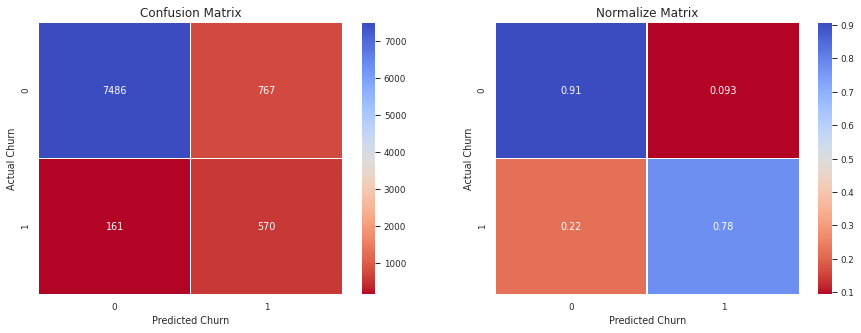

0        1  accuracy  macro avg  weighted avg
precision 0.9789    0.4263   0.8967    0.7026     0.9340       
recall    0.9071    0.7798   0.8967    0.8434     0.8967       
f1-score  0.9416    0.5513   0.8967    0.7464     0.9099       
support   8253.0000 731.0000 0.8967    8984.0000  8984.0000

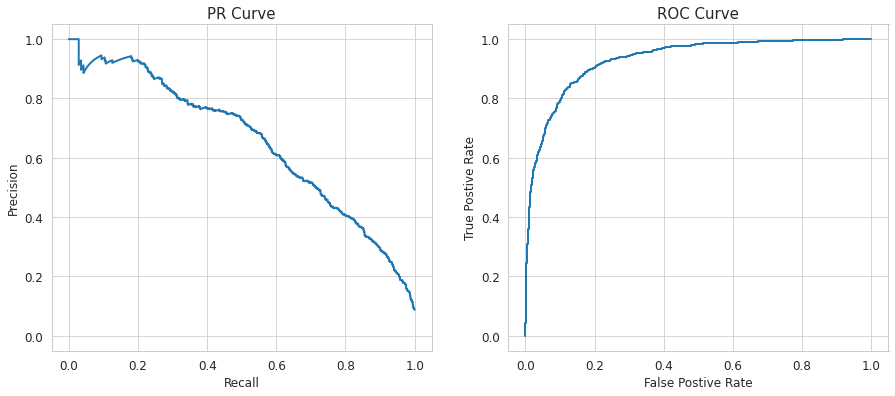

ROC/AUC score is `0.8434`

In [145]:
# confusion matrix
y_test_pred = random_forest.predict(X_test)
plot_confusion_matrix(y_test, y_test_pred)

# roc & pr curve
y_test_prob = random_forest.predict_proba(X_test)[:,1]
plot_curves(y_test, y_test_prob)

Markdown("ROC/AUC score is `{}`".format('%.4f' % roc_auc_score(y_test, y_test_pred)))

##### Selecting features
Selecting top 20 features ordered by importance defined by Random Forest

In [146]:
rf_feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                    index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)


# sorted by importance
rf_feature_importances[:20]

importance
voice_call_usage_type_8_Active_all 0.0753     
last_day_rch_amt_8                 0.0642     
total_rech_amt_8                   0.0559     
loc_ic_mou_8                       0.0482     
arpu_8                             0.0453     
action_phase_rech_type_low         0.0415     
last_rech                          0.0381     
loc_ic_t2m_mou_8                   0.0373     
max_rech_amt_8                     0.0363     
loc_og_mou_8                       0.0285     
data_rech_8                        0.0272     
loc_ic_t2t_mou_8                   0.0252     
last_rech_data                     0.0233     
loc_og_t2m_mou_8                   0.0209     
diff_roam_og_mou                   0.0203     
max_rech_data_8                    0.0201     
loc_og_t2t_mou_8                   0.0193     
diff_total_rech_amt                0.0177     
fb_user_8                          0.0175     
diff_arpu                          0.0165

#### 1.d Using XGB

In [128]:
from xgboost import XGBClassifier

In [129]:
xgb_cv = None

##### Hypertuning

In [130]:
default_class_weight = y_train.value_counts()[0]/y_train.value_counts()[1]

param_grid = {
                'colsample_bylevel':[0.1, 0.2, 0.5, 1.0],
                'learning_rate': [0.1, 0.2, 0.5],
                'reg_alpha': [0.5, 0.7, 0.9],
                'n_estimators': [100, 150, 200],
                'scale_pos_weight':[default_class_weight, 13]
             }     
   

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=500)
xgb = XGBClassifier(n_jobs=-1)
xgb_cv = RandomizedSearchCV(xgb,
                        
                        param_grid, 
                        n_iter= 20,
                        scoring= 'f1',
                        cv = stratified_kfold, 
                        n_jobs = -1,
                        verbose = 1,
                        random_state= 200,
                        return_train_score=True) 
xgb_cv.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.8min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=500, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_c...
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='deprecated', n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bylevel'

In [131]:
n_estimators = get_best_value(xgb_cv, 'n_estimators', 150)
learning_rate = get_best_value(xgb_cv, 'max_depth', .2)
reg_alpha = get_best_value(xgb_cv, 'reg_alpha', .9)
colsample_bylevel = get_best_value(xgb_cv, 'colsample_bylevel', 0.5)
scale_pos_weight = get_best_value(xgb_cv, 'scale_pos_weight', default_class_weight)

In [132]:
Markdown("**The best value of params are:** <br> n_estimators=`{}`, learning_rate=`{}`, reg_alpha=`{}`, colsample_bylevel=`{}`, scale_pos_weight=`{}`.".format(n_estimators, learning_rate, reg_alpha, colsample_bylevel, scale_pos_weight))

**The best value of params are:** <br> n_estimators=`150`, learning_rate=`0.2`, reg_alpha=`0.9`, colsample_bylevel=`0.5`, scale_pos_weight=`11.280023432923258`.

In [133]:
xgb = XGBClassifier(scale_pos_weight = scale_pos_weight, 
                    colsample_bylevel = colsample_bylevel,
                    n_estimators = n_estimators, 
                    learning_rate = learning_rate, 
                    reg_alpha = reg_alpha,
                    n_jobs=-1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.9,
              reg_lambda=1, scale_pos_weight=11.280023432923258, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

##### Model Evaluation

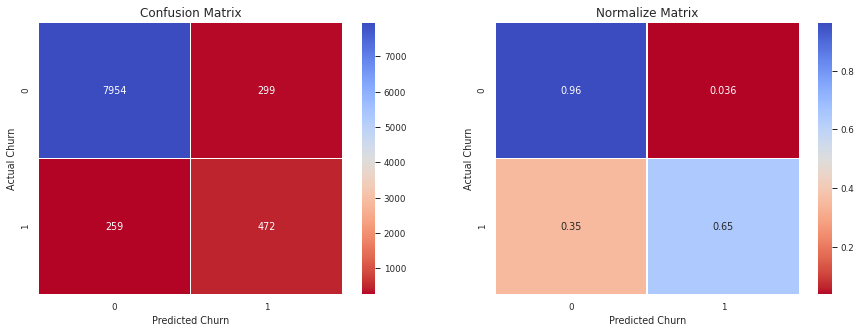

0        1  accuracy  macro avg  weighted avg
precision 0.9685    0.6122   0.9379    0.7903     0.9395       
recall    0.9638    0.6457   0.9379    0.8047     0.9379       
f1-score  0.9661    0.6285   0.9379    0.7973     0.9386       
support   8253.0000 731.0000 0.9379    8984.0000  8984.0000

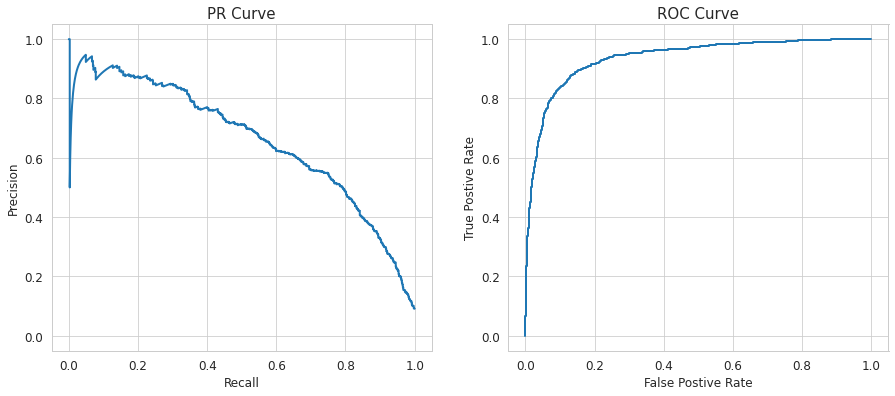

ROC/AUC score is `0.8047`.

In [134]:
# confusion matrix
y_test_pred = xgb.predict(X_test)
plot_confusion_matrix(y_test, y_test_pred)

# roc & pr curve
y_test_prob = xgb.predict_proba(X_test)[:,1]
plot_curves(y_test, y_test_prob)

Markdown("ROC/AUC score is `{}`.".format('%.4f' % roc_auc_score(y_test, y_test_pred)))

##### Selecting Features 

In [135]:
feature_importances = pd.DataFrame(xgb.feature_importances_,
                                    index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

# sorted by importance
feature_importances[:20]

importance
action_phase_rech_type_low         0.3367     
voice_call_usage_type_8_Active_all 0.1996     
last_day_rch_amt_8                 0.0315     
fb_user_8                          0.0231     
voice_call_usage_type_7_Active_all 0.0201     
max_rech_data_8                    0.0196     
data_rech_8                        0.0189     
voice_call_usage_type_8_Active_OG  0.0178     
loc_ic_mou_8                       0.0164     
last_rech                          0.0126     
total_rech_amt_8                   0.0103     
diff_roam_og_mou                   0.0093     
vol_2g_mb_8                        0.0065     
fb_user_7                          0.0062     
max_rech_amt_8                     0.0060     
loc_ic_t2m_mou_8                   0.0057     
last_rech_data                     0.0055     
loc_og_mou_8                       0.0051     
total_rech_num_7                   0.0045     
loc_ic_t2f_mou_8                   0.0044

#### 1.e Comparision of Models produced

In [136]:
import sklearn.metrics as m

# recipe to plot & print metrics of model produced by different alogs
def compare_models(alogs, X_test, y_test):
    
    fig=plt.figure(figsize=(15, 8))
    fig.suptitle('Model Performance Comparision', )
    
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    
    
    colors = iter(['b','r','y','m'])
    
    alogs_metrics = {}
    for algo in alogs:
        algo_name = algo.__class__.__name__

        color=next(colors)
        y_test_prob = algo.predict_proba(X_test)[:,1]
       
        # ploting curves
        plot_pr_curve(y_test, y_test_prob, ax=ax1, label=algo_name, color=color)
        plot_roc_curve(y_test, y_test_prob, ax=ax2, label=algo_name, color=color)
        
        # collecting metrics
        y_test_pred = algo.predict(X_test)
        
        metrics = {}
        metrics['accuracy'] = m.accuracy_score(y_test, y_test_pred)
        metrics['f1'] = m.f1_score(y_test, y_test_pred)
        metrics['recall'] = m.recall_score(y_test, y_test_pred)
        metrics['precision'] = m.precision_score(y_test, y_test_pred) 
        metrics['auc score'] = m.roc_auc_score(y_test, y_test_pred)
        
        alogs_metrics[algo.__class__.__name__] = metrics
        

    # title 
    ax1.title.set_text('PR curve')
    ax2.title.set_text('ROC curve')
    
    ax2.title.set_size(20)
    ax1.title.set_size(20)

    # position
    ax1.legend(loc='lower left')
    ax2.legend(loc='top left')

    # ticks
    ax1.tick_params(axis='both', which='major', labelsize=16)
    ax2.tick_params(axis='both', which='major', labelsize=16)


    display(pd.DataFrame(alogs_metrics).T.sort_values('auc score', ascending=False).style.highlight_max())
    

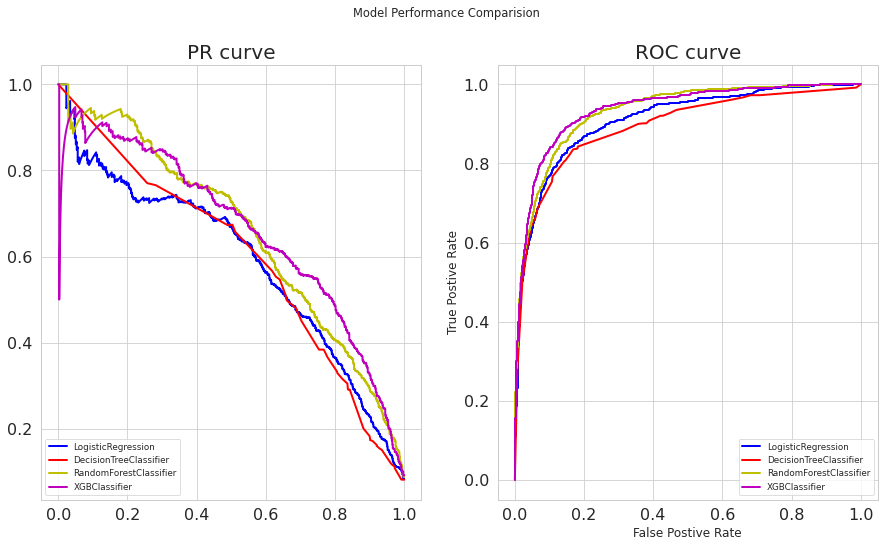

In [137]:
compare_models([logistic_regressor, decision_tree, random_forest, xgb ], X_test, y_test)

> Looking at the `ROC Curve` we can say that `Random Forest Classifier` is performing well for this classification tasks.

### 2. Reducing dimensions of data using PCA

In [138]:
from sklearn.decomposition import PCA
pca = PCA(random_state=123)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=123,
    svd_solver='auto', tol=0.0, whiten=False)

In [139]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# 95% variance explained by number of features
num_of_features = np.where(var_cumu >= 0.95)[0][0]

In [140]:
Markdown("`{}` features explains `95%` of variance.".format(num_of_features))

`83` features explains `95%` of variance.

#### Scree plot

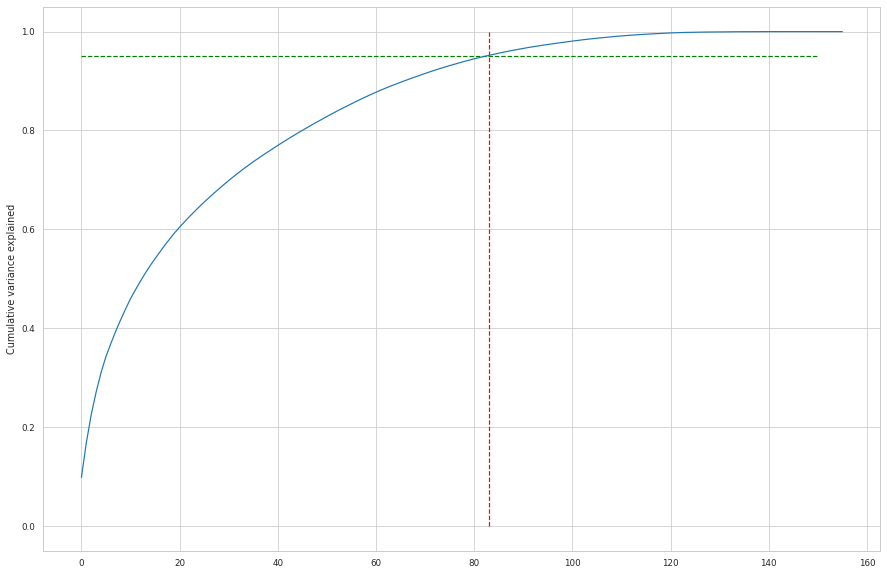

In [141]:
fig = plt.figure(figsize=[15,10])
plt.vlines(x=num_of_features, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Transforming / Reducing training and Test datasets

In [142]:
pca = PCA(n_components=num_of_features, random_state=123)
reduced_X_train = pca.fit_transform(X_train)
reduced_X_test = pca.transform(X_test)

In [143]:
Markdown("Size of Train data is `{}` and Size of Test dataset is `{}`.".format(reduced_X_train.shape, reduced_X_test.shape))

Size of Train data is `(20962, 83)` and Size of Test dataset is `(8984, 83)`.

#### Checking Correlation 

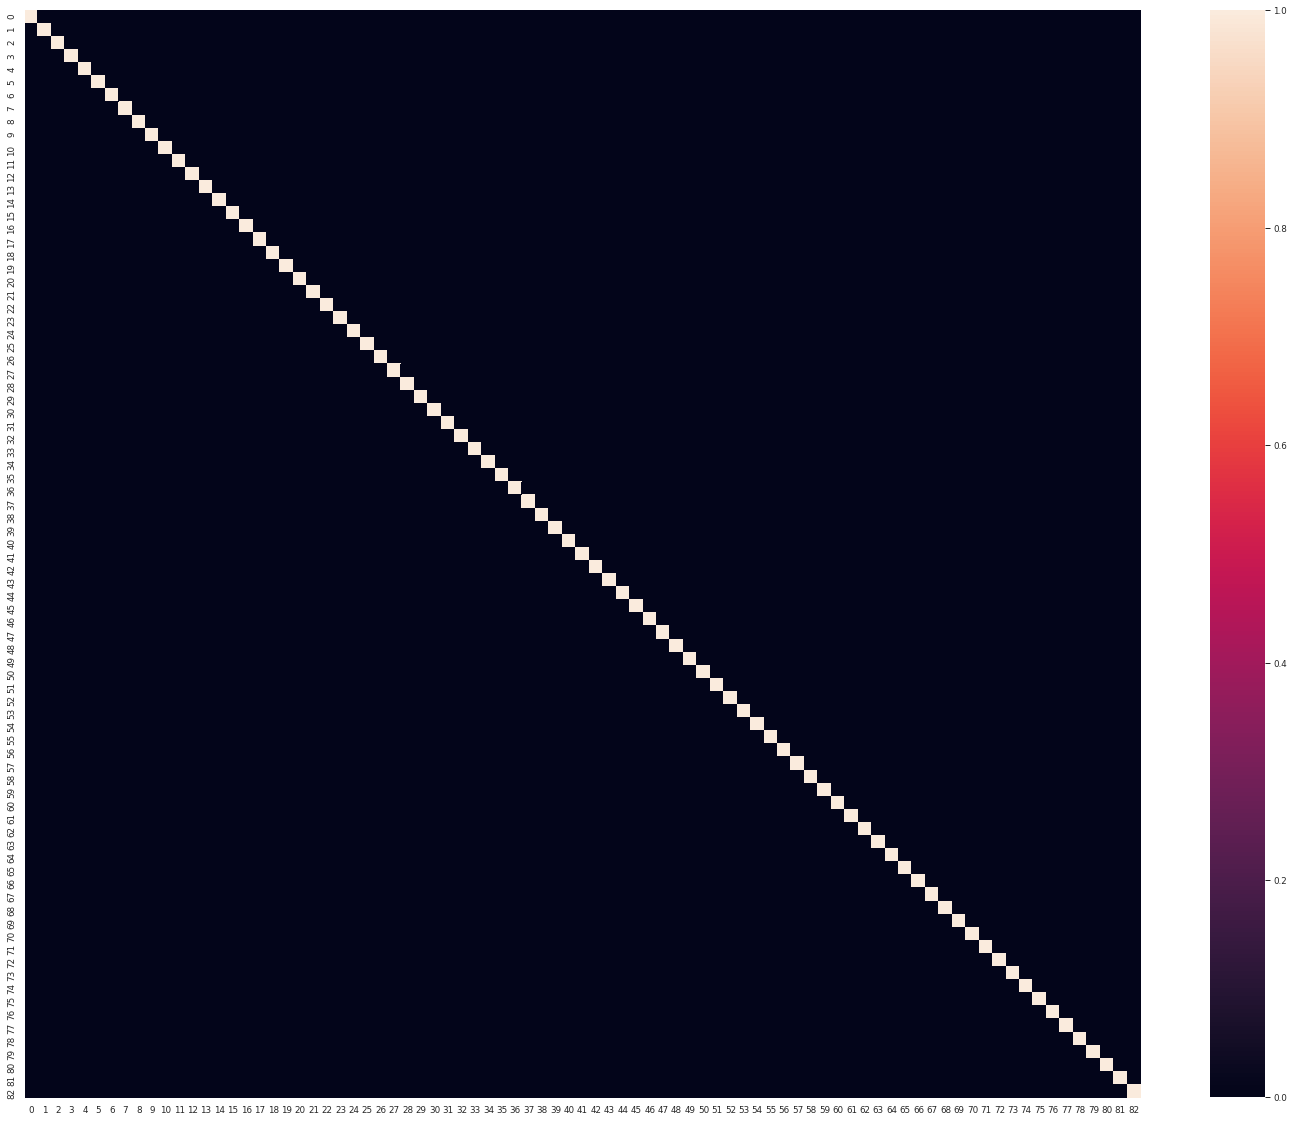

In [144]:
corrmat = np.corrcoef(reduced_X_train.transpose())
# Plotting the heatmap of the corr matrix
plt.figure(figsize=[25,20])
sns.heatmap(corrmat)
plt.show()

#### 2.a Using Logistic Regression

##### Hypertuning

In [145]:
stratified_kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=500)

param_grid= {
                'C': [ 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4 ], 
                'penalty': ['l1', 'elasticnet'],
                'class_weight':['balanced', {0:1, 1:13}]
            }

logistic_regressor_2 = LogisticRegression(random_state=100, solver='saga')

lr2_cv = GridSearchCV(logistic_regressor_2, param_grid, cv=stratified_kfold, scoring= 'f1', return_train_score=True, n_jobs=-1, verbose=1)
lr2_cv.fit(reduced_X_train, y_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:  1.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=500, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=100, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4],
                         'class_weight': ['balanced', {0: 1, 1: 13}],
                         'penalty': ['l1', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
     

In [146]:
lr2_cv.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1'}

In [147]:
logistic_regressor_2 = lr2_cv.best_estimator_

##### Model Evaluation

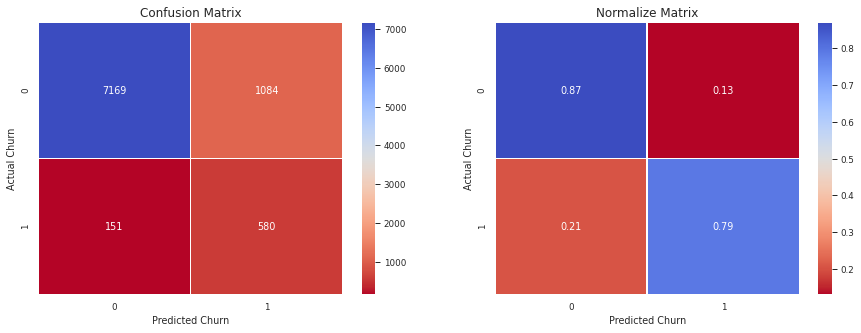

0        1  accuracy  macro avg  weighted avg
precision 0.9794    0.3486   0.8625    0.6640     0.9280       
recall    0.8687    0.7934   0.8625    0.8310     0.8625       
f1-score  0.9207    0.4843   0.8625    0.7025     0.8852       
support   8253.0000 731.0000 0.8625    8984.0000  8984.0000

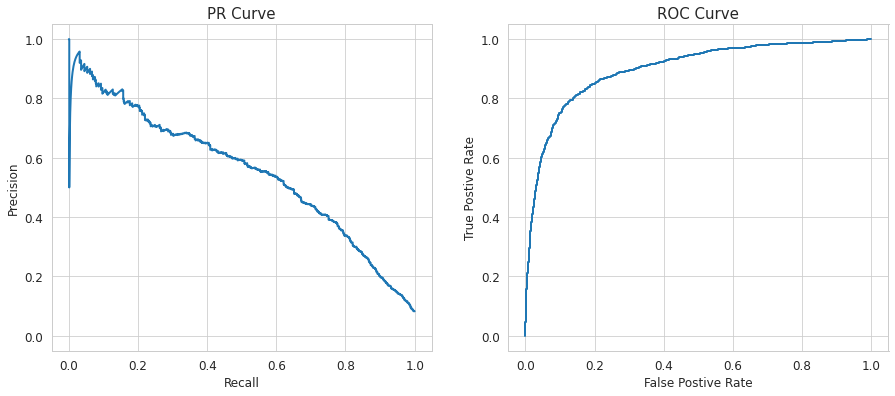

ROC/AUC score is `0.8310`.

In [148]:
# confusion matrix
y_test_pred = logistic_regressor_2.predict(reduced_X_test)
plot_confusion_matrix(y_test, y_test_pred)

# roc & pr curve
y_test_prob = logistic_regressor_2.predict_proba(reduced_X_test)[:,1]
plot_curves(y_test, y_test_prob)

Markdown("ROC/AUC score is `{}`.".format('%.4f' % roc_auc_score(y_test, y_test_pred)))

#### 2.b Using Decision Tree

##### Hypertuning

In [149]:
param_grid = {'max_depth': [4,6,8], 
              'min_samples_split':[80, 120, 150, 200],  
              'min_samples_leaf': [50, 100, 150],
              'criterion': ['gini', 'entropy'],
              'max_features':[20, 25, 30],
              'class_weight':['balanced', {0:1, 1:13}]
             }

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=500)

# base model
decision_tree_2 = DecisionTreeClassifier(random_state=200)
dt_cv = GridSearchCV(decision_tree, param_grid, cv=stratified_kfold, scoring= 'f1', return_train_score=True, n_jobs = -1, verbose = 1)
dt_cv.fit(reduced_X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:  3.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=500, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=6,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=25,
                                              min_samples_split=25,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=200,
                                              splitter='best'),

In [150]:
dt_cv.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 20,
 'min_samples_leaf': 50,
 'min_samples_split': 80}

In [151]:
decision_tree_2 = dt_cv.best_estimator_

##### Model Evaluation

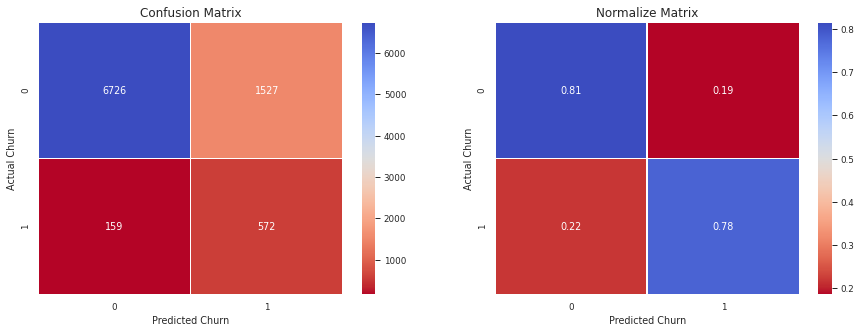

0        1  accuracy  macro avg  weighted avg
precision 0.9769    0.2725   0.8123    0.6247     0.9196       
recall    0.8150    0.7825   0.8123    0.7987     0.8123       
f1-score  0.8886    0.4042   0.8123    0.6464     0.8492       
support   8253.0000 731.0000 0.8123    8984.0000  8984.0000

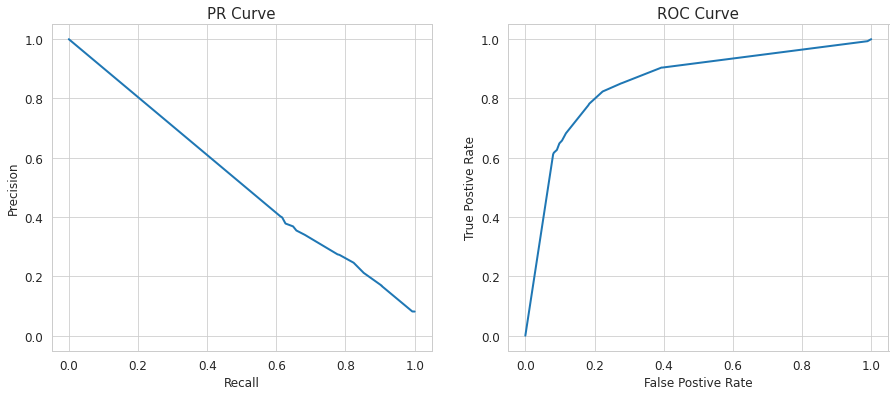

ROC/AUC score is `0.7987`.

In [152]:
# confusion matrix
y_test_pred = decision_tree_2.predict(reduced_X_test)
plot_confusion_matrix(y_test, y_test_pred)

# roc & pr curve
y_test_prob = decision_tree_2.predict_proba(reduced_X_test)[:,1]
plot_curves(y_test, y_test_prob)

Markdown("ROC/AUC score is `{}`.".format('%.4f' % roc_auc_score(y_test, y_test_pred)))

#### 2.c Using Random Forest Tree

##### Hypertuning

In [153]:
# # Create the parameter grid based on the results of random search 

param_grid = {'max_depth': [6, 8,12], 
              'min_samples_split':[100, 150, 200],  
              'min_samples_leaf': [80, 120, 150, 200],
              'n_estimators': [100, 200, 300],
              'criterion':['gini', 'entropy'],
              'class_weight':['balanced', {0:1, 1:13}]
             }

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=500)
random_forest_2 = RandomForestClassifier(random_state=300,  max_features='auto')

# using random search instead of grid (exhaustive search) for better performance
rf_cv_2 = RandomizedSearchCV(random_forest_2, 
                             param_grid, 
                             n_iter = 20, 
                             cv=stratified_kfold, 
                             scoring= 'f1', 
                             return_train_score=True, 
                             n_jobs=-1, 
                             verbose =1, 
                             random_state= 200)
rf_cv_2.fit(reduced_X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  6.4min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=500, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_spli...
                     

In [154]:
rf_cv_2.best_params_

{'n_estimators': 200,
 'min_samples_split': 200,
 'min_samples_leaf': 80,
 'max_depth': 6,
 'criterion': 'entropy',
 'class_weight': {0: 1, 1: 13}}

In [155]:
random_forest_2 = rf_cv_2.best_estimator_

##### Model Evaluation

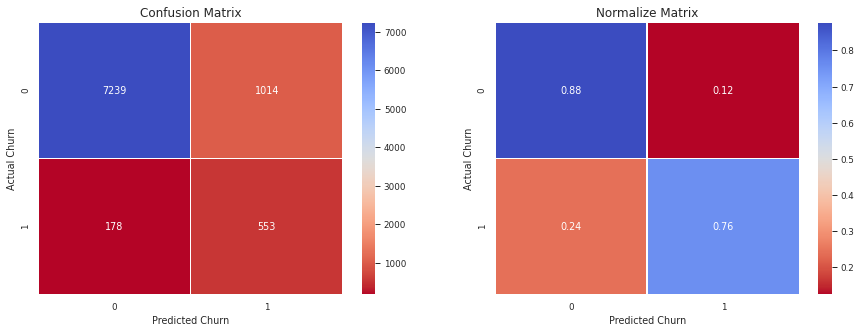

0        1  accuracy  macro avg  weighted avg
precision 0.9760    0.3529   0.8673    0.6645     0.9253       
recall    0.8771    0.7565   0.8673    0.8168     0.8673       
f1-score  0.9239    0.4813   0.8673    0.7026     0.8879       
support   8253.0000 731.0000 0.8673    8984.0000  8984.0000

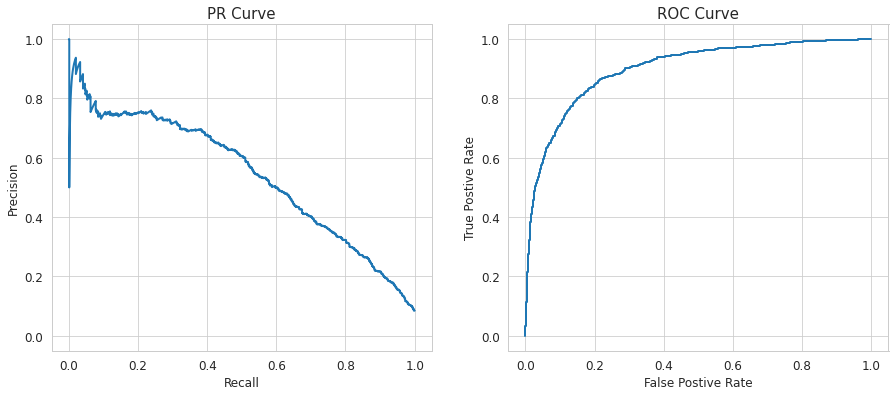

ROC/AUC score is `0.8168`

In [156]:
# confusion matrix
y_test_pred = random_forest_2.predict(reduced_X_test)
plot_confusion_matrix(y_test, y_test_pred)

# roc & pr curve
y_test_prob = random_forest_2.predict_proba(reduced_X_test)[:,1]
plot_curves(y_test, y_test_prob)

Markdown("ROC/AUC score is `{}`".format('%.4f' % roc_auc_score(y_test, y_test_pred)))

#### 2.d Using XGBoost

In [157]:
from xgboost import XGBClassifier

##### Hypertuning

In [158]:
# hyperparameter tuning with XGBoost

default_class_weight = y_train.value_counts()[0]/y_train.value_counts()[1]

param_grid = {
                'colsample_bylevel':[0.1, 0.2, 0.5, 1.0],
                'learning_rate': [0.1, 0.2, 0.5],
                'reg_alpha': [0.5, 0.7, 0.9],
                'n_estimators': [100, 150, 200],
                'scale_pos_weight':[default_class_weight, 13]
             }     
   

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=500)

xgb_2 = XGBClassifier(n_jobs=-1)

xgb_cv_2 = RandomizedSearchCV(  xgb_2,
                        param_grid, 
                        n_iter= 20,
                        scoring= 'f1',
                        cv = stratified_kfold, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True,
                        random_state= 200) 
xgb_cv_2.fit(reduced_X_train, y_train) 

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  9.4min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=500, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_c...
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='deprecated', n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bylevel'

In [159]:
xgb_cv_2.best_params_

{'scale_pos_weight': 11.280023432923258,
 'reg_alpha': 0.7,
 'n_estimators': 200,
 'learning_rate': 0.1,
 'colsample_bylevel': 0.5}

In [160]:
xgb_2 = xgb_cv_2.best_estimator_

##### Model Evaluation

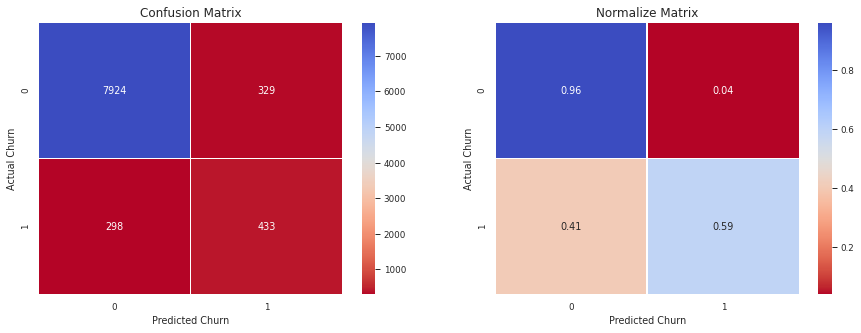

0        1  accuracy  macro avg  weighted avg
precision 0.9638    0.5682   0.9302    0.7660     0.9316       
recall    0.9601    0.5923   0.9302    0.7762     0.9302       
f1-score  0.9619    0.5800   0.9302    0.7710     0.9309       
support   8253.0000 731.0000 0.9302    8984.0000  8984.0000

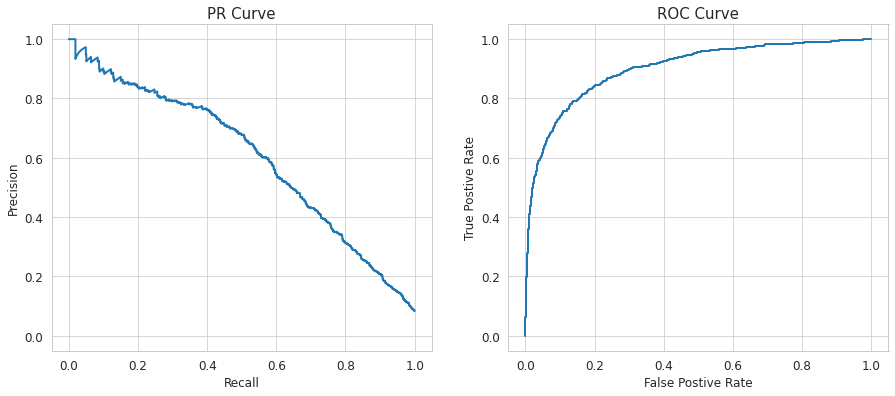

ROC/AUC score is `0.7762`

In [161]:
# confusion matrix
y_test_pred = xgb_2.predict(reduced_X_test)
plot_confusion_matrix(y_test, y_test_pred)

# roc & pr curve
y_test_prob = xgb_2.predict_proba(reduced_X_test)[:,1]
plot_curves(y_test, y_test_prob)

Markdown("ROC/AUC score is `{}`".format('%.4f' % roc_auc_score(y_test, y_test_pred)))

#### 2.d Comparision of Model produced

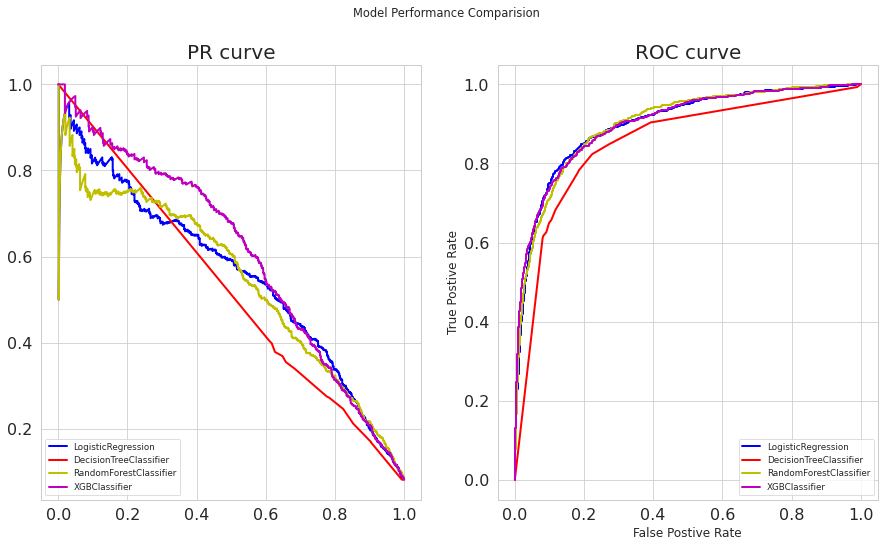

In [162]:
compare_models([logistic_regressor_2, decision_tree_2, random_forest_2, xgb_2], reduced_X_test, y_test)

> Looking at the `ROC Curve` and `recall score` we can say that `Logistic Regression` is performing well for this classification tasks using `PCA` dimensionality reduction.

## Conclusion

Let's have a look at the `top 5` features selected by model (best predictor) produced by `Random Forest Classifier` (Without PCA)

In [147]:
rf_feature_importances[:5]

importance
voice_call_usage_type_8_Active_all 0.0753     
last_day_rch_amt_8                 0.0642     
total_rech_amt_8                   0.0559     
loc_ic_mou_8                       0.0482     
arpu_8                             0.0453

Looking at the important features selected by `Random Forest Classifier` we can say that:
1. `top 5` features are related to the month of `August` i.e. `action phase`
2. Operator can provide discount on call charges to reduce churn rate.
3. Operator can look for the amount of recharge done in the `action phase` and offer discounts to the users with low recharge amount
4. It is okay to offer discounts to the users who are not likely to churn i.e. in the case of `False Positive` but the operator needs to carefully monitor the users who are likely to churn. 